In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.models.agglomerative import CustomAgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# Load data
cosine_umap = np.load("Data\\Processed\\cosine_umap.npy")
euclidean_umap = np.load("Data\\Processed\\euclidean_umap.npy")
subtraction_signals = np.load("Data\\Processed\\subtraction_signals.npy")
freq = np.load("Data\\frequencies.npy")

In [ ]:
norm_signals = subtraction_signals / np.linalg.norm(subtraction_signals, axis=1, keepdims=True)

In [ ]:
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances

In [ ]:
cosine_dist = cosine_distances(subtraction_signals, subtraction_signals)

In [ ]:
euclidean_dist = euclidean_distances(norm_signals, norm_signals)

In [ ]:
euclidean_model = CustomAgglomerativeClustering(k0_neighbors=2, k_neighbors=12, distance_metric="euclidean").fit(euclidean_umap)

Merging clusters:  97%|█████████▋| 275/283 [00:45<00:01,  6.05it/s]


In [ ]:
cosine_model = CustomAgglomerativeClustering(k0_neighbors=2, k_neighbors=12, distance_metric="euclidean").fit(cosine_umap)

Merging clusters:  97%|█████████▋| 295/303 [00:51<00:01,  5.69it/s]


In [ ]:
euclidean_mask = np.array(euclidean_model.labels_) == 8

In [ ]:
cosine_mask = np.array(cosine_model.labels_) == 8

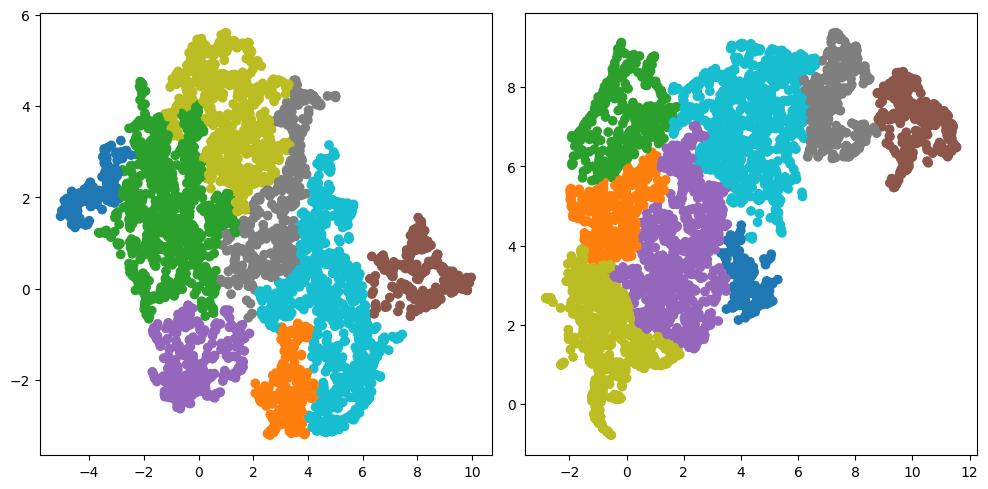

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(euclidean_umap[euclidean_mask][:, 0], euclidean_umap[euclidean_mask][:, 1],
           c=np.array(euclidean_model.label_history[-8])[euclidean_mask], cmap="tab10")
ax[1].scatter(cosine_umap[cosine_mask][:, 0], cosine_umap[cosine_mask][:, 1],
           c=np.array(cosine_model.label_history[-8])[cosine_mask], cmap="tab10")

fig.tight_layout()
plt.show()

In [ ]:
lab0 = np.array(euclidean_model.label_history[-8])
for i, label in enumerate(np.unique(lab0)):
    lab0[lab0 == label] = i

In [ ]:
norm_signals = subtraction_signals / np.linalg.norm(subtraction_signals, axis=1, keepdims=True)

In [ ]:
cosine_dist = cosine_distances(subtraction_signals, subtraction_signals)

In [ ]:
euclidean_dist = euclidean_distances(norm_signals, norm_signals)

In [ ]:
dist = 0.25 * cosine_dist + 0.75 * euclidean_dist

In [ ]:
cosine_umap_dist = dist[cosine_mask][:, cosine_mask]

In [ ]:
euclidean_umap_dist = dist[euclidean_mask][:, euclidean_mask]

In [ ]:
lab1 = np.array(cosine_model.label_history[-8])
for i, label in enumerate(np.unique(lab1)):
    lab1[lab1 == label] = i

In [ ]:
cosine_dist_matrix = np.zeros((8, 8))

In [ ]:
from src.features.evaluation import within_cluster_similarity

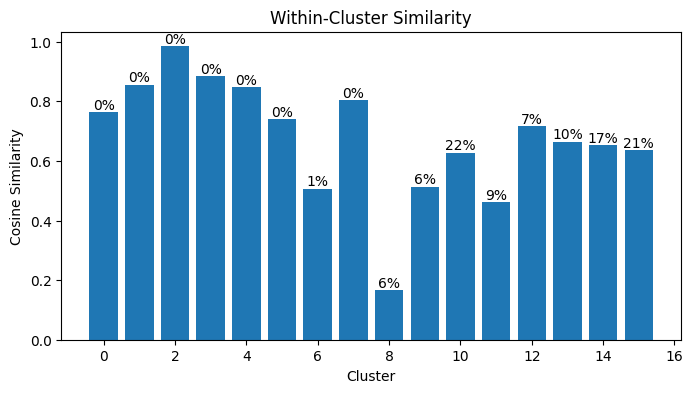

array([0.76310563, 0.85568295, 0.98442429, 0.88371947, 0.84813613,
       0.73947022, 0.50674508, 0.80344906, 0.16568197, 0.51383301,
       0.62798093, 0.46085758, 0.71631921, 0.66477867, 0.6519277 ,
       0.63553753])

In [ ]:
within_cluster_similarity(subtraction_signals, lab0, plot=True)

In [ ]:
within_cluster_similarity(subtraction_signals, lab0[euclidean_mask], plot=True)

ValueError: Data and labels_ must have the same length

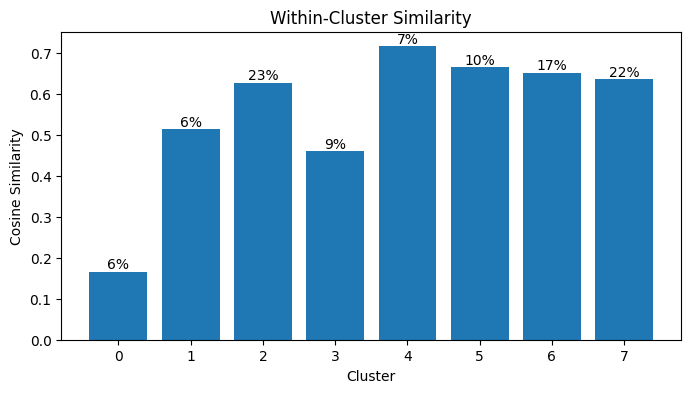

array([0.16568197, 0.51383301, 0.62798093, 0.46085758, 0.71631921,
       0.66477867, 0.6519277 , 0.63553753])

In [ ]:
within_cluster_similarity(subtraction_signals[euclidean_mask], lab0[euclidean_mask], plot=True)

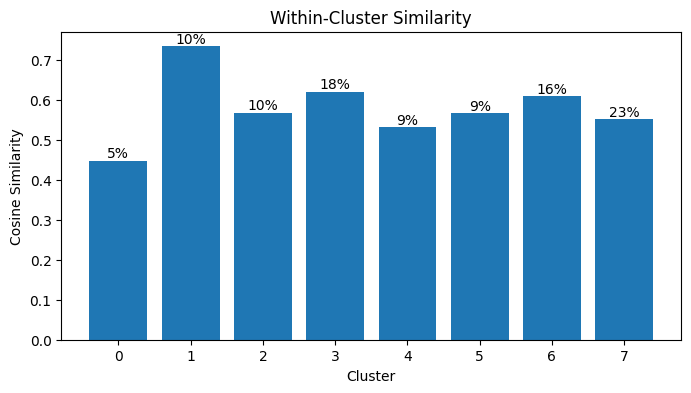

array([0.44755202, 0.73392473, 0.56787536, 0.62086173, 0.53213128,
       0.56605464, 0.60933107, 0.55233554])

In [ ]:
within_cluster_similarity(subtraction_signals[cosine_mask], lab1[cosine_mask], plot=True)

In [ ]:
np.mean(within_cluster_similarity(subtraction_signals[euclidean_mask], lab0[euclidean_mask], plot=False))

np.float64(0.5546145748550699)

In [ ]:
np.mean(within_cluster_similarity(subtraction_signals[cosine_mask], lab1[cosine_mask], plot=False))

np.float64(0.5787582956692938)

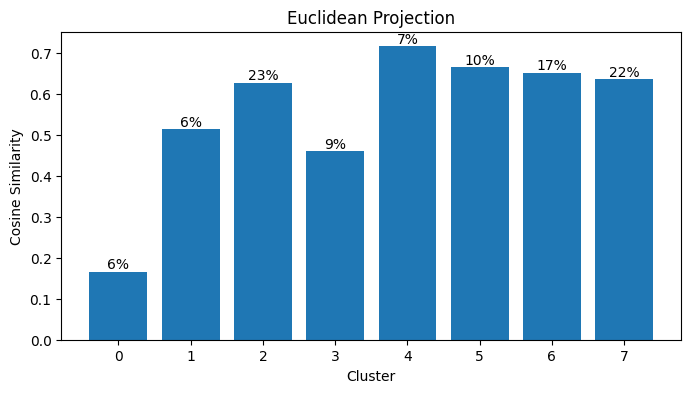

array([0.16568197, 0.51383301, 0.62798093, 0.46085758, 0.71631921,
       0.66477867, 0.6519277 , 0.63553753])

In [ ]:
within_cluster_similarity(subtraction_signals[euclidean_mask], lab0[euclidean_mask], plot=True, title="Euclidean Projection")

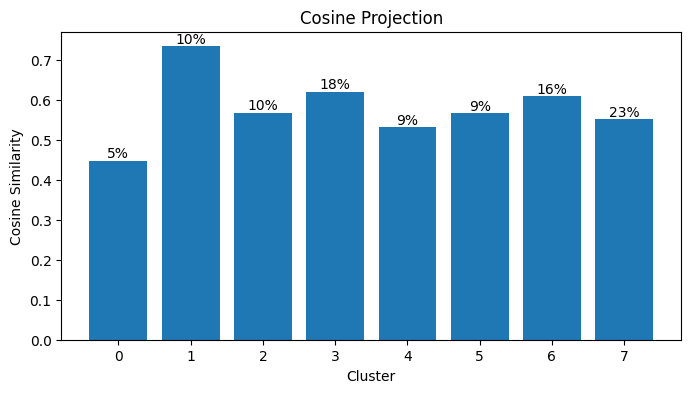

array([0.44755202, 0.73392473, 0.56787536, 0.62086173, 0.53213128,
       0.56605464, 0.60933107, 0.55233554])

In [ ]:
within_cluster_similarity(subtraction_signals[cosine_mask], lab1[cosine_mask], plot=True, title="Cosine Projection")

In [ ]:
_, euclidean_size = np.unique(lab0[euclidean_mask], return_counts=True)

In [ ]:
_, cosine_size = np.unique(lab1[cosine_mask], return_counts=True)

In [ ]:
np.average(within_cluster_similarity(subtraction_signals[euclidean_mask], lab0[euclidean_mask], plot=False), weights=euclidean_size)

np.float64(0.5922800101336484)

In [ ]:
np.average(within_cluster_similarity(subtraction_signals[cosine_mask], lab1[cosine_mask], plot=False), weights=cosine_size)

np.float64(0.5886605433629122)

In [ ]:
np.average(within_cluster_similarity(subtraction_signals[euclidean_mask], lab0[euclidean_mask], plot=False)[1:], weights=euclidean_size[1:])

np.float64(0.6206768536239777)

In [ ]:
def between_cluster_distance(signals, labels, plot=False):
    """

    Args:
        signals (_type_): _description_
        labels (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
    """
    from sklearn.metrics.pairwise import cosine_distances
    unique_labels = np.unique(labels)
    bcs = np.zeros((len(unique_labels), len(unique_labels)))
    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            if i == j:
                continue
            signals_i = signals[labels == label_i]
            signals_j = signals[labels == label_j]
            bcs[i, j] = cosine_distances(signals_i, signals_j)

    if plot:
        plt.matshow(bcs)
        for i in range(len(bcs)):
            for j in range(len(bcs)):
                plt.text(i, j, bcs[i, j], ha="center", va="center", color="white")
        plt.show()
    return bcs

In [ ]:
def between_cluster_similarity(signals, labels, plot=False):
    """

    Args:
        signals (_type_): _description_
        labels (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
    """
    from sklearn.metrics.pairwise import cosine_similarity
    unique_labels = np.unique(labels)
    bcs = np.zeros((len(unique_labels), len(unique_labels)))
    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            if i == j:
                continue
            signals_i = signals[labels == label_i]
            signals_j = signals[labels == label_j]
            bcs[i, j] = cosine_similarity(signals_i, signals_j)

    if plot:
        plt.matshow(bcs)
        for i in range(len(bcs)):
            for j in range(len(bcs)):
                plt.text(i, j, bcs[i, j], ha="center", va="center", color="white")
        plt.show()
    return bcs

In [ ]:
bcs_euclidean = between_cluster_similarity(subtraction_signals[euclidean_mask], lab0[euclidean_mask], plot=True)

ValueError: setting an array element with a sequence.

In [ ]:
def between_cluster_similarity(signals, labels, plot=False):
    """

    Args:
        signals (_type_): _description_
        labels (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
    """
    from sklearn.metrics.pairwise import cosine_similarity
    unique_labels = np.unique(labels)
    bcs = np.zeros((len(unique_labels), len(unique_labels)))
    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            if i == j:
                continue
            signals_i = signals[labels == label_i]
            signals_j = signals[labels == label_j]
            bcs[i, j] = np.mean(cosine_similarity(signals_i, )signals_j)

    if plot:
        plt.matshow(bcs)
        for i in range(len(bcs)):
            for j in range(len(bcs)):
                plt.text(i, j, bcs[i, j], ha="center", va="center", color="white")
        plt.show()
    return bcs

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-77-56bff83715f2>, line 18)

In [ ]:
def between_cluster_similarity(signals, labels, plot=False):
    """

    Args:
        signals (_type_): _description_
        labels (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
    """
    from sklearn.metrics.pairwise import cosine_similarity
    unique_labels = np.unique(labels)
    bcs = np.zeros((len(unique_labels), len(unique_labels)))
    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            if i == j:
                continue
            signals_i = signals[labels == label_i]
            signals_j = signals[labels == label_j]
            bcs[i, j] = np.mean(cosine_similarity(signals_i, signals_j))

    if plot:
        plt.matshow(bcs)
        for i in range(len(bcs)):
            for j in range(len(bcs)):
                plt.text(i, j, bcs[i, j], ha="center", va="center", color="white")
        plt.show()
    return bcs

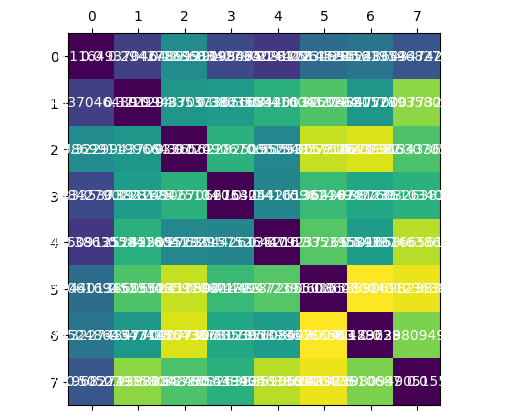

In [ ]:
bcs_euclidean = between_cluster_similarity(subtraction_signals[euclidean_mask], lab0[euclidean_mask], plot=True)

In [ ]:
def between_cluster_similarity(signals, labels, plot=False):
    """

    Args:
        signals (_type_): _description_
        labels (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
    """
    from sklearn.metrics.pairwise import cosine_similarity
    unique_labels = np.unique(labels)
    bcs = np.zeros((len(unique_labels), len(unique_labels)))
    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            if i == j:
                continue
            signals_i = signals[labels == label_i]
            signals_j = signals[labels == label_j]
            bcs[i, j] = np.mean(cosine_similarity(signals_i, signals_j))

    if plot:
        plt.matshow(bcs)
        for i in range(len(bcs)):
            for j in range(len(bcs)):
                plt.text(i, j, np.round(bcs[i, j], 2), ha="center", va="center", color="white")
        plt.show()
    return bcs

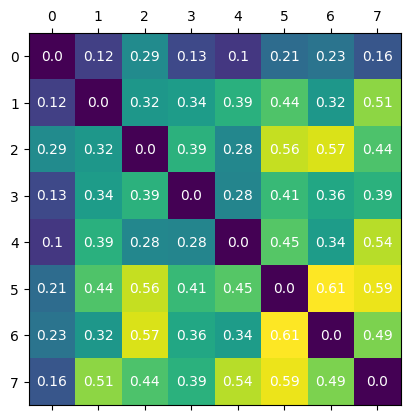

In [ ]:
bcs_euclidean = between_cluster_similarity(subtraction_signals[euclidean_mask], lab0[euclidean_mask], plot=True)

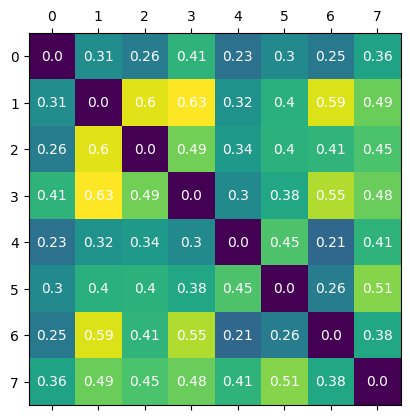

In [ ]:
bcs_cosine = between_cluster_similarity(subtraction_signals[cosine_mask], lab1[cosine_mask], plot=True)

In [ ]:
cosine_wcs = within_cluster_similarity(subtraction_signals[cosine_mask], lab1[cosine_mask], plot=False)

In [ ]:
euclidean_wcs = within_cluster_similarity(subtraction_signals[euclidean_mask], lab0[euclidean_mask], plot=False)

In [ ]:
stacked_euclidean_wcs = wcs * np.ones((8, 1))

NameError: name 'wcs' is not defined

In [ ]:
stacked_euclidean_wcs = euclidean_wcs * np.ones((8, 1))

In [ ]:
stacked_cosine_wcs = cosine_wcs * np.ones((8, 1))

In [ ]:
euclidean_merge = (bcs_euclidean > stacked_euclidean_wcs) * (bcs_euclidean > stacked_euclidean_wcs.T)

In [ ]:
sum(euclidean)

NameError: name 'euclidean' is not defined

In [ ]:
sum(euclidean_merge)

array([0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
euclidean_merge

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

In [ ]:
cosine_merge = (bcs_cosine > stacked_cosine_wcs) * (bcs_cosine > stacked_cosine_wcs.T)

In [ ]:
cosine_merge

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

In [ ]:
len(cosine)

NameError: name 'cosine' is not defined

In [ ]:
len(cosine_merge)

8

In [ ]:
np.unique(lab0)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
np.unique(lab1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

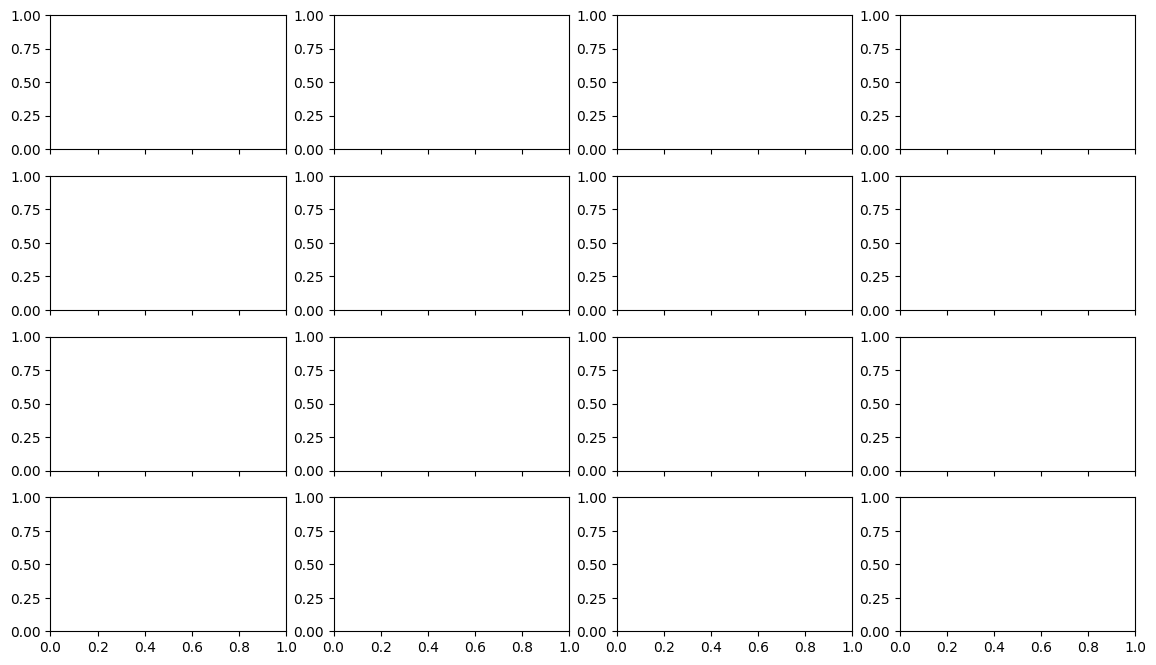

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(14, 8))
axes = ax.flatten()
colors = plt.get_cmap("tab20").colors
for i in range(16):
    ax[i].plot(freq, subtraction_signal[lab0==i].mean(axis=0), color=colors[i], label=f'{sum(lab0 == i)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_neighbourhood_clusters.pdf')
plt.show()

NameError: name 'subtraction_signal' is not defined

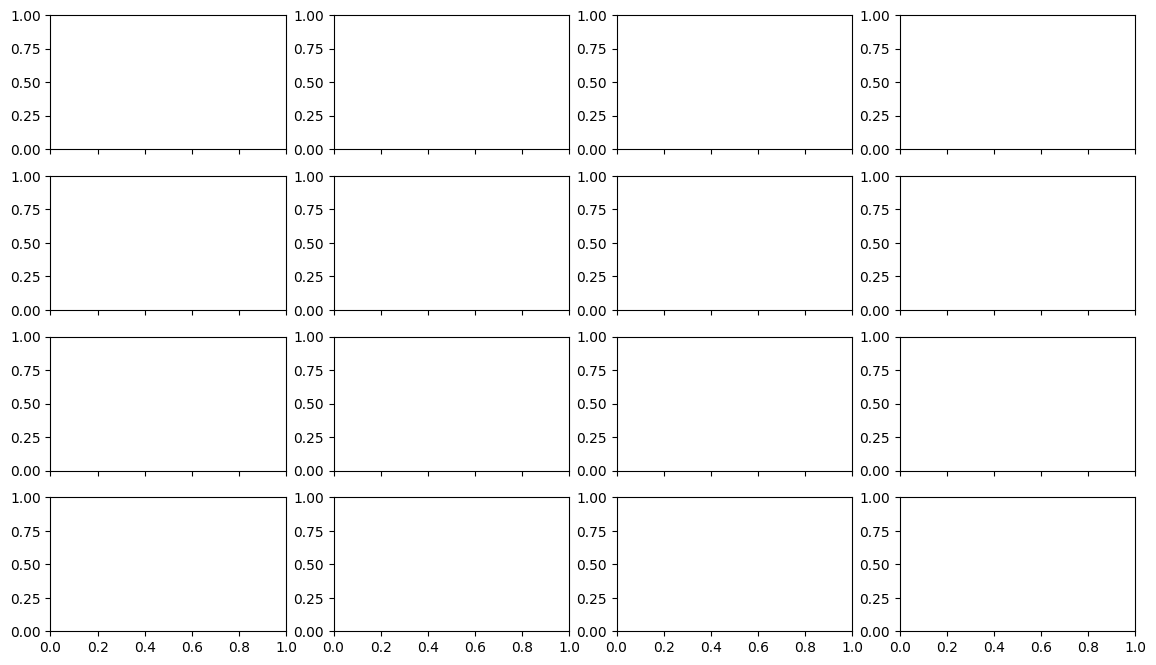

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(14, 8))
axes = ax.flatten()
colors = plt.get_cmap("tab20").colors
for i in range(16):
    axes[i].plot(freq, subtraction_signal[lab0==i].mean(axis=0), color=colors[i], label=f'{sum(lab0 == i)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_neighbourhood_clusters.pdf')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'legend'

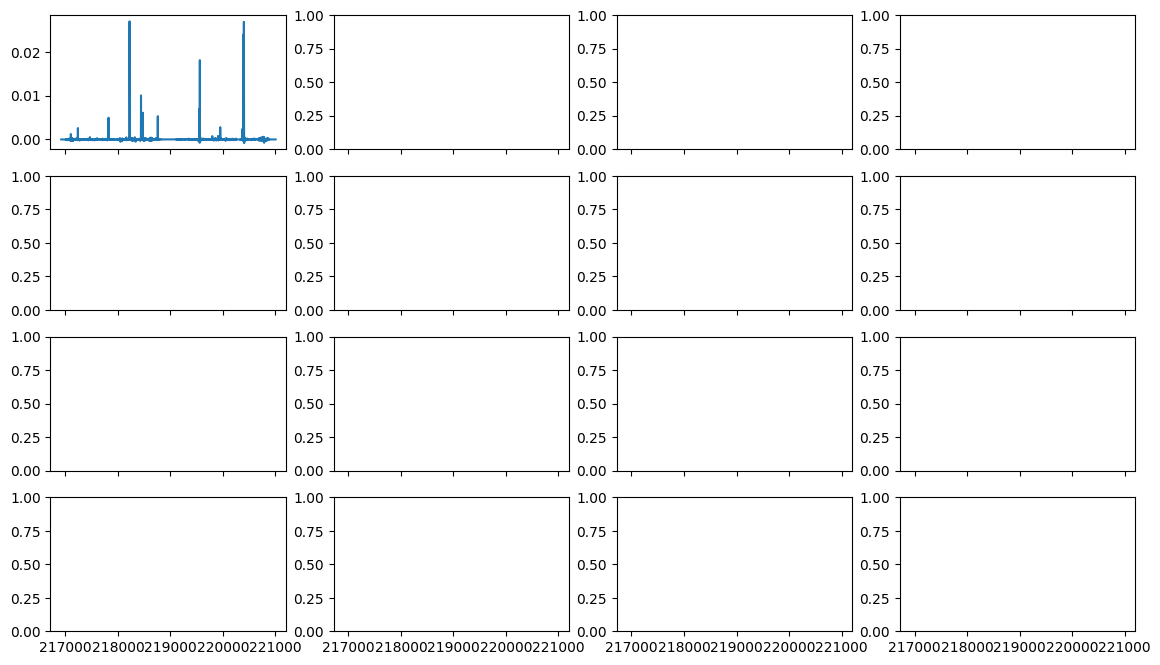

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(14, 8))
axes = ax.flatten()
colors = plt.get_cmap("tab20").colors
for i in range(16):
    axes[i].plot(freq, subtraction_signals[lab0==i].mean(axis=0), color=colors[i], label=f'{sum(lab0 == i)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_neighbourhood_clusters.pdf')
plt.show()

In [ ]:
np.all(np.max(subtraction_signals, axis=1) == 1)

np.False_

In [ ]:
subtraction_signals /= np.max(subtraction_signals, axis=1, keepdims=True)

In [ ]:
np.all(np.max(subtraction_signals, axis=1) == 1)

np.True_

AttributeError: 'numpy.ndarray' object has no attribute 'legend'

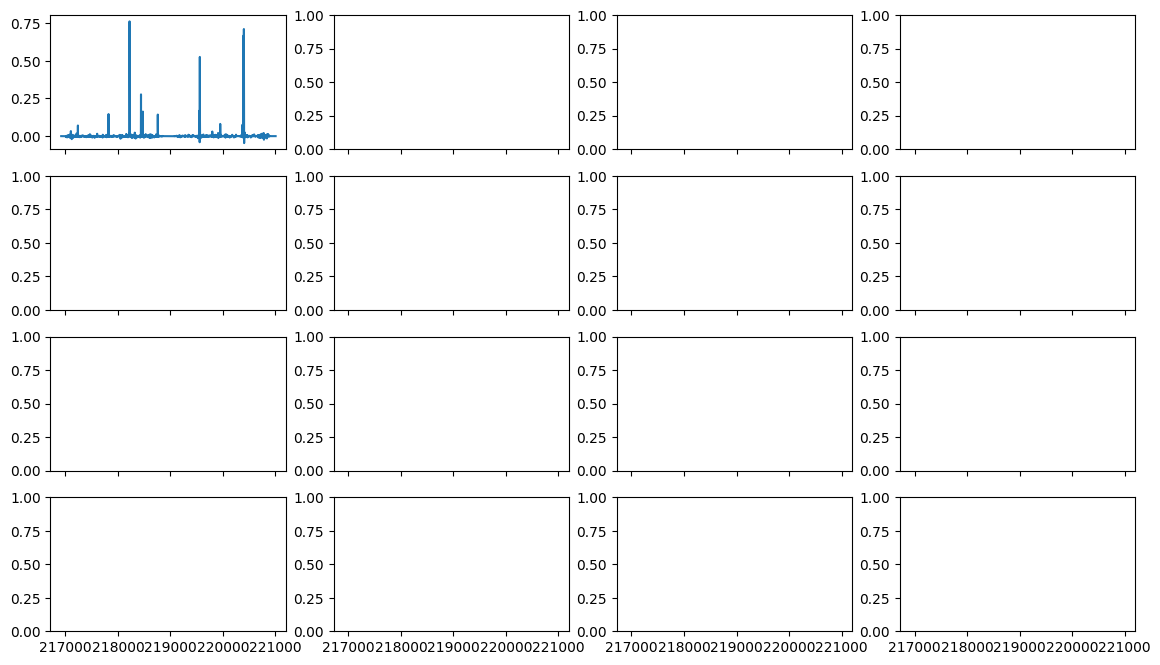

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(14, 8))
axes = ax.flatten()
colors = plt.get_cmap("tab20").colors
for i in range(16):
    axes[i].plot(freq, subtraction_signals[lab0==i].mean(axis=0), color=colors[i], label=f'{sum(lab0 == i)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_neighbourhood_clusters.pdf')
plt.show()

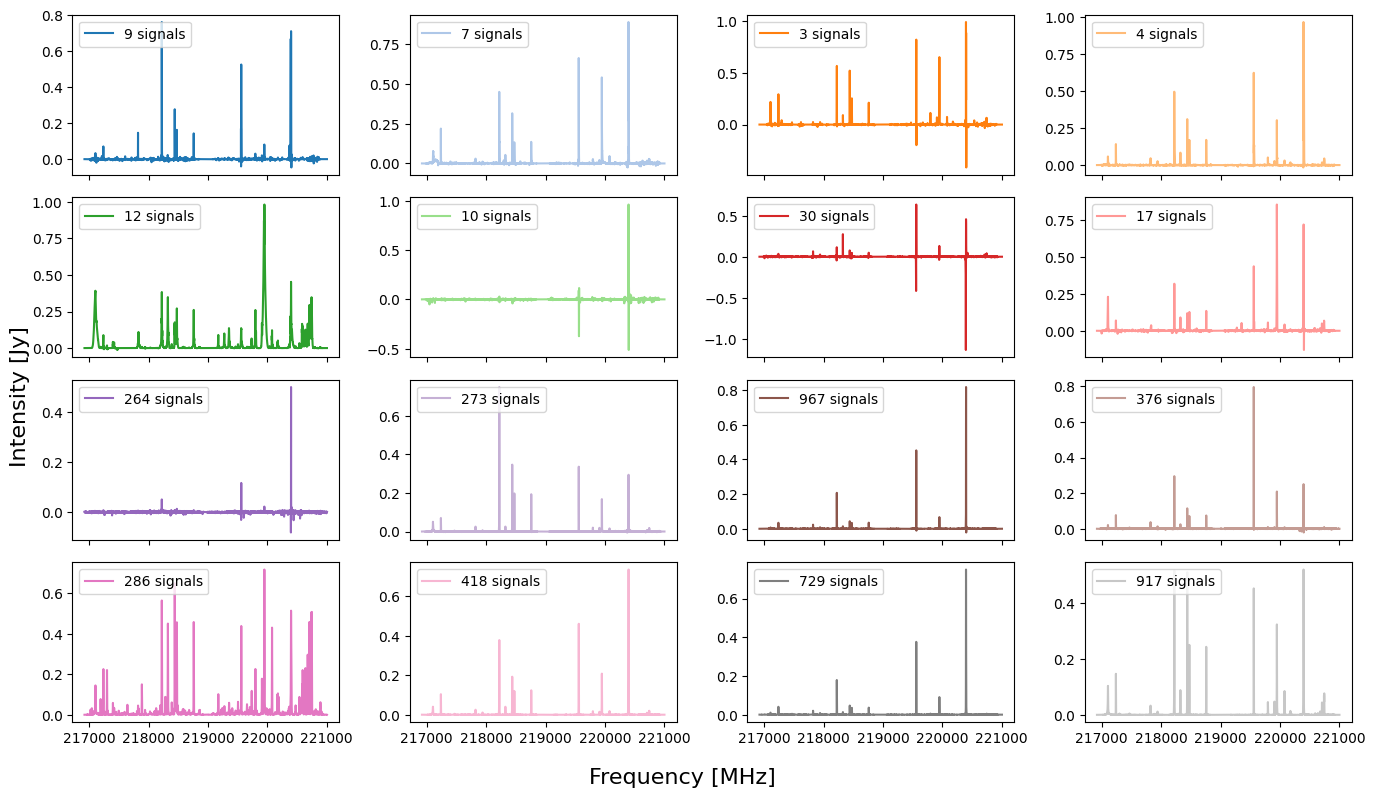

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(14, 8))
axes = ax.flatten()
colors = plt.get_cmap("tab20").colors
for i in range(16):
    axes[i].plot(freq, subtraction_signals[lab0==i].mean(axis=0), color=colors[i], label=f'{sum(lab0 == i)} signals')
    axes[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_neighbourhood_clusters.pdf')
plt.show()

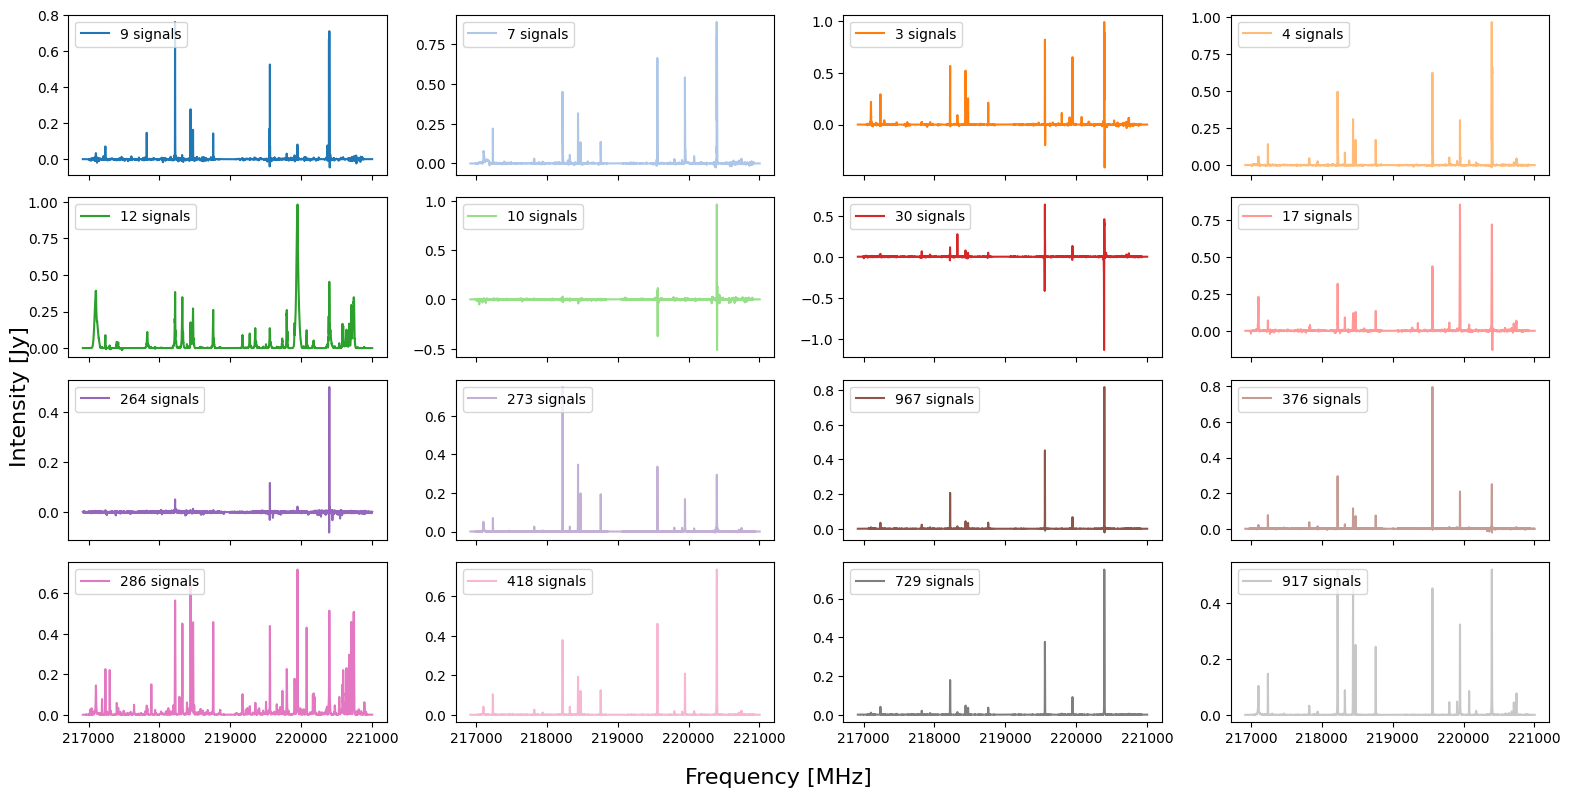

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(16, 8))
axes = ax.flatten()
colors = plt.get_cmap("tab20").colors
for i in range(16):
    axes[i].plot(freq, subtraction_signals[lab0==i].mean(axis=0), color=colors[i], label=f'{sum(lab0 == i)} signals')
    axes[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_neighbourhood_clusters.pdf')
plt.show()

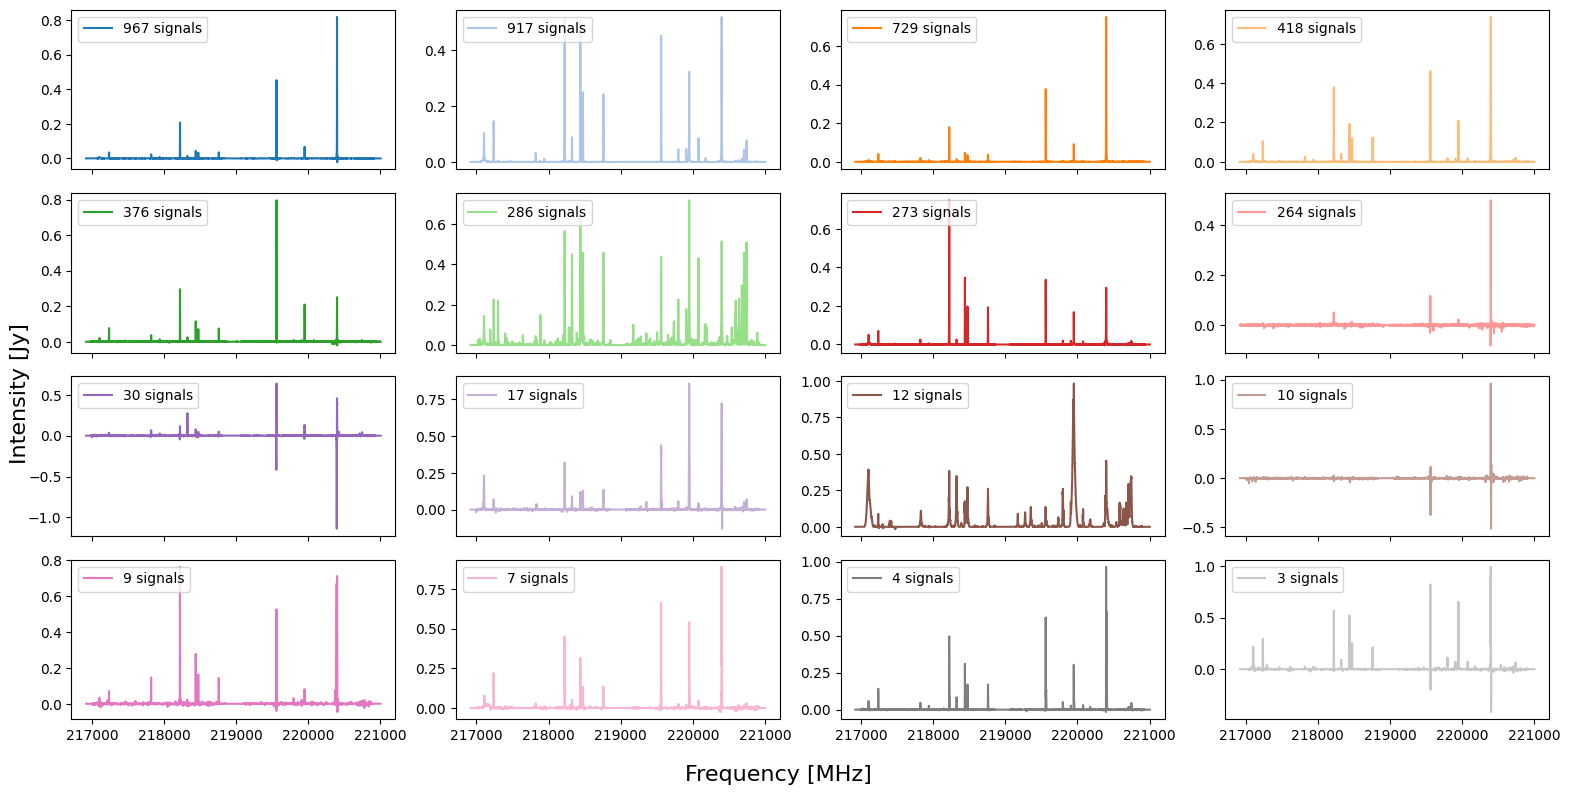

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(16, 8))
axes = ax.flatten()
colors = plt.get_cmap("tab20").colors
unique_labels, sizes = np.unique(lab0, return_counts=True)
unique_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(unique_labels):
    axes[i].plot(freq, subtraction_signals[lab0==label].mean(axis=0), color=colors[i], label=f'{sum(lab0 == label)} signals')
    axes[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_neighbourhood_clusters.pdf')
plt.show()

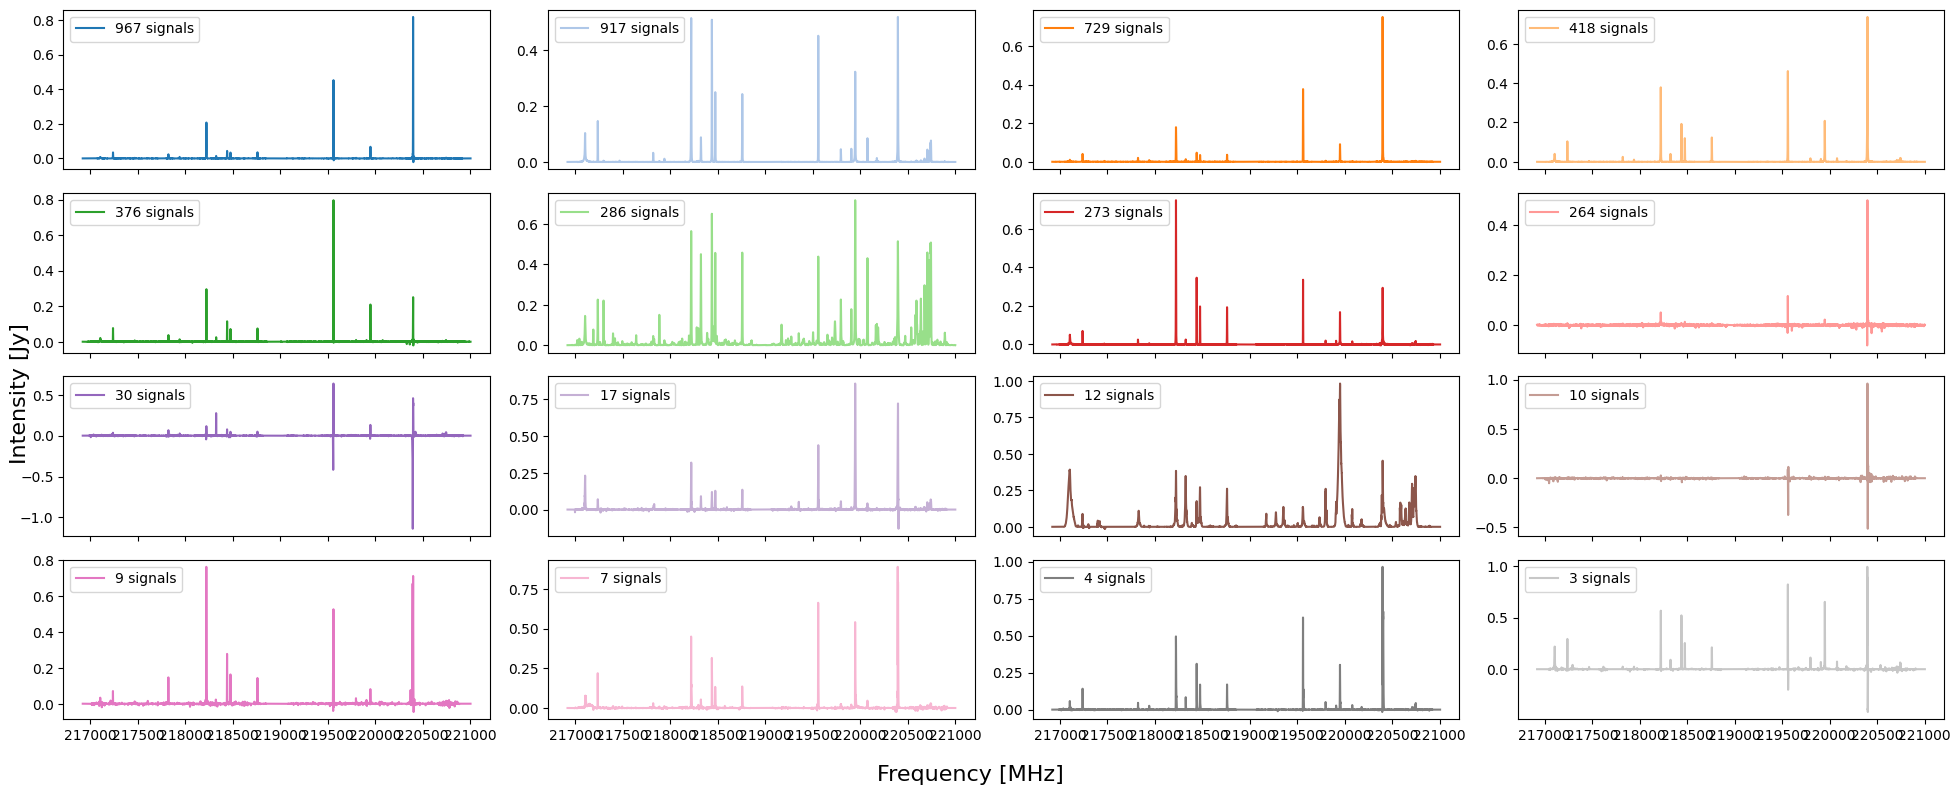

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(20, 8))
axes = ax.flatten()
colors = plt.get_cmap("tab20").colors
unique_labels, sizes = np.unique(lab0, return_counts=True)
unique_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(unique_labels):
    axes[i].plot(freq, subtraction_signals[lab0==label].mean(axis=0), color=colors[i], label=f'{sum(lab0 == label)} signals')
    axes[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_neighbourhood_clusters.pdf')
plt.show()

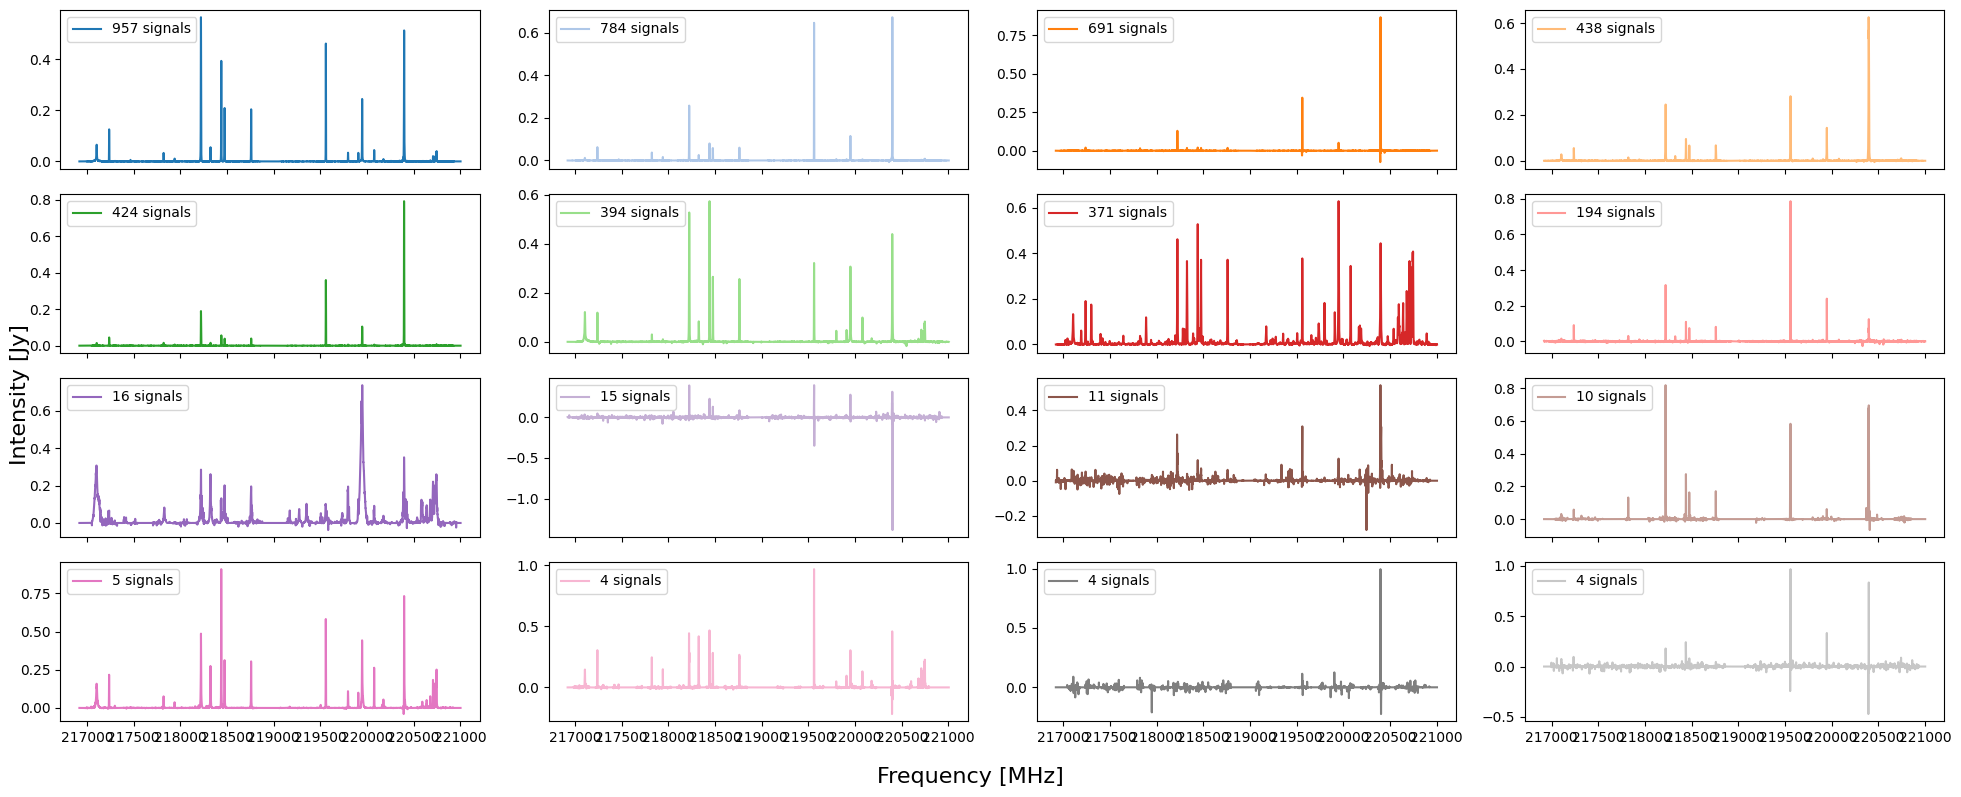

In [ ]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(20, 8))
axes = ax.flatten()
colors = plt.get_cmap("tab20").colors
unique_labels, sizes = np.unique(lab1, return_counts=True)
unique_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(unique_labels):
    axes[i].plot(freq, subtraction_signals[lab1==label].mean(axis=0), color=colors[i], label=f'{sum(lab1 == label)} signals')
    axes[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/cosine_neighbourhood_clusters.pdf')
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=None, metric="cosine", distance_threshold=0.3).fit(subtraction_signals)

ValueError: cosine was provided as metric. Ward can only work with euclidean distances.

In [ ]:
complete_model = AgglomerativeClustering(n_clusters=None, metric="cosine", distance_threshold=0.3, linkage="complete").fit(subtraction_signals)

In [ ]:
labels, sizes = np.unique(complete_model.labels_)

ValueError: too many values to unpack (expected 2)

In [ ]:
labels, sizes = np.unique(complete_model.labels_, return_counts=True)

In [ ]:
sizes

array([20,  8,  5, ...,  1,  9,  1], shape=(1076,))

In [ ]:
sum(sizes > 10)

np.int64(97)

In [ ]:
sum(sizes > 20)

np.int64(37)

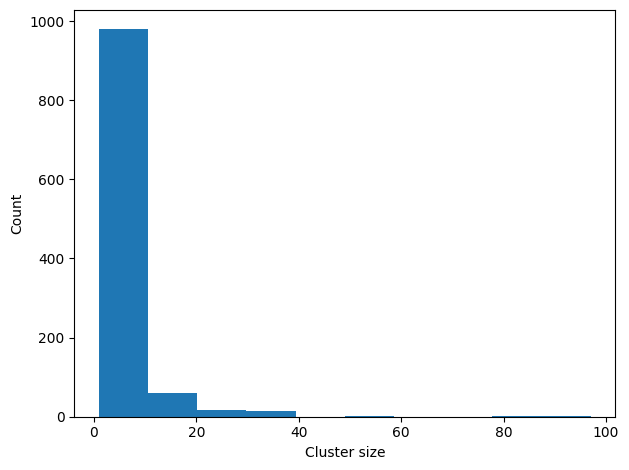

In [ ]:
plt.hist(sizes); plt.xlabel("Cluster size"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

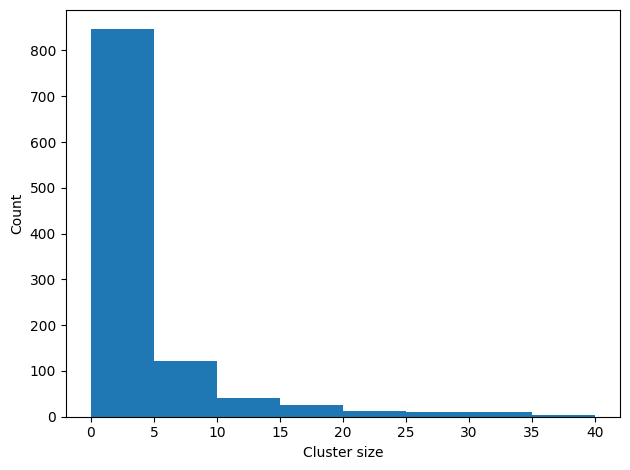

In [ ]:
plt.hist(sizes, bins=range(0, 45, 5)); plt.xlabel("Cluster size"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

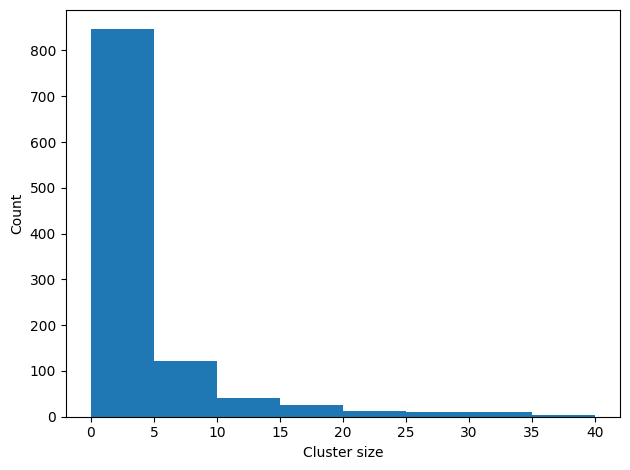

In [ ]:
plt.hist(sizes, bins=range(0, 45, 5)); plt.xlabel("Cluster size"); plt.ylabel("Count"); plt.tight_layout(); plt.savefig("results/agglomerative/complete_size_distribution.pdf"); plt.show()

In [ ]:
len(sizes)

1076

In [ ]:
sum(sizes > 10)

np.int64(97)

In [ ]:
sum(sizes > 20)

np.int64(37)

In [ ]:
silhouette_score(subtraction_signals, complete_model.labels_, metric="euclidean")

NameError: name 'silhouette_score' is not defined

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(subtraction_signals, complete_model.labels_, metric="euclidean")

0.015588635326219409

In [ ]:
silhouette_score(subtraction_signals, complete_model.labels_, metric="cosine")

0.07742795072055035

In [ ]:
average_model = AgglomerativeClustering(n_clusters=None, metric="cosine", linkage="average", distance_threshold=0.3).fit(subtraction_signals)

In [ ]:
labels, sizes = np.unique(average_model.labels_)

ValueError: too many values to unpack (expected 2)

In [ ]:
labels, sizes = np.unique(average_model.labels_, return_counts=True)

In [ ]:
len(sizes)

819

In [ ]:
sum(sizes > 10)

np.int64(34)

In [ ]:
sum(sizes > 20)

np.int64(23)

In [ ]:
large_labels = [labels[i] for i in range(len(labels)) if sizes[i] > 10]

In [ ]:
within_cluster_similarity(subtraction_signals[labels in large_labels], labels[labels in large_labels], plot=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
labels in large_labels

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
label_mask = [True for i in range(len(average_model.labels_)) if average_model.labels_[i] in large_labels else False]



SyntaxError: invalid syntax (<ipython-input-140-1dd91271da5c>, line 1)

In [ ]:
label_mask = [True if average_model.labels_[i] in large_labels else False for i in range(len(average_model.labels_))]



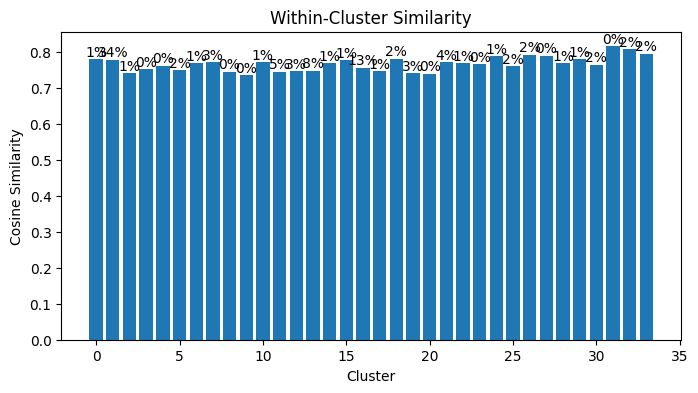

array([0.7809384 , 0.77920344, 0.74090057, 0.75184606, 0.76278489,
       0.74934813, 0.76850388, 0.77263734, 0.74574958, 0.735686  ,
       0.77247882, 0.74596166, 0.74781771, 0.74860805, 0.7690016 ,
       0.77680272, 0.75719033, 0.74734213, 0.78143413, 0.74164839,
       0.74056573, 0.77192411, 0.76857416, 0.76702732, 0.78946527,
       0.76014176, 0.79337054, 0.78964567, 0.76899565, 0.77983783,
       0.7645673 , 0.81598743, 0.80806251, 0.79520859])

In [ ]:
within_cluster_similarity(subtraction_signals[label_mask], average_model.labels_[label_mask], plot=True)

In [ ]:
wcs = within_cluster_similarity(subtraction_signals[label_mask], average_model.labels_[label_mask], plot=False)

In [ ]:
sum(sizes[sizes > 10]) / sum(sizes)

np.float64(0.7195742711707542)

In [ ]:
silhouette_score(subtraction_signals[label_mask], average_model.labels_[label_mask], metric="cosine")

0.06807824088591524

In [ ]:
silhouette_score(subtraction_signals[label_mask], average_model.labels_[label_mask], metric="euclidean")

-0.017762047200345576

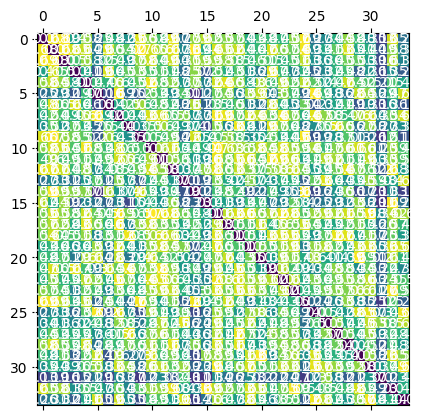

In [ ]:
bcs = between_cluster_similarity(subtraction_signals[label_mask], average_model.labels_[label_mask], plot=True)

In [ ]:
def between_cluster_similarity(signals, labels, plot=False):
    """

    Args:
        signals (_type_): _description_
        labels (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
    """
    from sklearn.metrics.pairwise import cosine_similarity
    unique_labels = np.unique(labels)
    bcs = np.zeros((len(unique_labels), len(unique_labels)))
    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            if i == j:
                continue
            signals_i = signals[labels == label_i]
            signals_j = signals[labels == label_j]
            bcs[i, j] = np.mean(cosine_similarity(signals_i, signals_j))

    if plot:
        plt.figure(figsize=(len(bcs), len(bcs)))
        plt.matshow(bcs)
        for i in range(len(bcs)):
            for j in range(len(bcs)):
                plt.text(i, j, np.round(bcs[i, j], 2), ha="center", va="center", color="white")
        plt.show()
    return bcs

<Figure size 3400x3400 with 0 Axes>

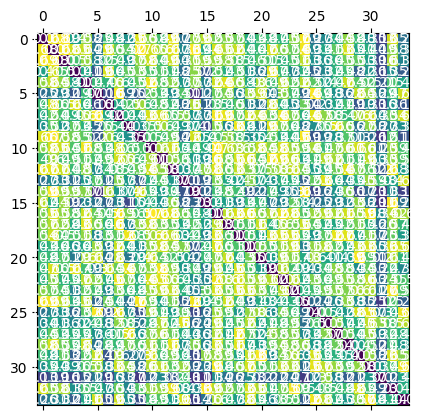

In [ ]:
bcs = between_cluster_similarity(subtraction_signals[label_mask], average_model.labels_[label_mask], plot=True)

In [ ]:
def between_cluster_similarity(signals, labels, plot=False):
    """

    Args:
        signals (_type_): _description_
        labels (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
    """
    from sklearn.metrics.pairwise import cosine_similarity
    unique_labels = np.unique(labels)
    bcs = np.zeros((len(unique_labels), len(unique_labels)))
    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            if i == j:
                continue
            signals_i = signals[labels == label_i]
            signals_j = signals[labels == label_j]
            bcs[i, j] = np.mean(cosine_similarity(signals_i, signals_j))

    if plot:
        plt.figure(figsize=(3*len(bcs), 3*len(bcs)))
        plt.matshow(bcs)
        for i in range(len(bcs)):
            for j in range(len(bcs)):
                plt.text(i, j, np.round(bcs[i, j], 2), ha="center", va="center", color="white")
        plt.show()
    return bcs

<Figure size 10200x10200 with 0 Axes>

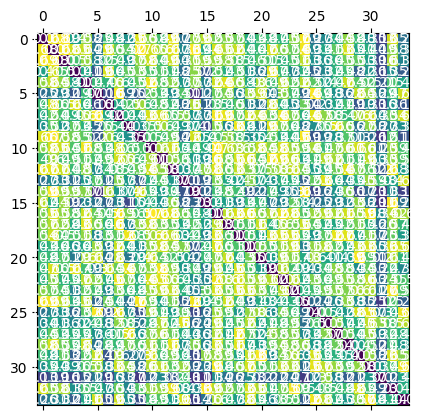

In [ ]:
bcs = between_cluster_similarity(subtraction_signals[label_mask], average_model.labels_[label_mask], plot=True)

In [ ]:
def between_cluster_similarity(signals, labels, plot=False, text=False):
    """

    Args:
        signals (_type_): _description_
        labels (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
    """
    from sklearn.metrics.pairwise import cosine_similarity
    unique_labels = np.unique(labels)
    bcs = np.zeros((len(unique_labels), len(unique_labels)))
    for i, label_i in enumerate(unique_labels):
        for j, label_j in enumerate(unique_labels):
            if i == j:
                continue
            signals_i = signals[labels == label_i]
            signals_j = signals[labels == label_j]
            bcs[i, j] = np.mean(cosine_similarity(signals_i, signals_j))

    if plot:
        plt.figure(figsize=(3*len(bcs), 3*len(bcs)))
        plt.matshow(bcs)
        if text:
            for i in range(len(bcs)):
                for j in range(len(bcs)):
                    plt.text(i, j, np.round(bcs[i, j], 2), ha="center", va="center", color="white")
        else:
            plt.colorbar()
        plt.show()
    return bcs

<Figure size 10200x10200 with 0 Axes>

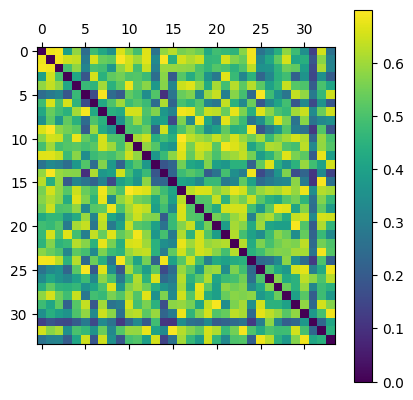

In [ ]:
bcs = between_cluster_similarity(subtraction_signals[label_mask], average_model.labels_[label_mask], plot=True)

In [ ]:
wcs_array = wcs * np.ones((len(wcs), 1))

In [ ]:
wcs_array.shape()

TypeError: 'tuple' object is not callable

In [ ]:
wcs_array.shape

(34, 34)

In [ ]:
merge_mask = (bcs > wcs_array) * (bcs > wcs_array.T)

In [ ]:
sum(merge_mask)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
merge_mask.shape

(34, 34)

In [ ]:
merge_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(34, 34))

In [ ]:
np.all(merge_mask == False)

np.True_

In [ ]:
from src.features.evaluation import score

ImportError: cannot import name 'score' from 'src.features.evaluation' (c:\Users\javia\OneDrive\Desktop\Programing\MSc-Thesis\src\features\evaluation.py)

In [ ]:
from src.features.evaluation import clustering_overlap_score

In [ ]:
clustering_overlap_score(complete_model.labels_, average_model.labels_)

np.float64(0.35377140212864416)

In [ ]:
clustering_overlap_score(complete_model.labels_[label_mask], average_model.labels_[label_mask])

np.float64(0.15466237942122185)

In [ ]:
n_clusters = []
n_large_clusters = []
for threshold in tqdm([0.1, 0.2, 0.3, 0.4, 0.5]):
    model = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold, metric="cosine", linkage="average").fit(subtraction_signals)
    labels, sizes = np.unique(model.labels_, return_counts=True)
    n_clusters.append(len(labels))
    n_large_clusters.append(sum(sizes > 10))


100%|██████████| 5/5 [08:21<00:00, 100.25s/it]


Text(0, 0.5, 'Number of clusters')

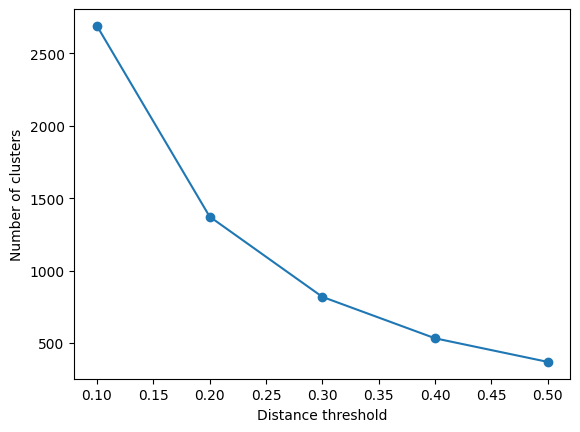

In [ ]:
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], n_clusters, marker="o"); plt.xlabel("Distance threshold"); plt.ylabel("Number of clusters")

([<matplotlib.axis.XTick at 0x20a1cfb1eb0>,
 [Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5')])

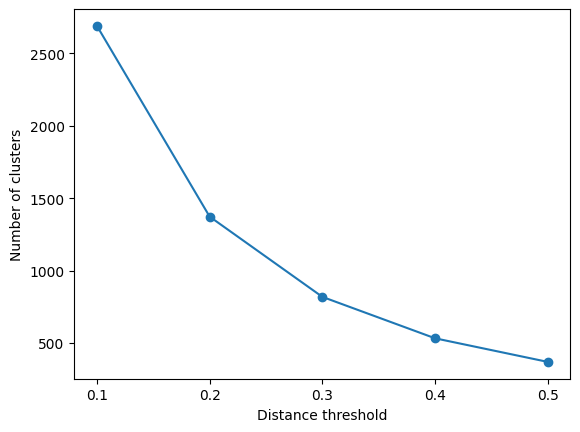

In [ ]:
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], n_clusters, marker="o"); plt.xlabel("Distance threshold"); plt.ylabel("Number of clusters"); plt.xticks(ticks=[0.1, 0.2, 0.3, 0.4, 0.5])

([<matplotlib.axis.XTick at 0x20a1d1d5490>,
 [Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5')])

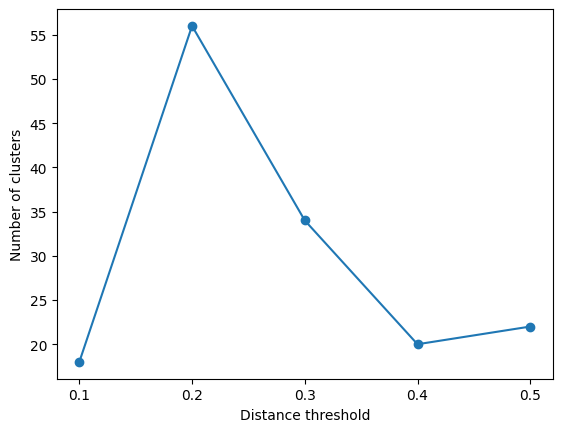

In [ ]:
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], n_large_clusters, marker="o"); plt.xlabel("Distance threshold"); plt.ylabel("Number of clusters"); plt.xticks(ticks=[0.1, 0.2, 0.3, 0.4, 0.5])

([<matplotlib.axis.XTick at 0x20a1d31a720>,
 [Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5')])

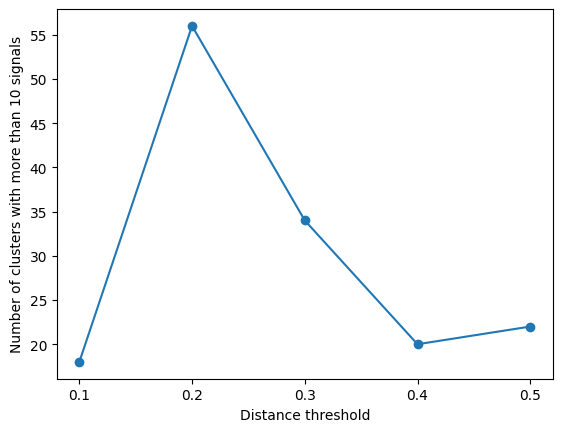

In [ ]:
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], n_large_clusters, marker="o"); plt.xlabel("Distance threshold"); plt.ylabel("Number of clusters with more than 10 signals"); plt.xticks(ticks=[0.1, 0.2, 0.3, 0.4, 0.5])

([<matplotlib.axis.XTick at 0x20a1e7f6210>,
 [Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5')])

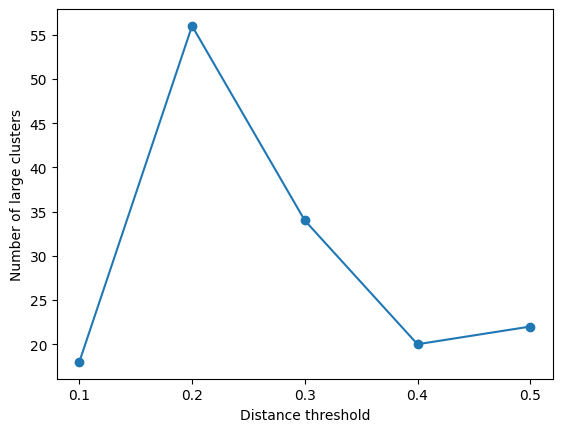

In [ ]:
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], n_large_clusters, marker="o"); plt.xlabel("Distance threshold"); plt.ylabel("Number of large clusters"); plt.xticks(ticks=[0.1, 0.2, 0.3, 0.4, 0.5])

In [ ]:
model = AgglomerativeClustering(n_clusters=False, distance_threshold=0.4, metric="cosine", linkage="average").fit(subtraction_signals)

InvalidParameterError: The 'n_clusters' parameter of AgglomerativeClustering must be an int in the range [1, inf) or None. Got False instead.

In [ ]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0.4, metric="cosine", linkage="average").fit(subtraction_signals)

In [ ]:
labels, sizes = np.unique(model.labels_, return_counts=True)

In [ ]:
sum(sizes[sizes > 10]) / sum(sizes)

np.float64(0.8123553910226747)

In [ ]:
len(sizes[sizes > 10])

20

In [ ]:
large_labels = [labels[i] for i in range(len(labels)) if sizes[i] > 10]

In [ ]:
label_mask = [True if model.labels_[i] in large_labels else False for i in range(len(model.labels_))]

In [ ]:
signals = subtraction_signals[label_mask]

In [ ]:
labels = labels[label_mask]

IndexError: boolean index did not match indexed array along axis 0; size of axis is 533 but size of corresponding boolean axis is 4322

In [ ]:
labels = model.labels_[label_mask]

TypeError: cannot unpack non-iterable numpy.int64 object

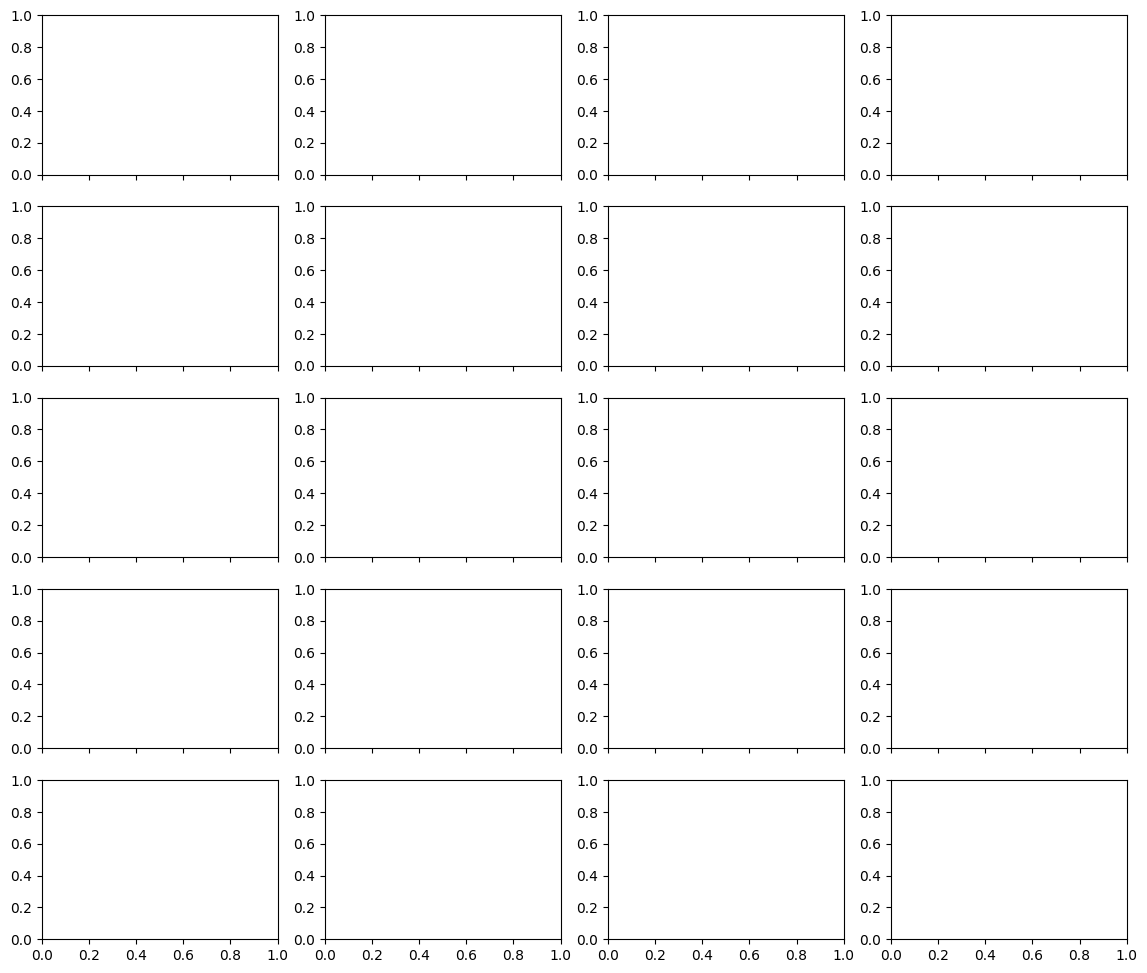

In [ ]:
fig, ax = plt.subplots(5, 4, sharex=True, figsize=(14, 12))
axes = ax.flatten()
for i, label in np.unique(labels):
    ax[i].plot(freq, signals[labels==label].mean(axis=0), color=colors[i], label=f'{sum(labels == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/cosine_centroids_04threshold.pdf')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

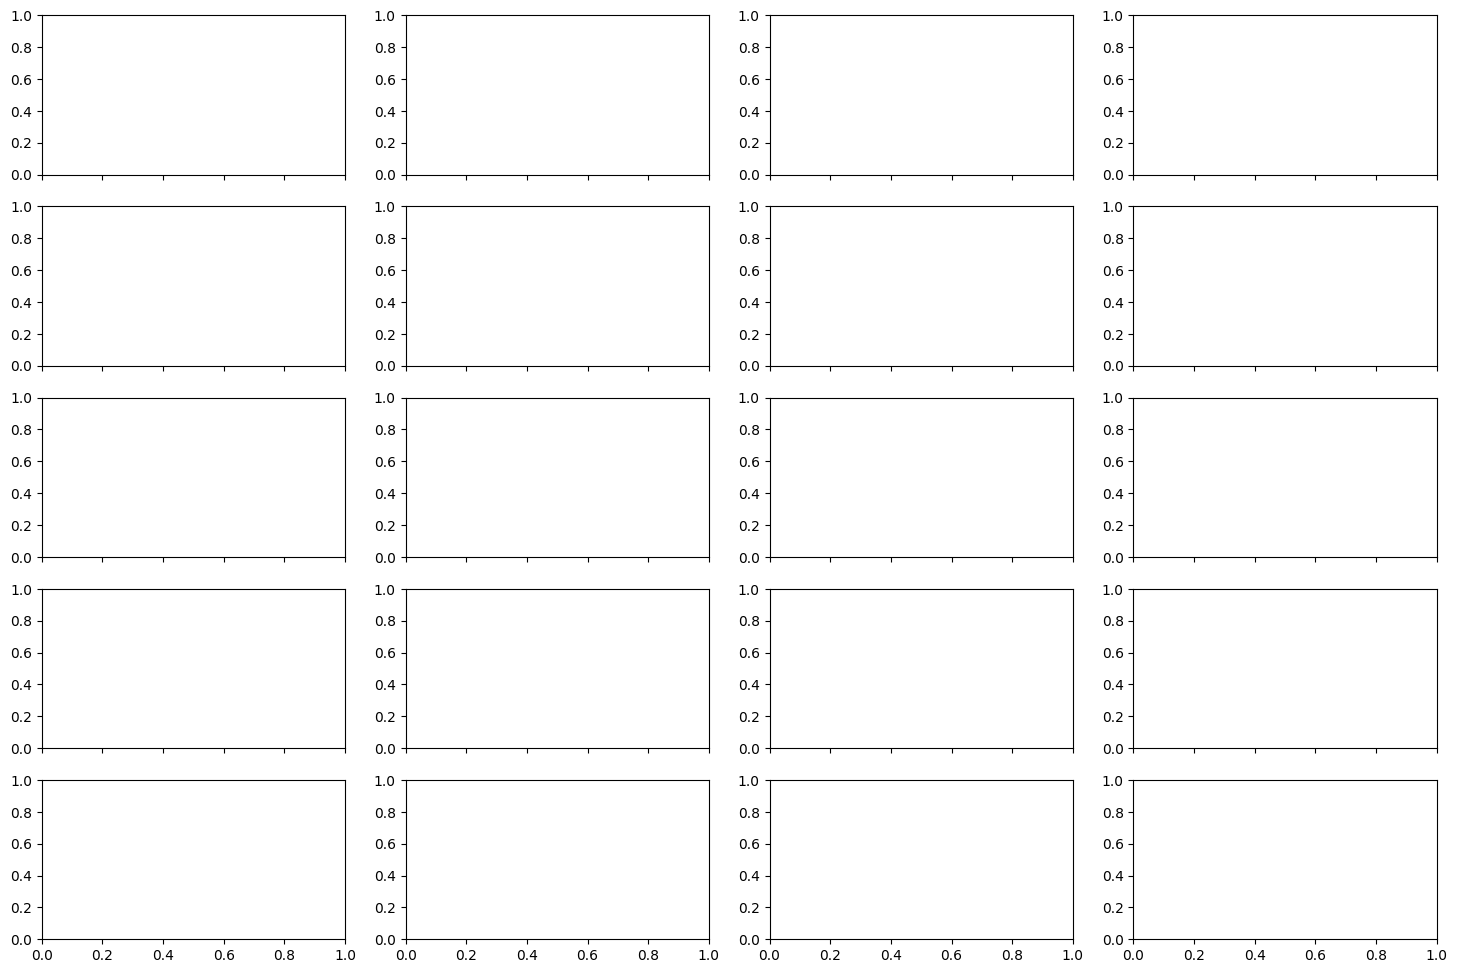

In [ ]:
fig, ax = plt.subplots(5, 4, sharex=True, figsize=(18, 12))
axes = ax.flatten()
for i, label in enumerate(np.unique(labels)):
    ax[i].plot(freq, signals[labels==label].mean(axis=0), color=colors[i], label=f'{sum(labels == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/cosine_centroids_04threshold.pdf')
plt.show()

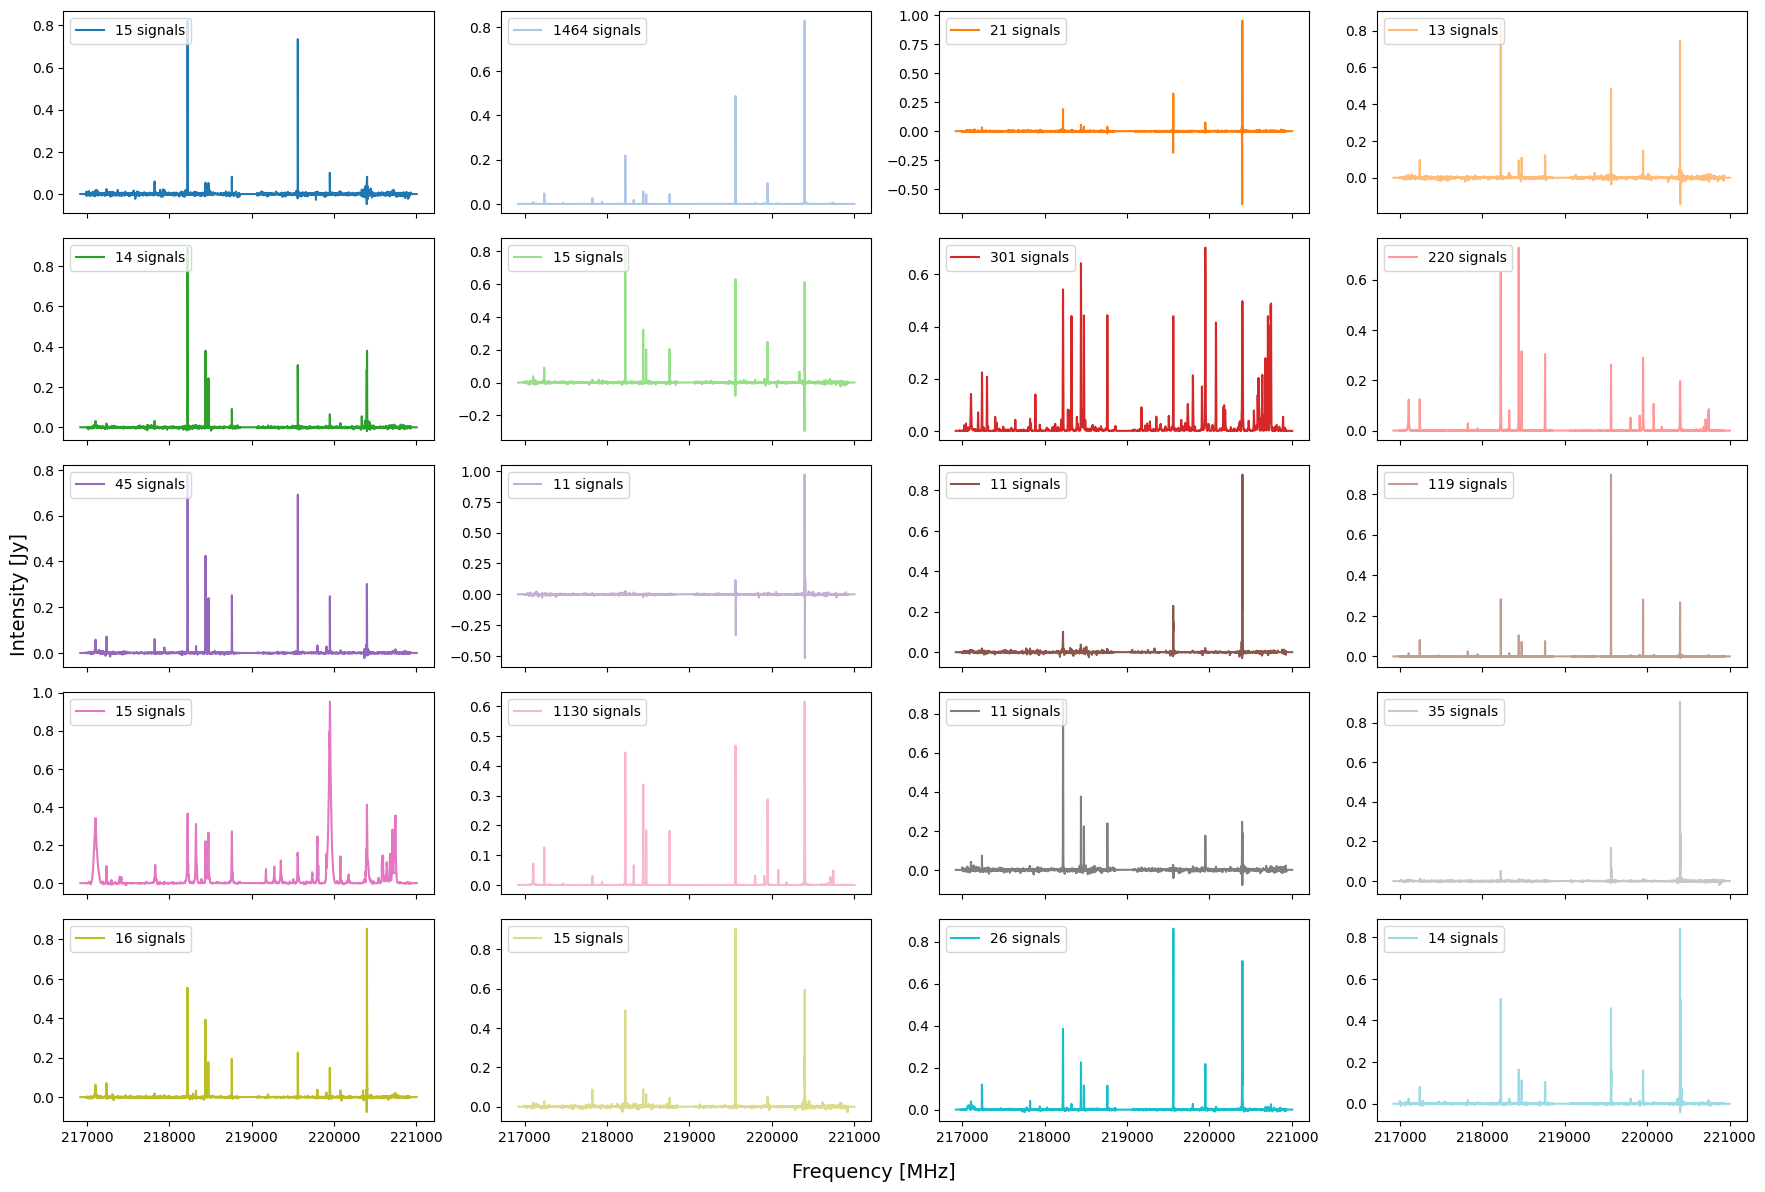

In [ ]:
fig, ax = plt.subplots(5, 4, sharex=True, figsize=(18, 12))
axes = ax.flatten()
for i, label in enumerate(np.unique(labels)):
    axes[i].plot(freq, signals[labels==label].mean(axis=0), color=colors[i], label=f'{sum(labels == label)} signals')
    axes[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/cosine_centroids_04threshold.pdf')
plt.show()

ValueError: too many values to unpack (expected 2)

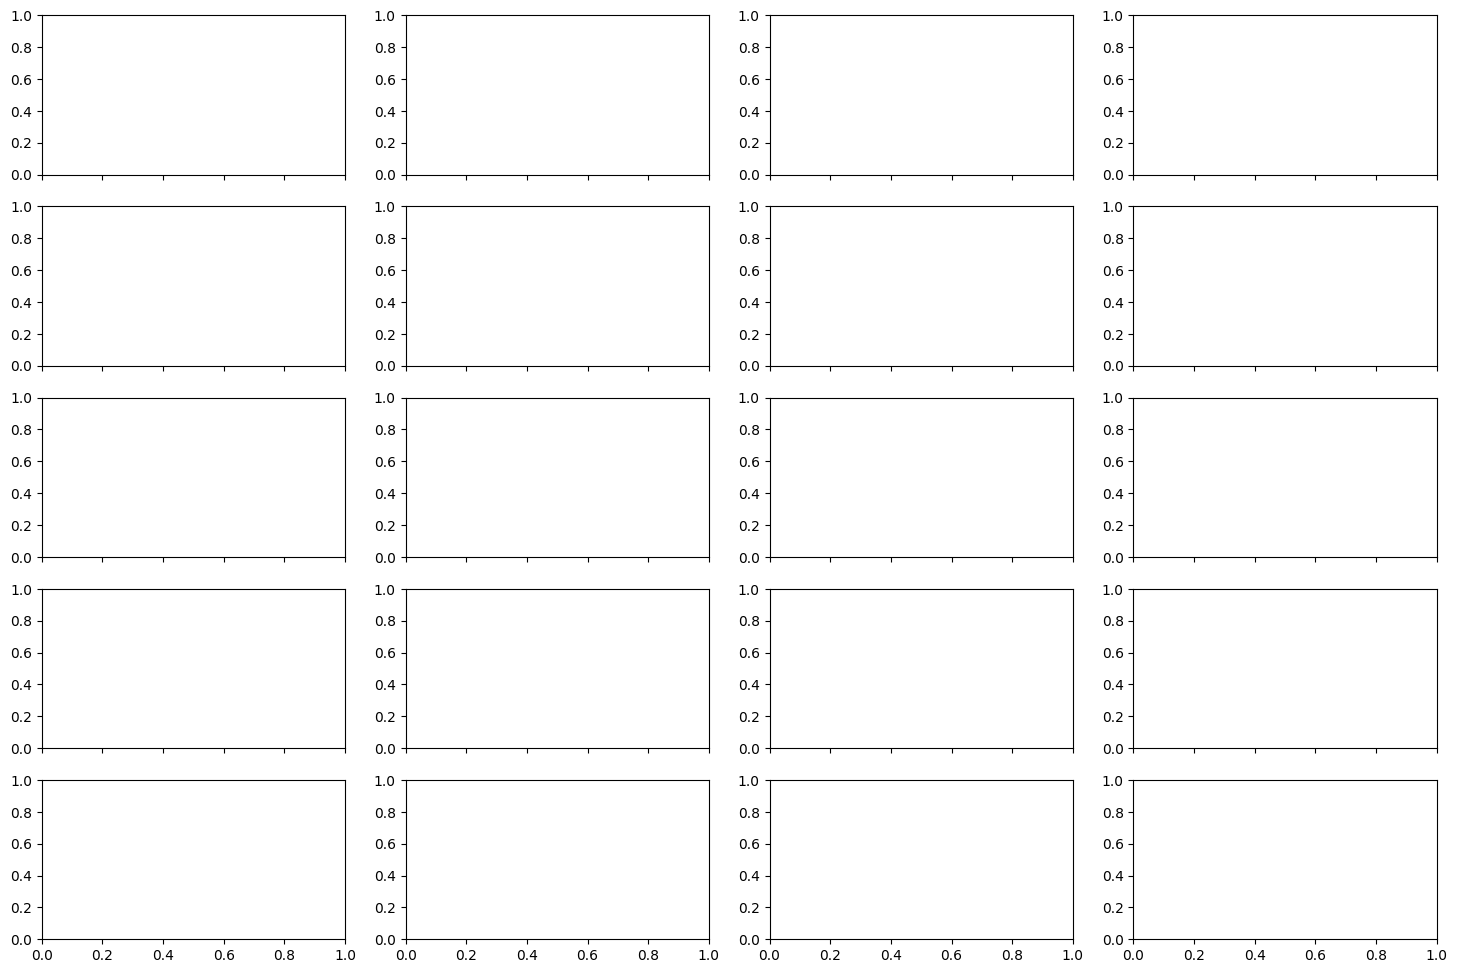

In [ ]:
fig, ax = plt.subplots(5, 4, sharex=True, figsize=(18, 12))
axes = ax.flatten()
unique_labels, sizes = np.unique(labels)
sorted_labels = unique_labels[np.argsortt(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    axes[i].plot(freq, signals[labels==label].mean(axis=0), color=colors[i], label=f'{sum(labels == label)} signals')
    axes[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/cosine_centroids_04threshold.pdf')
plt.show()

ValueError: too many values to unpack (expected 2)

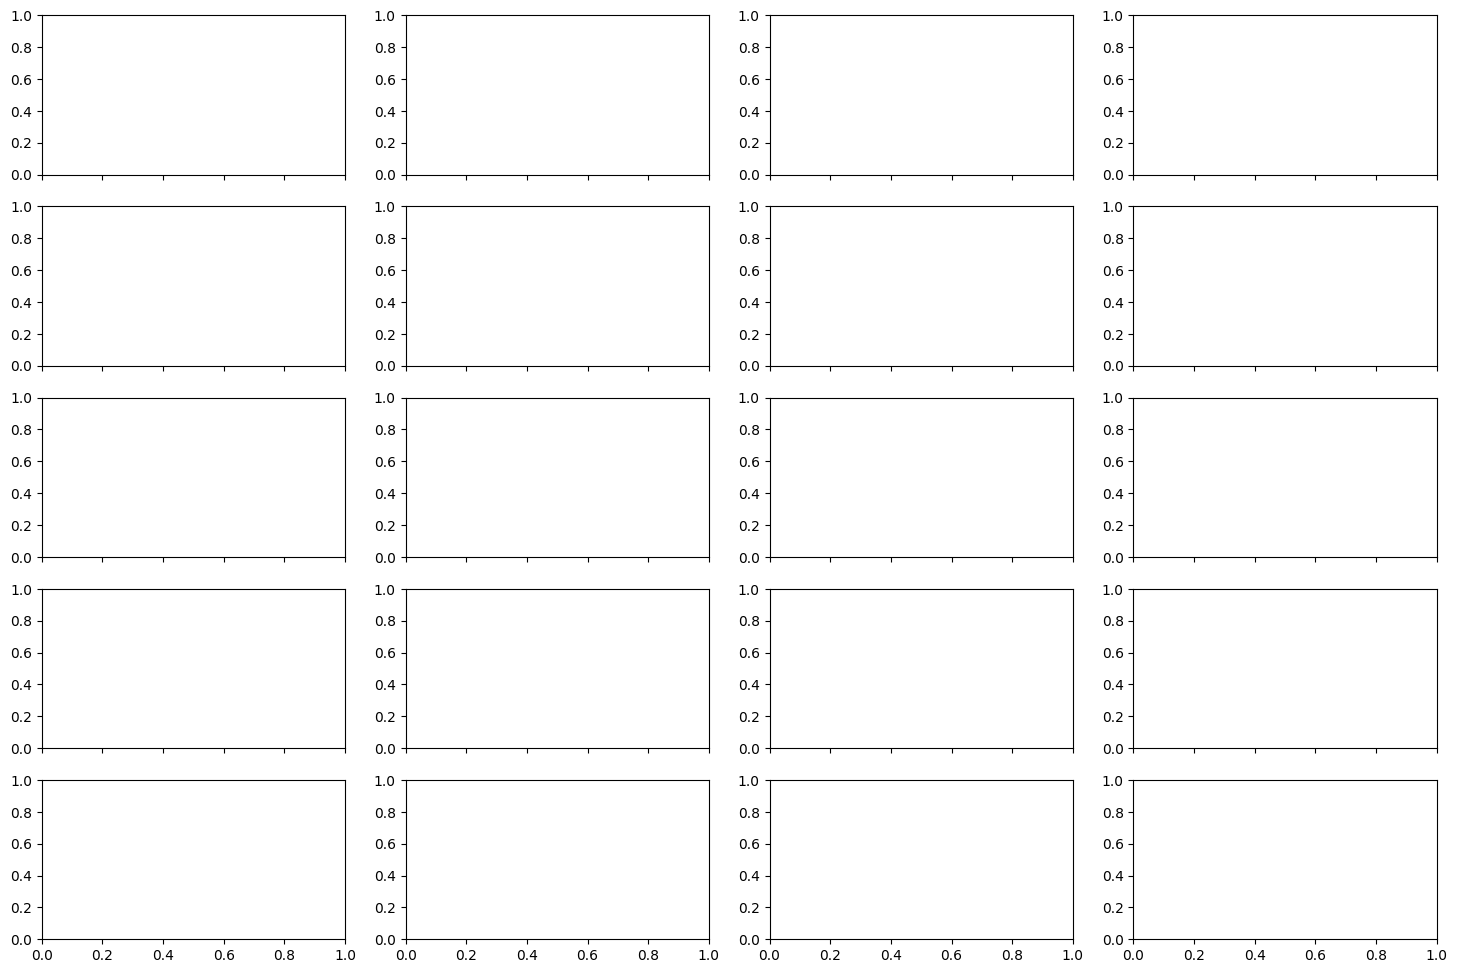

In [ ]:
fig, ax = plt.subplots(5, 4, sharex=True, figsize=(18, 12))
axes = ax.flatten()
unique_labels, sizes = np.unique(labels)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    axes[i].plot(freq, signals[labels==label].mean(axis=0), color=colors[i], label=f'{sum(labels == label)} signals')
    axes[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/cosine_centroids_04threshold.pdf')
plt.show()

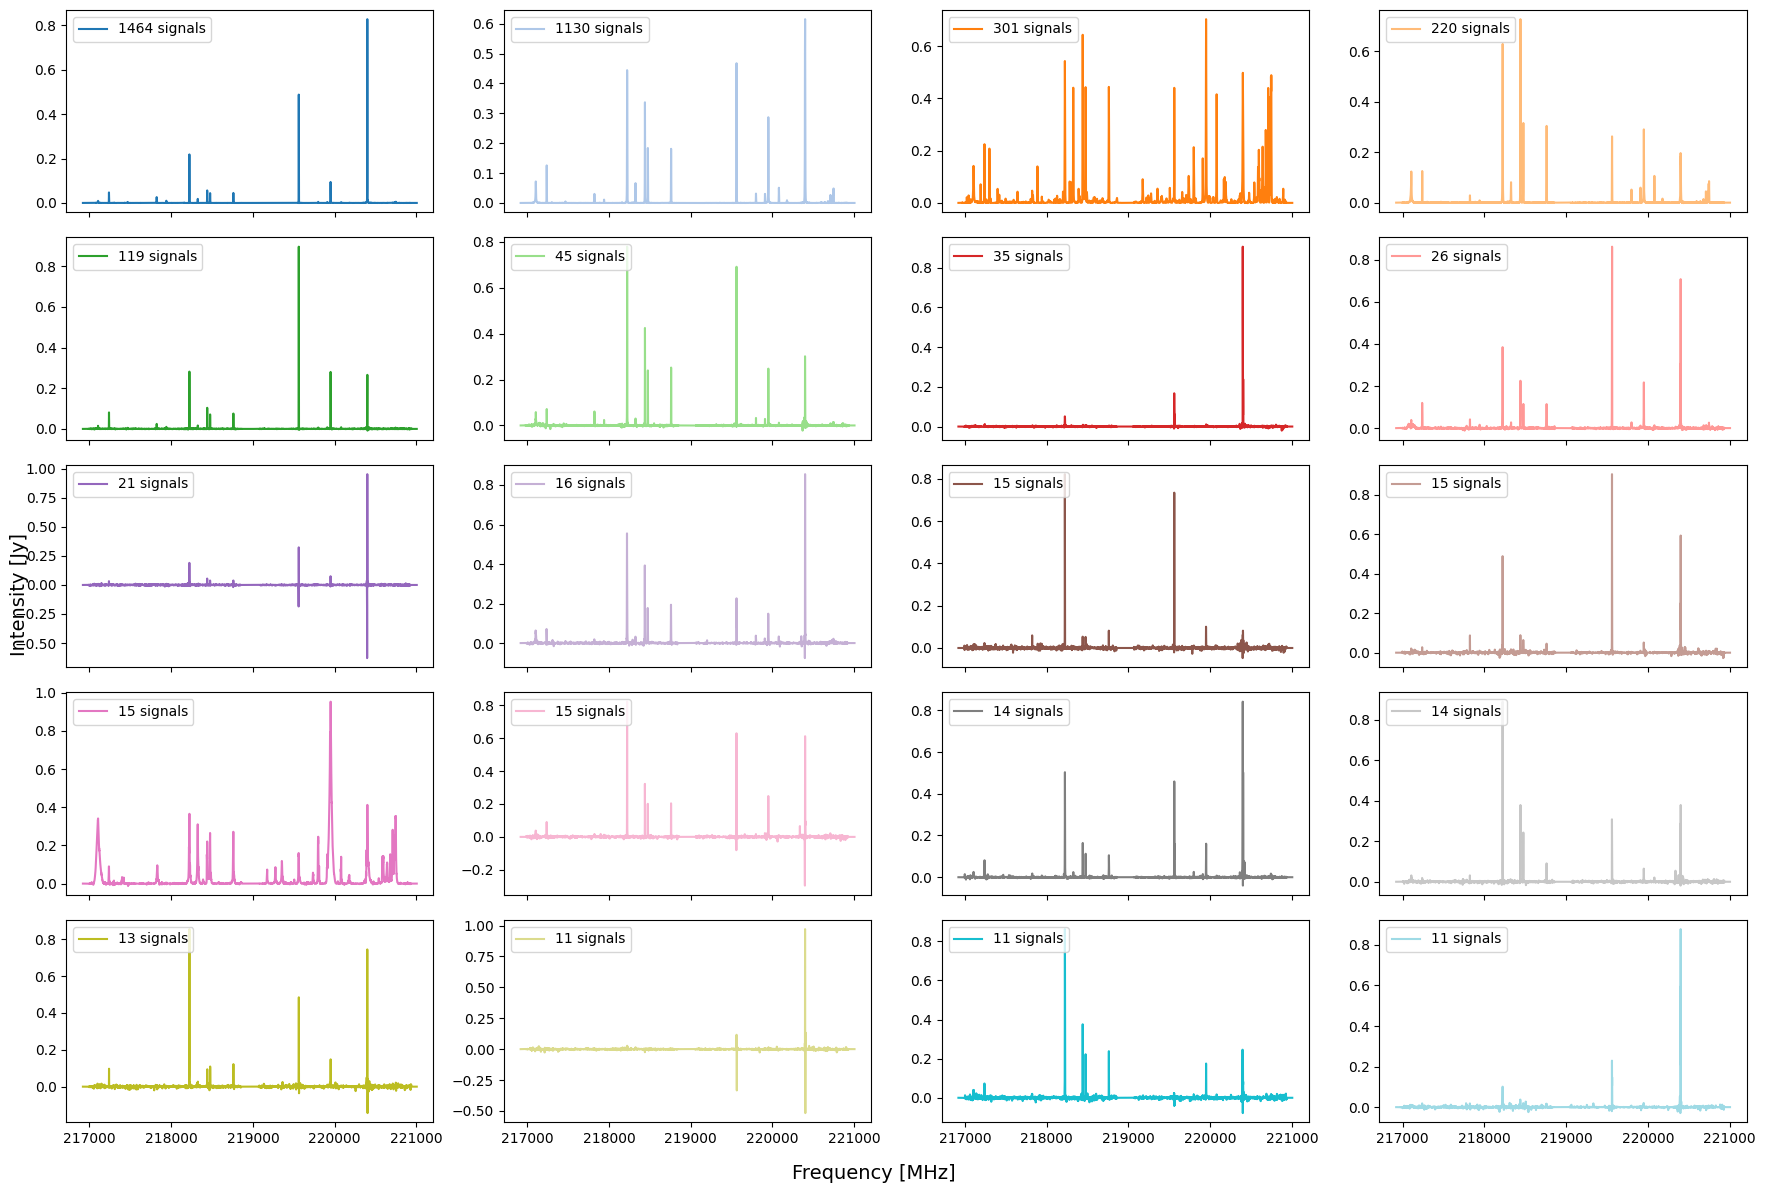

In [ ]:
fig, ax = plt.subplots(5, 4, sharex=True, figsize=(18, 12))
axes = ax.flatten()
unique_labels, sizes = np.unique(labels, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    axes[i].plot(freq, signals[labels==label].mean(axis=0), color=colors[i], label=f'{sum(labels == label)} signals')
    axes[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/cosine_centroids_04threshold.pdf')
plt.show()

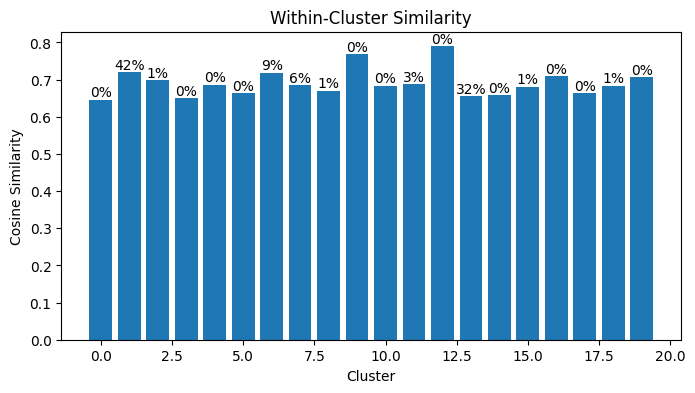

In [ ]:
wcs = within_cluster_similarity(signals, labels, plot=True)

In [ ]:
silhouette_score(signals, labels, metric="cosine")

0.0963788681368767

In [ ]:
sum(sizes > 10) / sum(sizes)

np.float64(0.005696382796923953)

In [ ]:
sum(sizes[sizes > 10]) / sum(sizes)

np.float64(1.0)

In [ ]:
sum(sizes) / len(subtraction_signals)

np.float64(0.8123553910226747)

In [ ]:
silhouette_score(signals, labels, metric="euclidean")

0.0024861411203425283

In [ ]:
euclidean_model = AgglomerativeClustering(n_clusters=1).fit(subtraction_signals)

In [ ]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



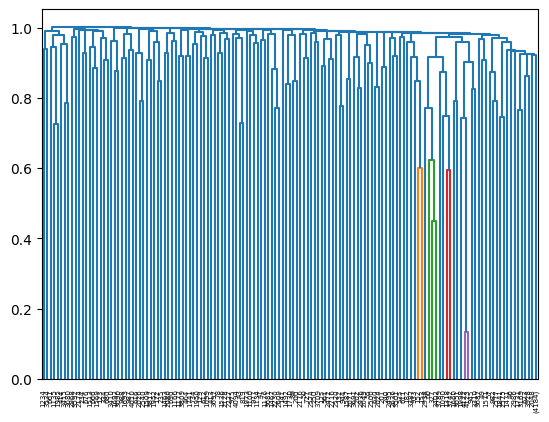

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=30)
plt.show()

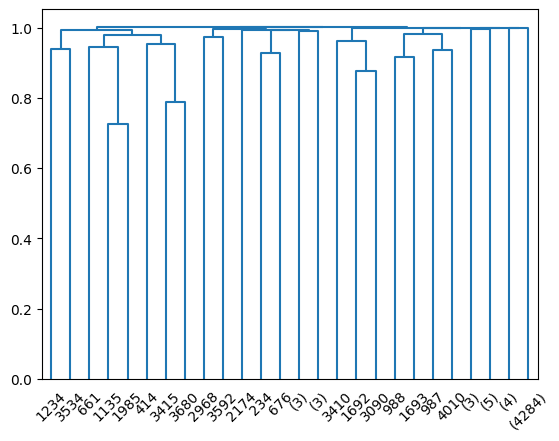

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=5)
plt.show()

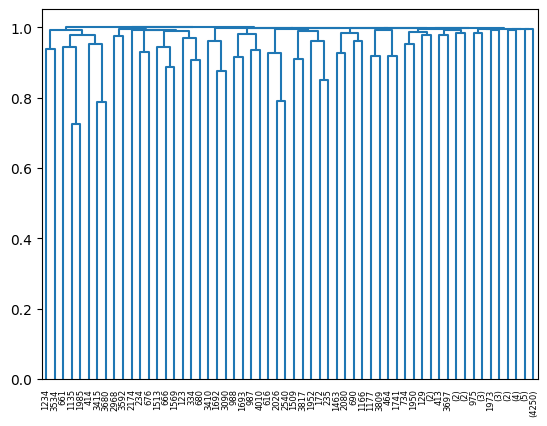

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=10)
plt.show()

In [ ]:
euclidean_model = AgglomerativeClustering(n_clusters=20).fit(subtraction_signals)

In [ ]:
s_score = []
for n in tqdm(range(2, 40)):
    e_model = AgglomerativeClustering(n_clusters=n).fit(subtraction_signals)
    s_score.append(silhouette_score(subtraction_signals, e_model.labels_, metric="cosine"))

100%|██████████| 38/38 [55:11<00:00, 87.15s/it]


<Figure size 6000x6000 with 0 Axes>

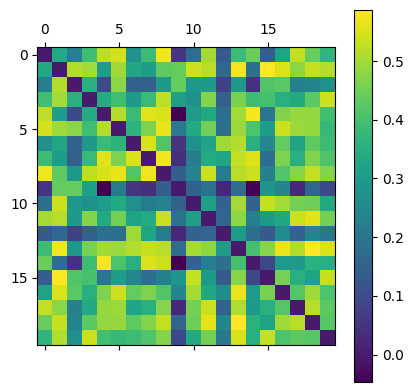

In [ ]:
bcs = between_cluster_similarity(signals, labels, plot=True)

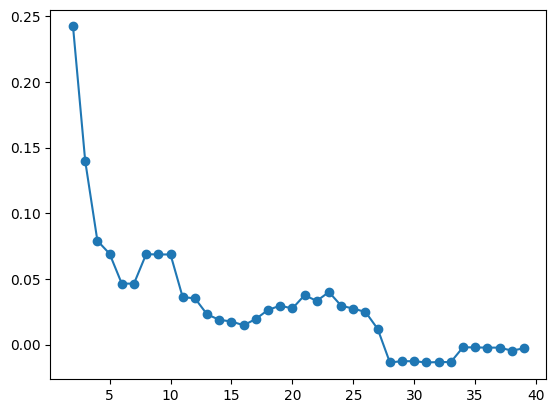

In [ ]:
plt.plot(range(2, 40), s_score, marker="o")

<Figure size 1000x1000 with 0 Axes>

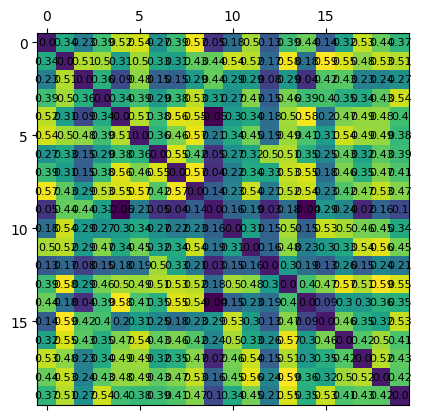

In [ ]:
plt.figure(figsize=(10, 10))
plt.matshow(bcs)
for i in range(len(bcs)):
    for j in range(len(bcs)):
        plt.text(i, j, np.round(bcs[i, j], 2), ha="center", va="center", fontsize=8)
plt.show()



<Figure size 2000x2000 with 0 Axes>

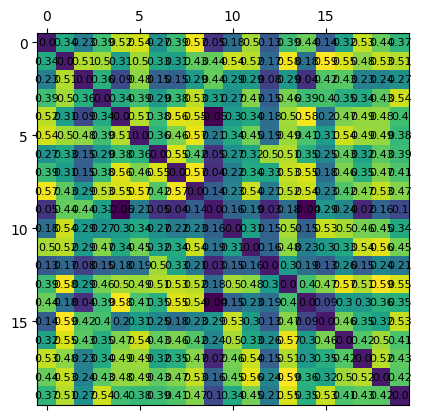

In [ ]:
plt.figure(figsize=(20, 20))
plt.matshow(bcs)
for i in range(len(bcs)):
    for j in range(len(bcs)):
        plt.text(i, j, np.round(bcs[i, j], 2), ha="center", va="center", fontsize=8)
plt.show()



<Figure size 1000x1000 with 0 Axes>

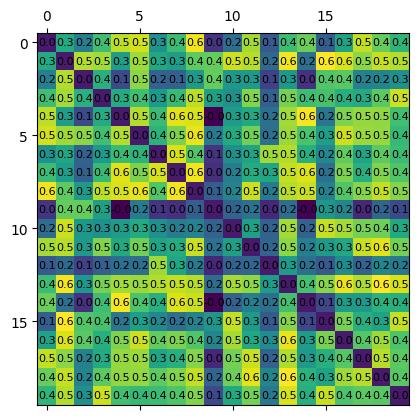

In [ ]:
plt.figure(figsize=(10, 10))
plt.matshow(bcs)
for i in range(len(bcs)):
    for j in range(len(bcs)):
        plt.text(i, j, np.round(bcs[i, j], 1), ha="center", va="center", fontsize=8)
plt.show()



<Figure size 1000x1000 with 0 Axes>

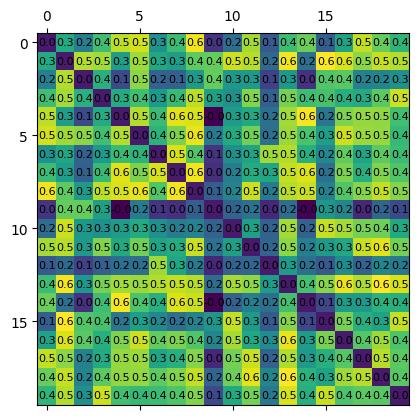

In [ ]:
plt.figure(figsize=(10, 10))
plt.matshow(bcs)
for i in range(len(bcs)):
    for j in range(len(bcs)):
        plt.text(i, j, np.round(bcs[i, j], 1), ha="center", va="center", fontsize=8)
plt.savefig("results/agglomerative/bcs_04threshold.pdf")
plt.show()

In [ ]:
len(np.unique(labels))

20

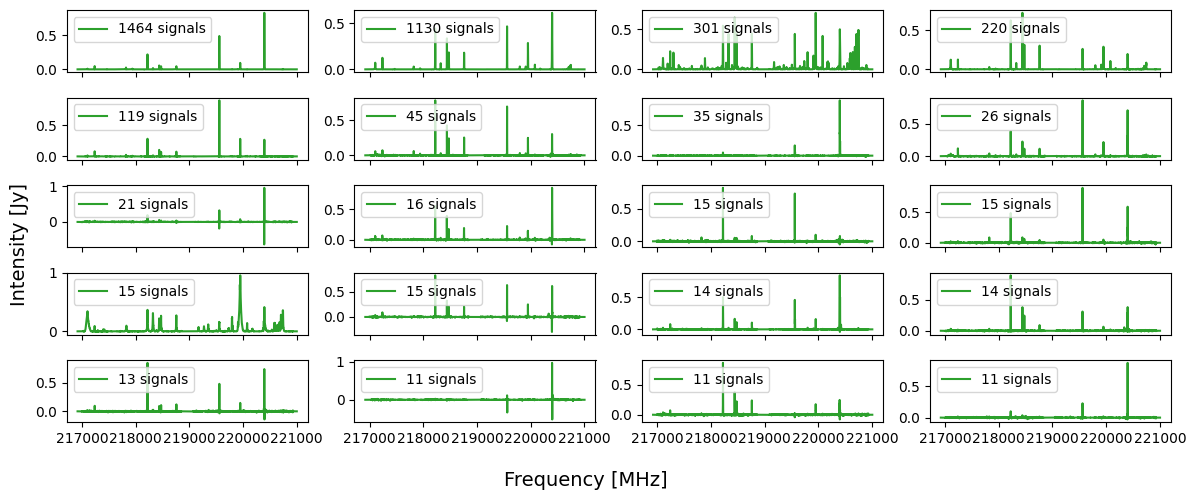

In [ ]:
fig, axes = plt.subplots(5, 4, sharex=True, figsize=(12, 5))
ax = axes.flatten()
unique_labels, sizes = np.unique(labels, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, signals[labels==label].mean(axis=0), color='tab:green', label=f'{sum(labels == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/centroids_04_threshold.pdf')
plt.show()

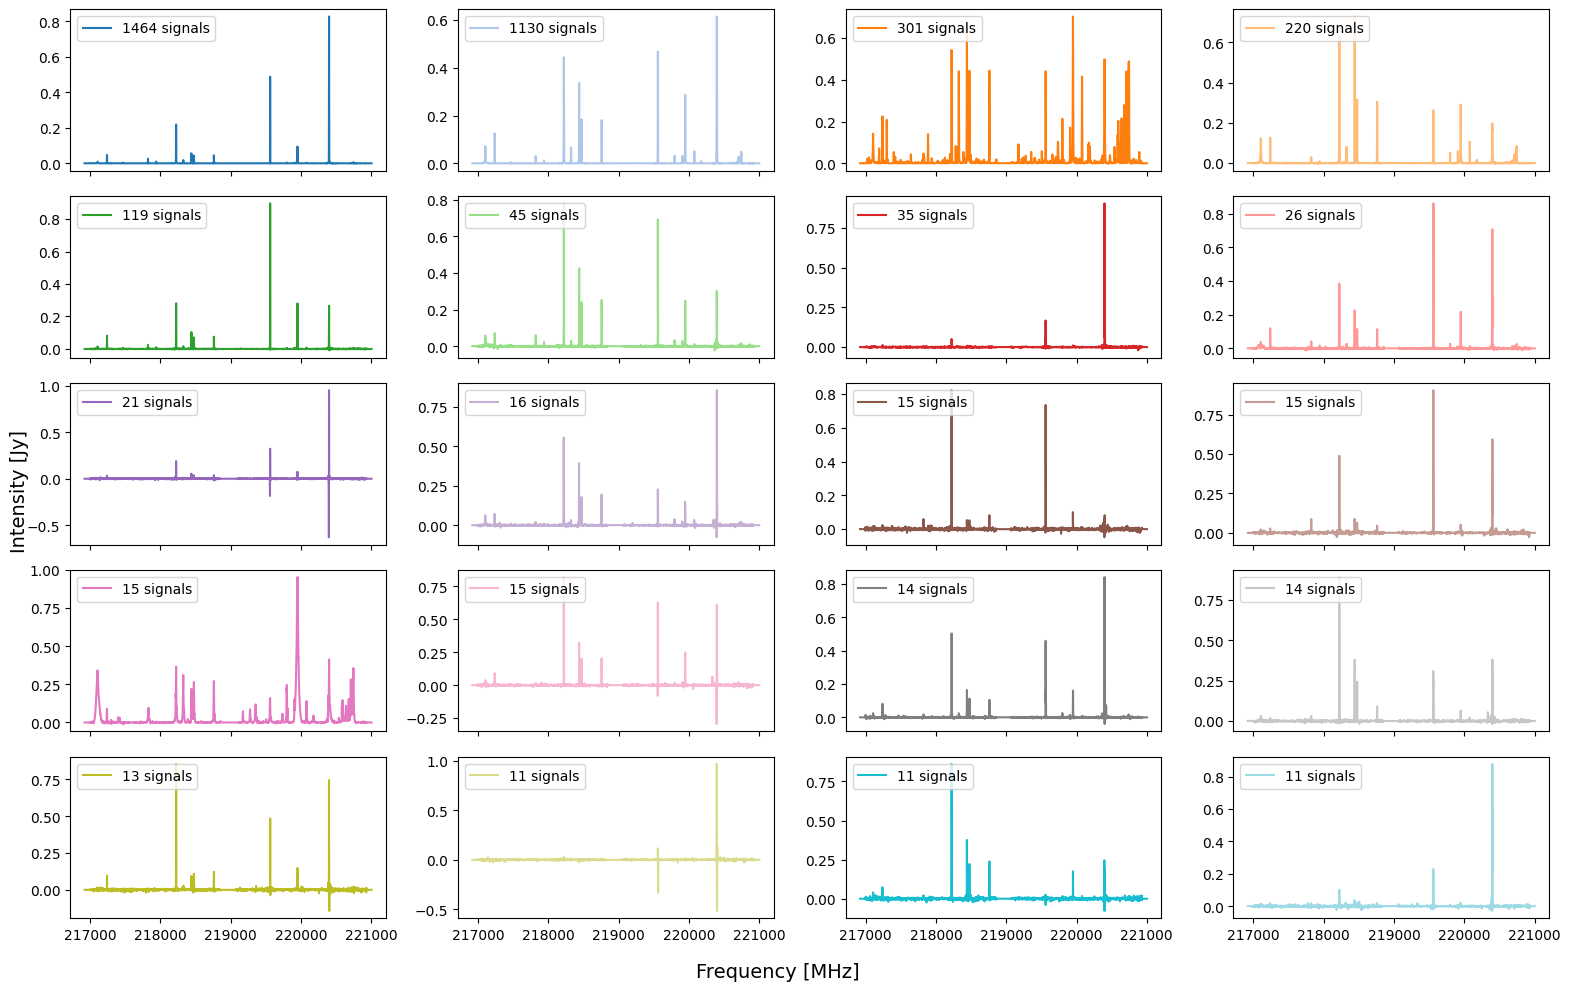

In [ ]:
fig, axes = plt.subplots(5, 4, sharex=True, figsize=(16, 10))
ax = axes.flatten()
unique_labels, sizes = np.unique(labels, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, signals[labels==label].mean(axis=0), color=colors[i], label=f'{sum(labels == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/centroids_04_threshold.pdf')
plt.show()

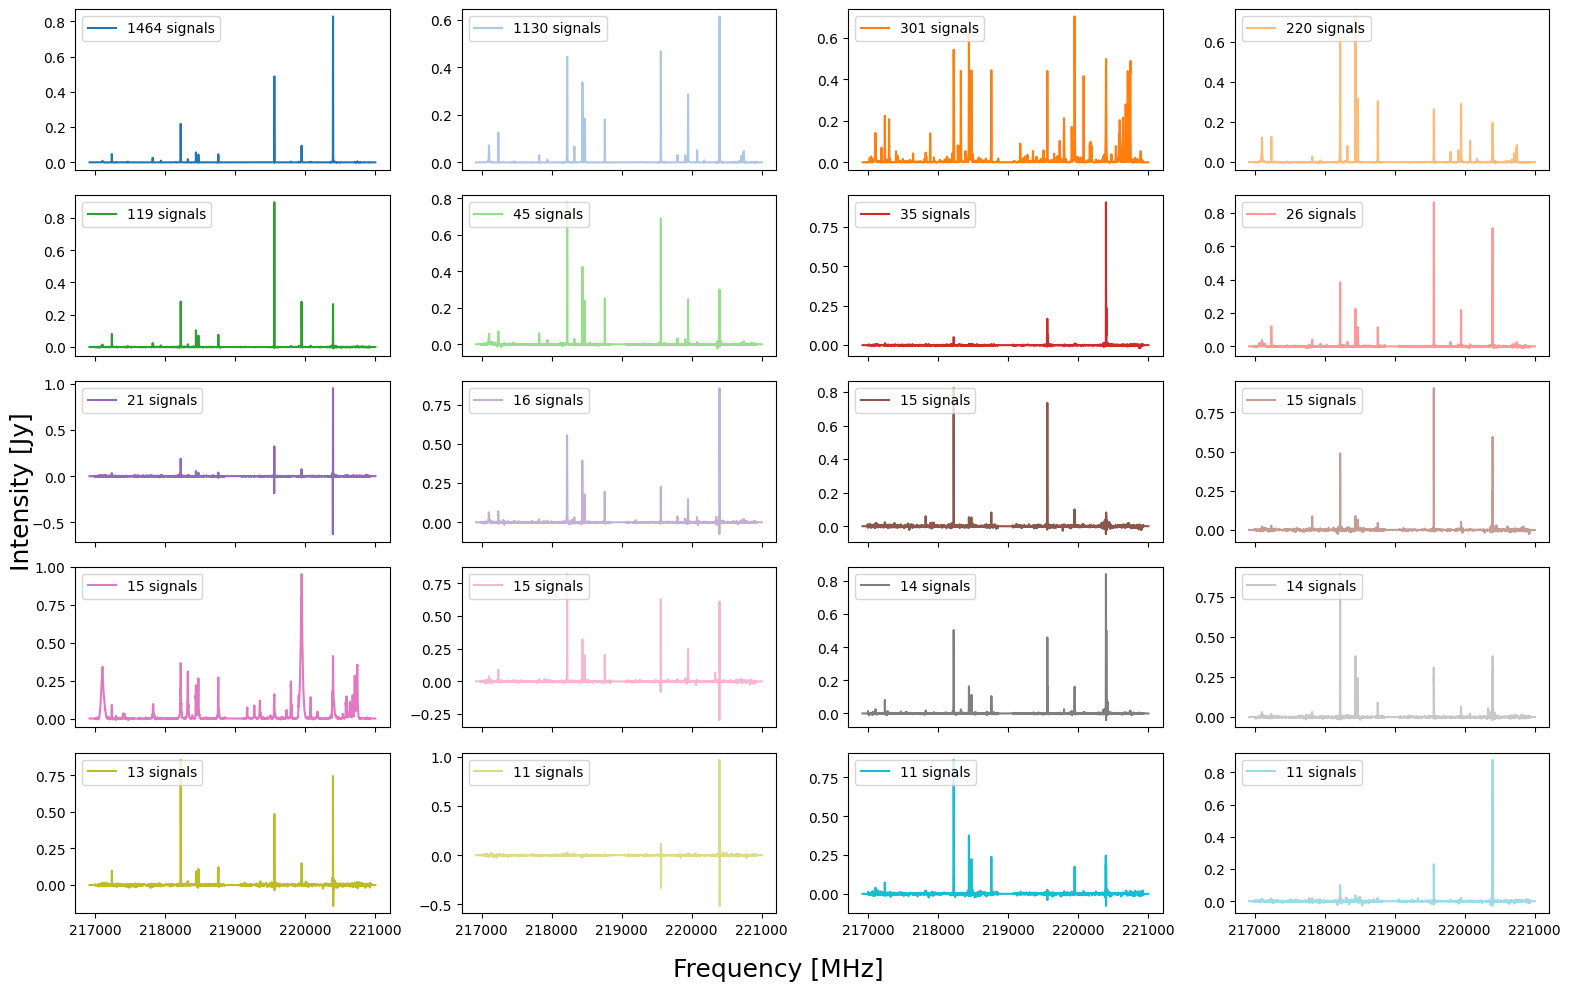

In [ ]:
fig, axes = plt.subplots(5, 4, sharex=True, figsize=(16, 10))
ax = axes.flatten()
unique_labels, sizes = np.unique(labels, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, signals[labels==label].mean(axis=0), color=colors[i], label=f'{sum(labels == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=18)
fig.supylabel('Intensity [Jy]', fontsize=18)
fig.tight_layout()
fig.savefig('results/agglomerative/centroids_04_threshold.pdf')
plt.show()

In [ ]:
model_10 = AgglomerativeClustering(n_clusters=10).fit(subtraction_signals)

NameError: name 'subtraction_signal' is not defined

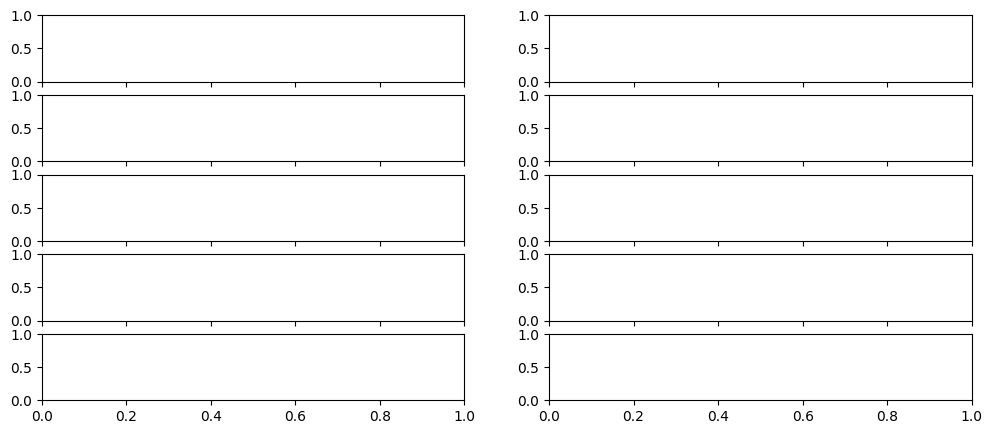

In [ ]:
fig, axes = plt.subplots(5, 2, sharex=True, figsize=(12, 5))
ax = axes.flatten()
unique_labels, sizes = np.unique(model_10.labels_, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors_10 = plt.get_cmap("tab10").colors
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, subtraction_signal[model_10.labels_==label].mean(axis=0), color=colors_10[i], label=f'{sum(model_10.labels_ == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_centroids_10clusters.pdf')
plt.show()

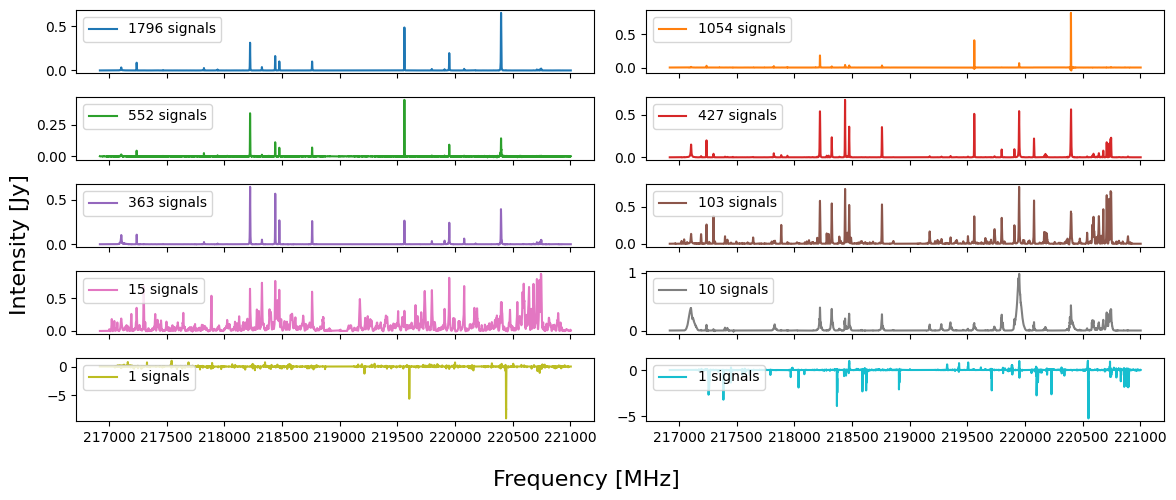

In [ ]:
fig, axes = plt.subplots(5, 2, sharex=True, figsize=(12, 5))
ax = axes.flatten()
unique_labels, sizes = np.unique(model_10.labels_, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors_10 = plt.get_cmap("tab10").colors
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, subtraction_signals[model_10.labels_==label].mean(axis=0), color=colors_10[i], label=f'{sum(model_10.labels_ == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_centroids_10clusters.pdf')
plt.show()

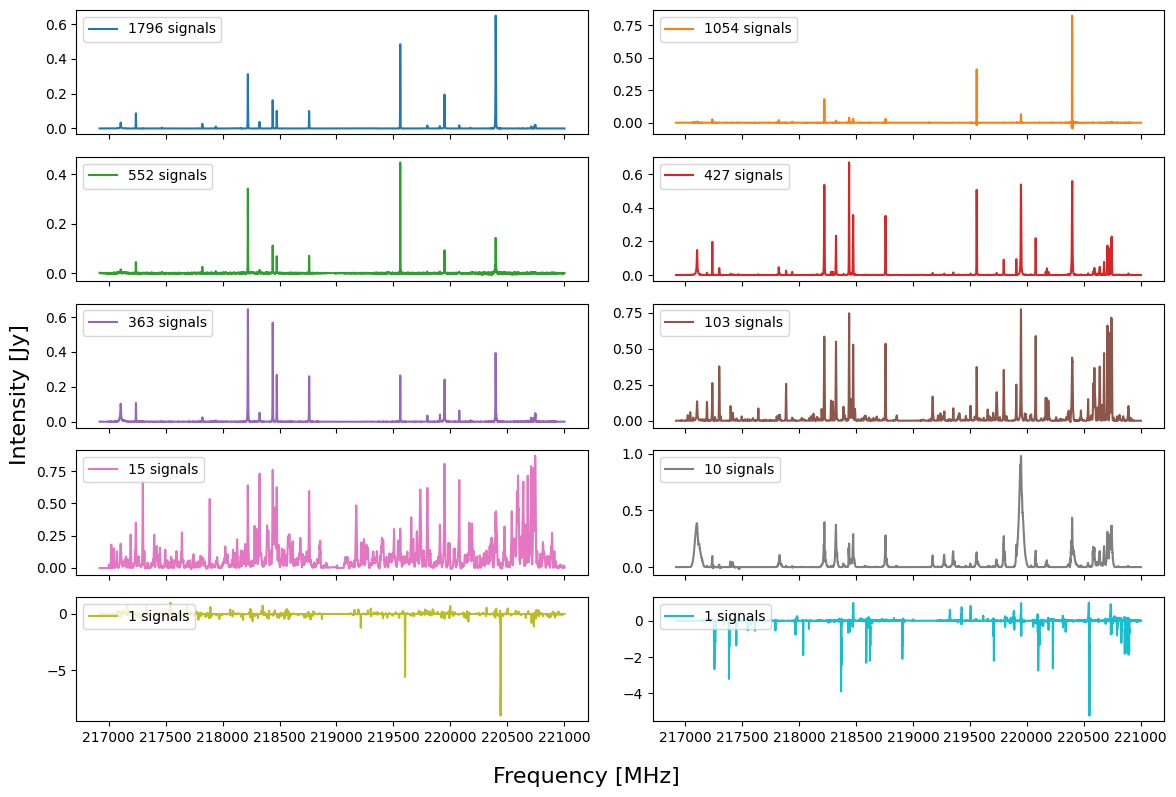

In [ ]:
fig, axes = plt.subplots(5, 2, sharex=True, figsize=(12, 8))
ax = axes.flatten()
unique_labels, sizes = np.unique(model_10.labels_, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors_10 = plt.get_cmap("tab10").colors
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, subtraction_signals[model_10.labels_==label].mean(axis=0), color=colors_10[i], label=f'{sum(model_10.labels_ == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_centroids_10clusters.pdf')
plt.show()

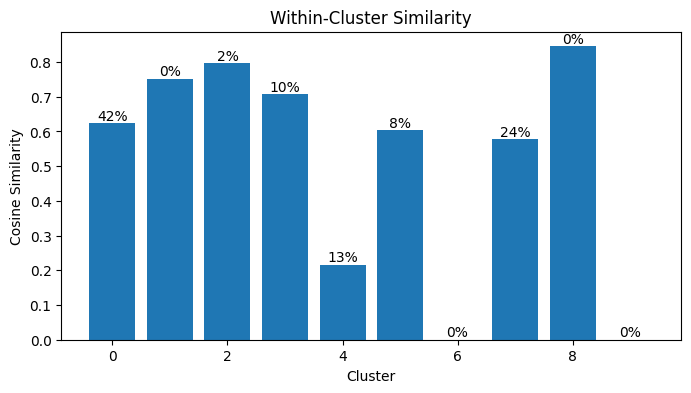

array([0.62307852, 0.75181505, 0.79617471, 0.70712747, 0.21605531,
       0.60411697, 0.        , 0.57726354, 0.84489189, 0.        ])

In [ ]:
within_cluster_similarity(subtraction_signals, model_10.labels_, plot=True)

<Figure size 3000x3000 with 0 Axes>

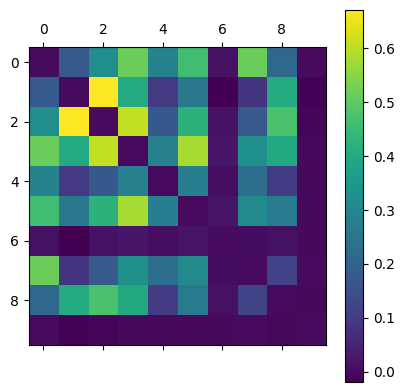

array([[ 0.00000000e+00,  1.75175147e-01,  3.18526356e-01,
         5.12692944e-01,  2.88393456e-01,  4.58999030e-01,
         1.17656147e-02,  5.16694223e-01,  2.13329531e-01,
         5.95637308e-05],
       [ 1.75175147e-01,  0.00000000e+00,  6.71430914e-01,
         4.01613797e-01,  9.68702007e-02,  2.57617325e-01,
        -1.93958471e-02,  8.72557025e-02,  4.04303346e-01,
        -1.62176066e-02],
       [ 3.18526356e-01,  6.71430914e-01,  0.00000000e+00,
         6.09338143e-01,  1.71854402e-01,  4.23177087e-01,
         1.54293230e-02,  1.74844062e-01,  4.72390252e-01,
        -6.23021665e-03],
       [ 5.12692944e-01,  4.01613797e-01,  6.09338143e-01,
         0.00000000e+00,  2.82316739e-01,  5.81358772e-01,
         2.32490375e-02,  3.28514955e-01,  4.01421671e-01,
        -1.95184279e-03],
       [ 2.88393456e-01,  9.68702007e-02,  1.71854402e-01,
         2.82316739e-01,  0.00000000e+00,  2.75089715e-01,
         6.25397570e-03,  2.30718825e-01,  1.00190537e-01,
        -1.

In [ ]:
between_cluster_similarity(subtraction_signals, model_10.labels_, plot=True)

<Figure size 3000x3000 with 0 Axes>

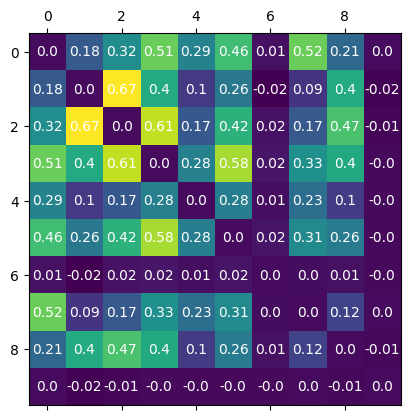

array([[ 0.00000000e+00,  1.75175147e-01,  3.18526356e-01,
         5.12692944e-01,  2.88393456e-01,  4.58999030e-01,
         1.17656147e-02,  5.16694223e-01,  2.13329531e-01,
         5.95637308e-05],
       [ 1.75175147e-01,  0.00000000e+00,  6.71430914e-01,
         4.01613797e-01,  9.68702007e-02,  2.57617325e-01,
        -1.93958471e-02,  8.72557025e-02,  4.04303346e-01,
        -1.62176066e-02],
       [ 3.18526356e-01,  6.71430914e-01,  0.00000000e+00,
         6.09338143e-01,  1.71854402e-01,  4.23177087e-01,
         1.54293230e-02,  1.74844062e-01,  4.72390252e-01,
        -6.23021665e-03],
       [ 5.12692944e-01,  4.01613797e-01,  6.09338143e-01,
         0.00000000e+00,  2.82316739e-01,  5.81358772e-01,
         2.32490375e-02,  3.28514955e-01,  4.01421671e-01,
        -1.95184279e-03],
       [ 2.88393456e-01,  9.68702007e-02,  1.71854402e-01,
         2.82316739e-01,  0.00000000e+00,  2.75089715e-01,
         6.25397570e-03,  2.30718825e-01,  1.00190537e-01,
        -1.

In [ ]:
between_cluster_similarity(subtraction_signals, model_10.labels_, plot=True, text=True)

In [ ]:
model_23 = AgglomerativeClustering(n_clusters=23).fit(subtraction_signals)

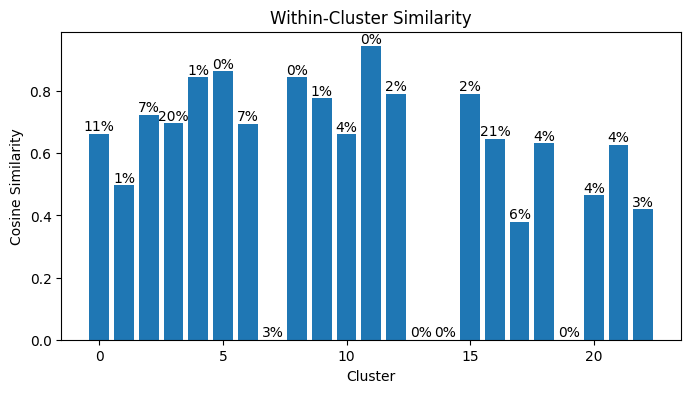

array([6.62597537e-01, 4.96966270e-01, 7.24270277e-01, 6.96537629e-01,
       8.45337249e-01, 8.64831523e-01, 6.94888865e-01, 6.34444072e-04,
       8.44891887e-01, 7.76500065e-01, 6.62247639e-01, 9.44080273e-01,
       7.91428002e-01, 0.00000000e+00, 0.00000000e+00, 7.91919413e-01,
       6.47127332e-01, 3.79862106e-01, 6.33063046e-01, 0.00000000e+00,
       4.64928626e-01, 6.27330222e-01, 4.20662195e-01])

In [ ]:
within_cluster_similarity(subtraction_signals, model_23.labels_, plot=True)

IndexError: index 10 is out of bounds for axis 0 with size 10

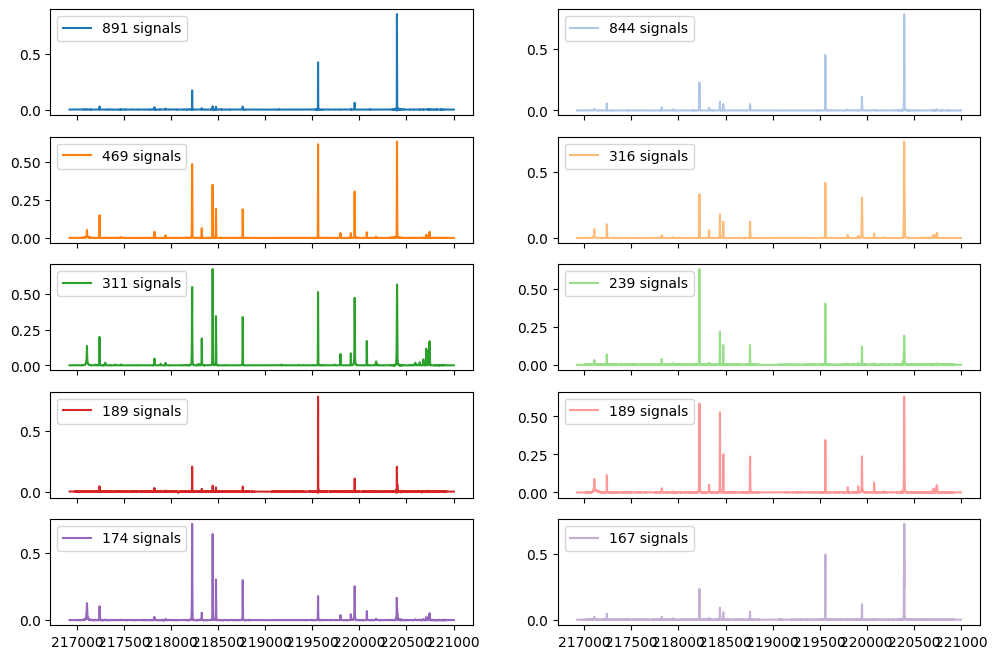

In [ ]:
fig, axes = plt.subplots(5, 2, sharex=True, figsize=(12, 8))
ax = axes.flatten()
unique_labels, sizes = np.unique(model_23.labels_, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    if i > 20:
        style = "--"
        clr = colors[i - 20]
    else:
        style="-"
        clr = colors[i]
    ax[i].plot(freq, subtraction_signals[model_23.labels_==label].mean(axis=0), color=clr, linestyle=style, label=f'{sum(model_23.labels_ == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_centroids_23clusters.pdf')
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

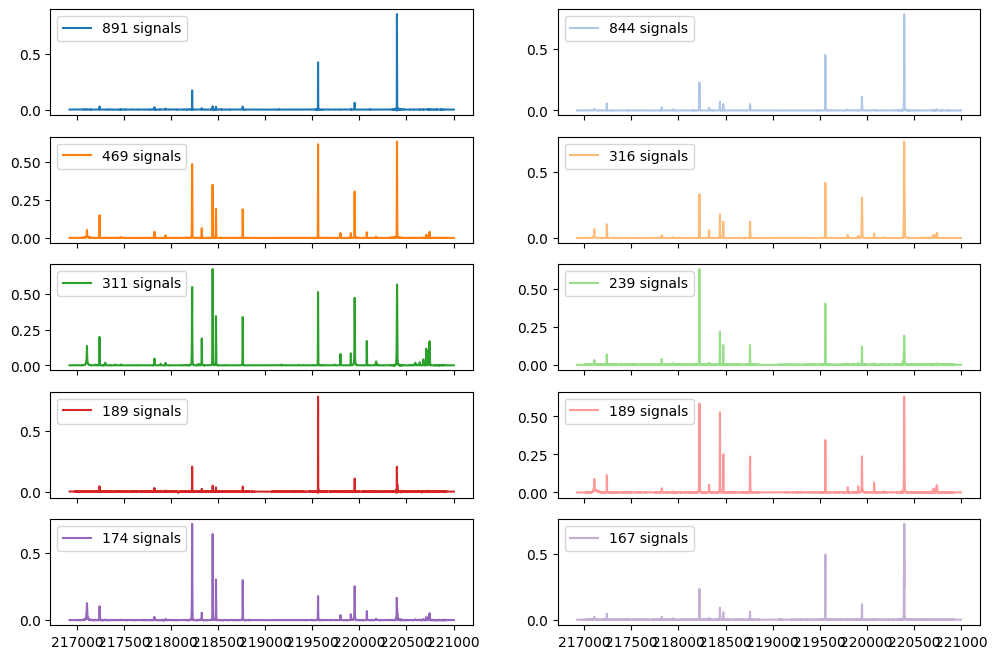

In [ ]:
fig, axes = plt.subplots(5, 2, sharex=True, figsize=(12, 8))
ax = axes.flatten()
unique_labels, sizes = np.unique(model_23.labels_, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors = plt.get_cmap("tab20").colors
for i, label in enumerate(sorted_labels):
    if i >= 20:
        style = "--"
        clr = colors[i - 20]
    else:
        style="-"
        clr = colors[i]
    ax[i].plot(freq, subtraction_signals[model_23.labels_==label].mean(axis=0), color=clr, linestyle=style, label=f'{sum(model_23.labels_ == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_centroids_23clusters.pdf')
plt.show()

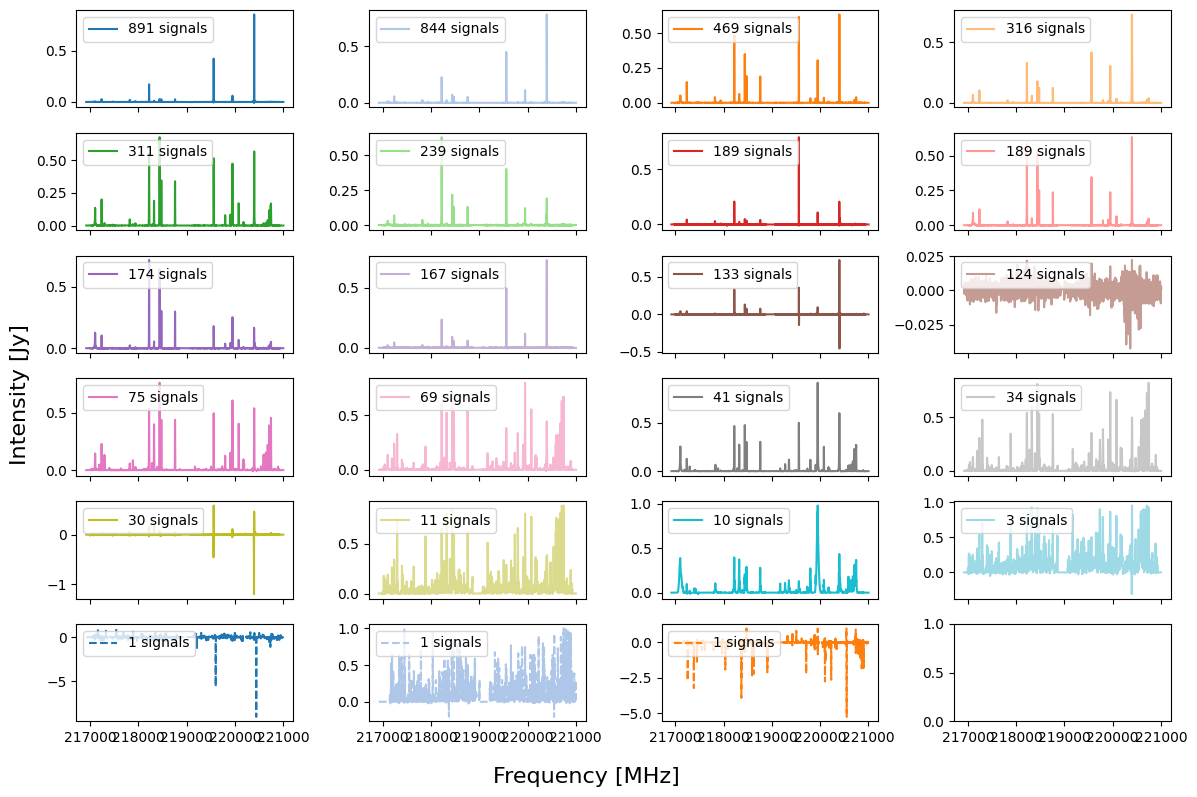

In [ ]:
fig, axes = plt.subplots(6, 4, sharex=True, figsize=(12, 8))
ax = axes.flatten()
unique_labels, sizes = np.unique(model_23.labels_, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors = plt.get_cmap("tab20").colors
for i, label in enumerate(sorted_labels):
    if i >= 20:
        style = "--"
        clr = colors[i - 20]
    else:
        style="-"
        clr = colors[i]
    ax[i].plot(freq, subtraction_signals[model_23.labels_==label].mean(axis=0), color=clr, linestyle=style, label=f'{sum(model_23.labels_ == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_centroids_23clusters.pdf')
plt.show()

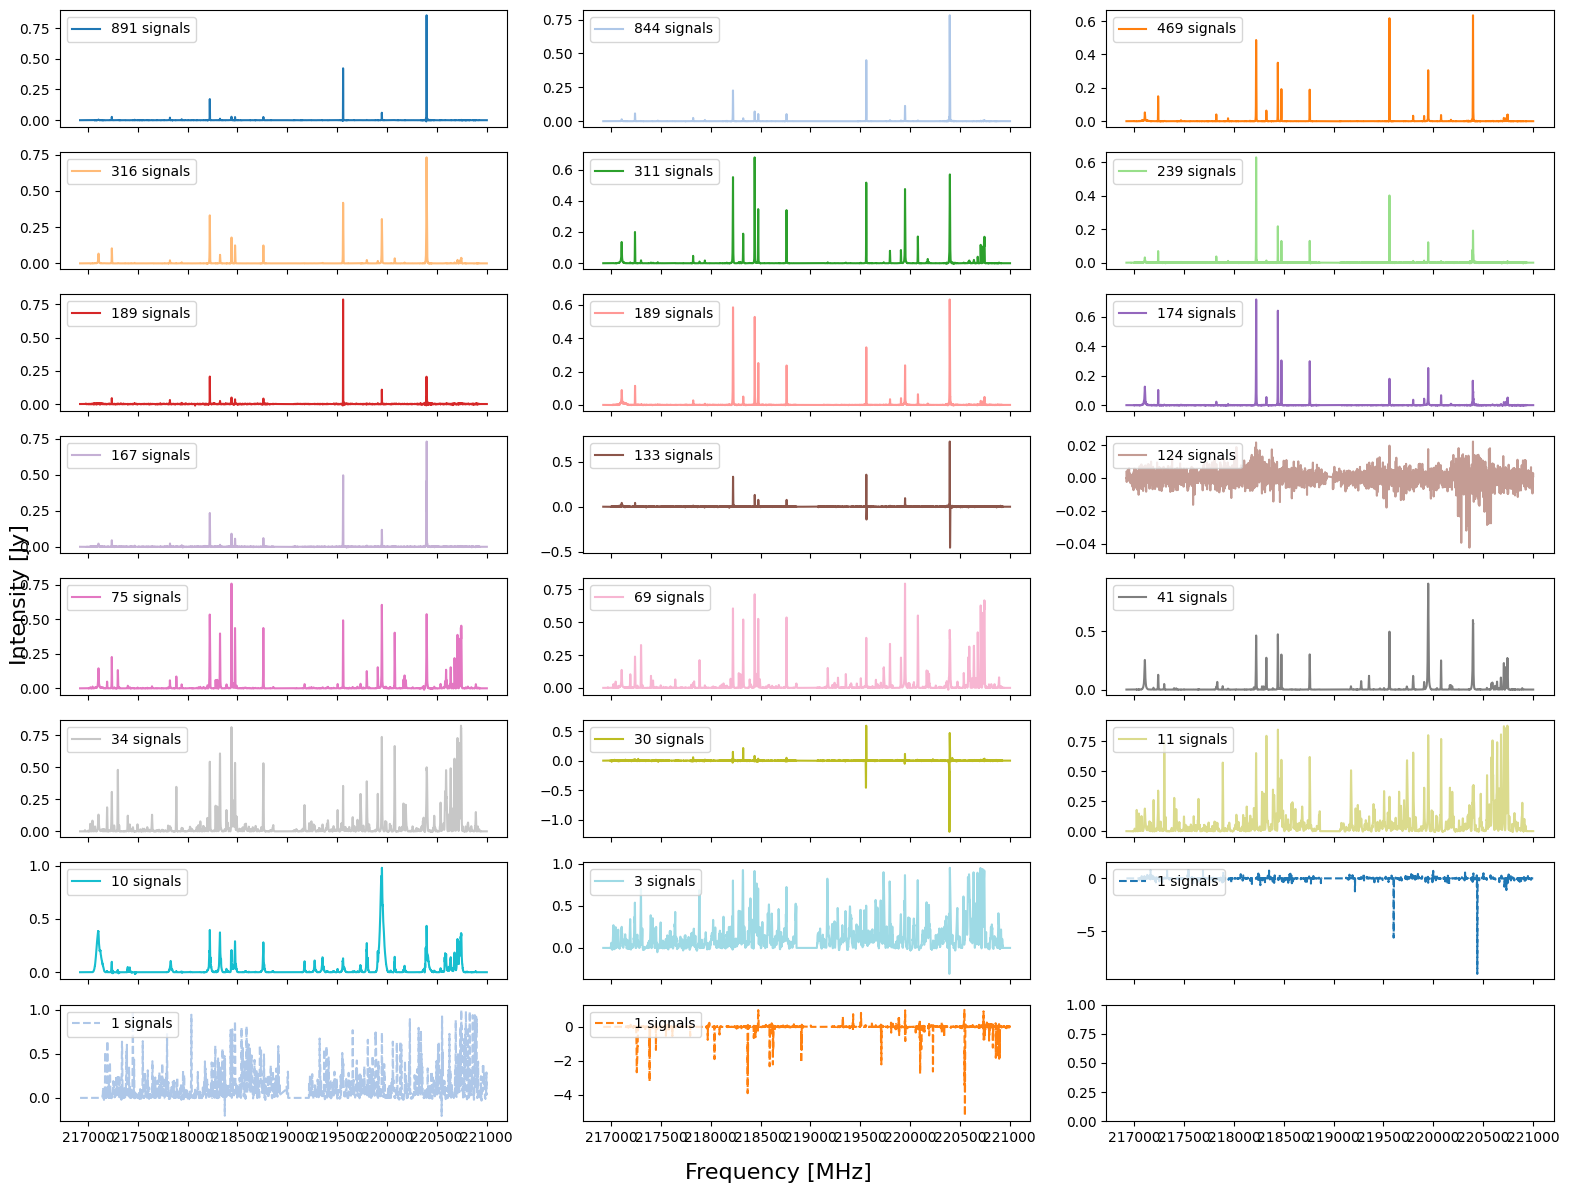

In [ ]:
fig, axes = plt.subplots(8, 3, sharex=True, figsize=(16, 12))
ax = axes.flatten()
unique_labels, sizes = np.unique(model_23.labels_, return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors = plt.get_cmap("tab20").colors
for i, label in enumerate(sorted_labels):
    if i >= 20:
        style = "--"
        clr = colors[i - 20]
    else:
        style="-"
        clr = colors[i]
    ax[i].plot(freq, subtraction_signals[model_23.labels_==label].mean(axis=0), color=clr, linestyle=style, label=f'{sum(model_23.labels_ == label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=16)
fig.supylabel('Intensity [Jy]', fontsize=16)
fig.tight_layout()
fig.savefig('results/agglomerative/euclidean_centroids_23clusters.pdf')
plt.show()

In [ ]:
def within_cluster_similarity(data: np.ndarray, labels: list,
                              std: bool = False,
                              plot: bool = False,
                              title: str = None) -> np.ndarray:
    """
    Evaluate the within-cluster similarity of the data
    :param data: 2D numpy array containing the data for each signal
    :param labels: list containing the cluster labels_ for each signal
    :param batch_size: size of the batches that will be compared within each cluster
    :param std: boolean to calculate or not the standard deviation of the within-cluster similarity
    :param plot: boolean to plot the within-cluster similarity of each cluster in a bar plot
    :param title: string with the title of the plot
    :return: array containing the within-cluster similarity for each signal. If the cluster only contains one signal,
    the value is set to np.nan
    """
    from sklearn.metrics.pairwise import cosine_similarity
    import matplotlib.pyplot as plt
    
    if len(data) != len(labels):
        raise ValueError('Data and labels_ must have the same length')

    # Obtain unique labels and counts
    within_cluster_similarity = np.array([])
    within_cluster_std = np.array([])
    clusters, sizes = np.unique(labels, return_counts=True)

    # Loop over all different clusters
    for i, cluster in enumerate(clusters):
        # Append a similarity of 0 and continue if the cluster has only one element
        if sizes[i] == 1:
            within_cluster_similarity = np.append(within_cluster_similarity, 0)
            within_cluster_std = np.append(within_cluster_std, 0)
            continue

        # Initiate internal evaluation loop
        cluster_data = data[labels == cluster]
        cluster_similarity = cosine_similarity(cluster_data, cluster_data)
        cluster_similarity = cluster_similarity[~np.eye(cluster_similarity.shape[0], dtype=bool)].reshape(cluster_similarity.shape[0],-1)

        # Append the average similarity and its std for the cluster
        within_cluster_similarity = np.append(within_cluster_similarity, np.mean(cluster_similarity))
        within_cluster_std = np.append(within_cluster_std, np.std(cluster_similarity))


    if plot:
        # Calculate cluster size
        total_signals = len(labels)
        percentages = [round((np.sum(labels == cluster) / total_signals) * 100) for cluster in clusters]
        
        # Sort labels by size
        sorted_wcs = within_cluster_similarity[np.argsort(percentages)[::-1]]
        sorted_percentages = np.sort(percentages)[::-1]
        
        # Plot the within-cluster similarity
        width = 0.8
        plt.figure(figsize=(8, 4))
        if std:
            plt.bar(np.arange(len(clusters)), sorted_wcs, width, yerr=within_cluster_std,
                    color='tab:blue')
        else:
            plt.bar(np.arange(len(clusters)), sorted_wcs, width, color='tab:blue')
        plt.xlabel('Cluster')
        plt.ylabel('Cosine Similarity')
        plt.title('Within-Cluster Similarity') if title is None else plt.title(title)

        # Add percentage of signals that belong to each cluster
        for i, percentage in enumerate(sorted_percentages):
            if not std:
                plt.text(i, sorted_wcs[i], f'{percentage}%', ha='center', va='bottom')
            else:
                plt.text(i - width / 4, sorted_wcs[i], f'{percentage}%', ha='center', va='bottom')

        plt.show()

    if std:
        return within_cluster_similarity, within_cluster_std

    return within_cluster_similarity



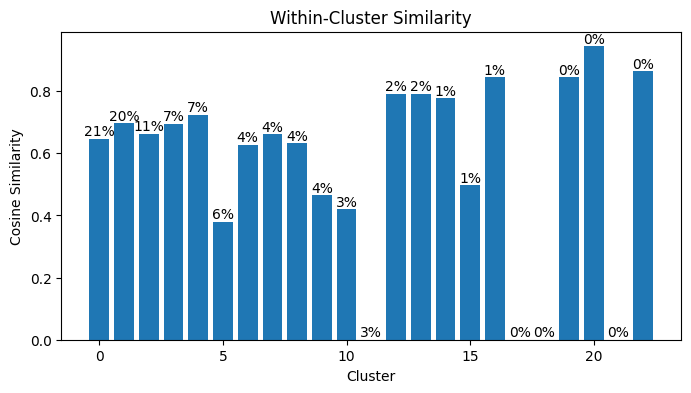

array([6.62597537e-01, 4.96966270e-01, 7.24270277e-01, 6.96537629e-01,
       8.45337249e-01, 8.64831523e-01, 6.94888865e-01, 6.34444072e-04,
       8.44891887e-01, 7.76500065e-01, 6.62247639e-01, 9.44080273e-01,
       7.91428002e-01, 0.00000000e+00, 0.00000000e+00, 7.91919413e-01,
       6.47127332e-01, 3.79862106e-01, 6.33063046e-01, 0.00000000e+00,
       4.64928626e-01, 6.27330222e-01, 4.20662195e-01])

In [ ]:
within_cluster_similarity(subtraction_signals, model_23.labels_, plot=True)

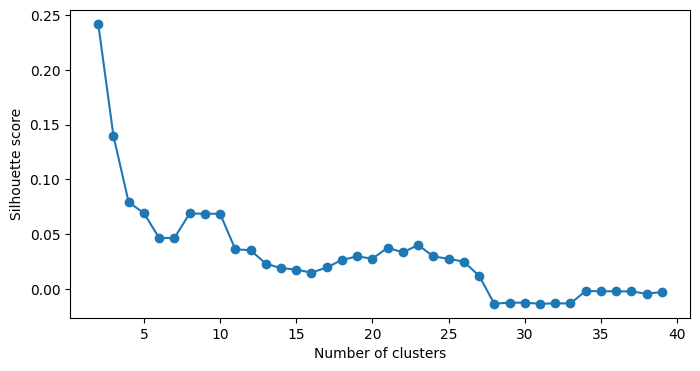

In [ ]:
plt.figure(figsize=(8, 4)); plt.plot(range(2, 40), s_score, marker="o"); plt.xlabel("Number of clusters"); plt.ylabel("Silhouette score"); plt.savefig("results/agglomerative/euclidean_silhouette_score.pdf")

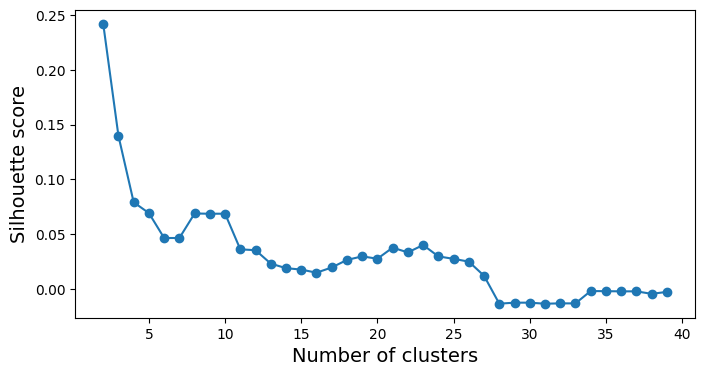

In [ ]:
plt.figure(figsize=(8, 4)); plt.plot(range(2, 40), s_score, marker="o"); plt.xlabel("Number of clusters", fontsize=14); plt.ylabel("Silhouette score", fontsize=14); plt.savefig("results/agglomerative/euclidean_silhouette_score.pdf")

In [ ]:
np.unique(model_10.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1796,   15,  103,  427,  552,  363,    1, 1054,   10,    1]))

In [ ]:
mask = (model_10.labels_ == 9) + (model_10.labels_ == 6)

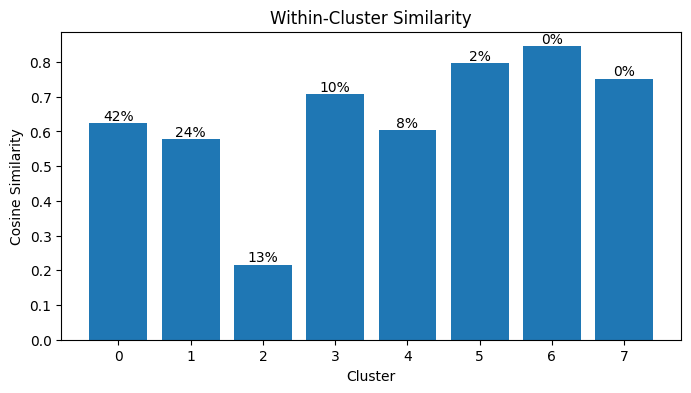

In [ ]:
wcs_10 = within_cluster_similarity(subtraction_signals[~mask], model_10.labels_[~mask], plot=True)

In [ ]:
labels, size = np.unique(model_10.labels_, return_counts=True)

In [ ]:
np.average(wcs_10, weights=size[True, True, True, True, True, True, False, True, True, False])

TypeError: Axis must be specified when shapes of a and weights differ.

In [ ]:
size[True, True, True, True, True, True, False, True, True, False]

array([], shape=(0, 10), dtype=int64)

In [ ]:
mask = [True, True, True, True, True, True, False, True, True, False]

In [ ]:
sizw

NameError: name 'sizw' is not defined

In [ ]:
size

array([1796,   15,  103,  427,  552,  363,    1, 1054,   10,    1])

In [ ]:
size[mask]

array([1796,   15,  103,  427,  552,  363, 1054,   10])

In [ ]:
np.average(wcs_10, weights=size[mask])

np.float64(0.5716938290877566)

In [ ]:
bcs = between_cluster_similarity(subtraction_signals[~mask], model_10.labels_[~mask], plot=True, text=True)

TypeError: bad operand type for unary ~: 'list'

In [ ]:
mask = (model_10.labels_ == 9) + (model_10.labels_ == 6)

<Figure size 2400x2400 with 0 Axes>

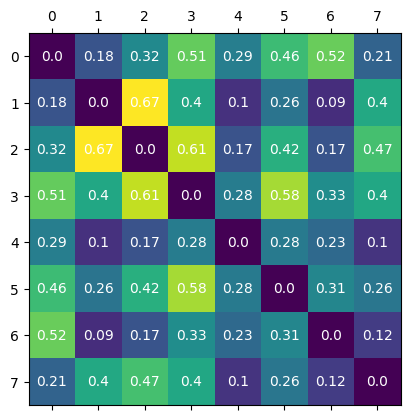

In [ ]:
bcs = between_cluster_similarity(subtraction_signals[~mask], model_10.labels_[~mask], plot=True, text=True)

In [ ]:
wcs_10

array([0.62307852, 0.75181505, 0.79617471, 0.70712747, 0.21605531,
       0.60411697, 0.57726354, 0.84489189])

<Figure size 6900x6900 with 0 Axes>

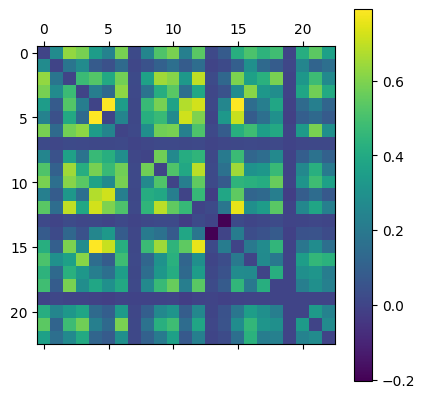

In [ ]:
bcs_23 = between_cluster_similarity(subtraction_signals, model_23.labels_, plot=True)

In [ ]:
np.unique(model_23.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 array([469,  30, 311, 844,  34,  11, 316, 124,  10,  41, 189,   3,  75,
          1,   1,  69, 891, 239, 174,   1, 189, 167, 133]))

In [ ]:
np.unique(model_10.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1796,   15,  103,  427,  552,  363,    1, 1054,   10,    1]))

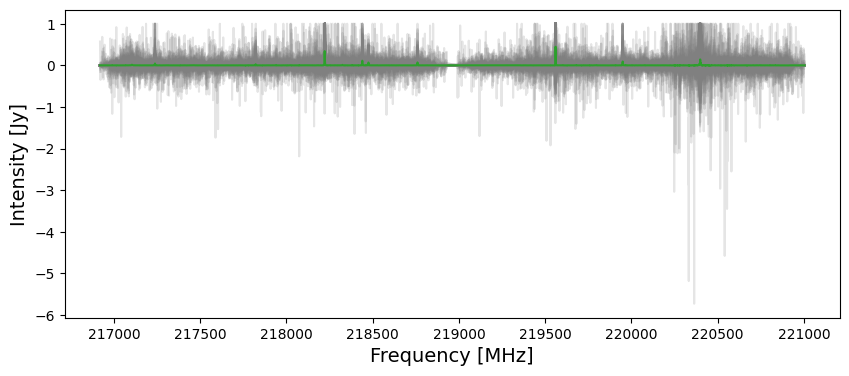

In [ ]:
plt.figure(figsize=(10, 4)); plt.plot(freq, subtraction_signals[model_10.labels_==4].T, color="grey", alpha=0.2); plt.plot(freq, subtraction_signals[model_10.labels_==4].mean(axis=0), color="tab:green"); plt.xlabel("Frequency [MHz]", fontsize=14); plt.ylabel("Intensity [Jy]", fontsize=14); plt.show()

In [ ]:
signals = subtraction_signals[model_10.labels_==4]

In [ ]:
signals[signals < -1] = -1

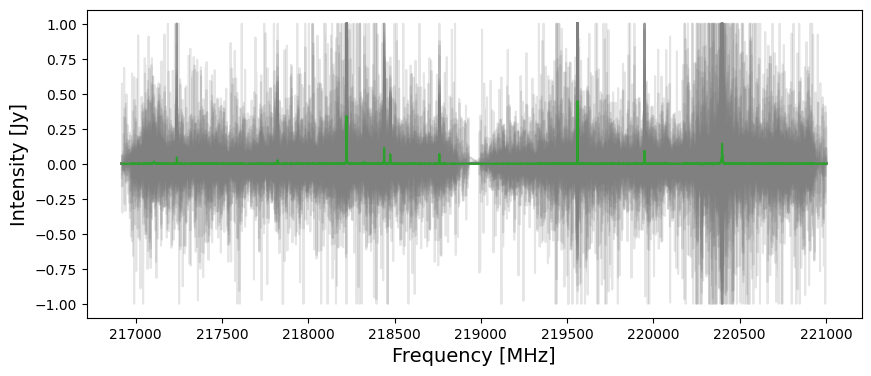

In [ ]:
plt.figure(figsize=(10, 4)); plt.plot(freq, signals.T, color="grey", alpha=0.2); plt.plot(freq, signals.mean(axis=0), color="tab:green"); plt.xlabel("Frequency [MHz]", fontsize=14); plt.ylabel("Intensity [Jy]", fontsize=14); plt.show()

In [ ]:
shifted_signals = np.load("Data/Processed/shifted_signals.npy")

In [ ]:
shifted_residual = np.load("Data/Processed/shifted_residual.npy")

In [ ]:
snr = 10 * np.log10(np.mean(shifted_signals**2, axis=1) / np.mean(shifted_residual**2, axis=1))

(array([ 24., 427.,  49.,  23.,  15.,   8.,   1.,   3.,   0.,   2.]),
 array([-1.04724788,  0.04029458,  1.12783705,  2.21537951,  3.30292198,
         4.39046444,  5.47800691,  6.56554937,  7.65309184,  8.7406343 ,
         9.82817677]),
 <BarContainer object of 10 artists>)

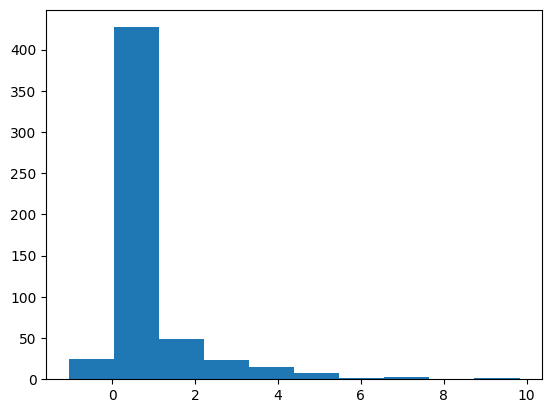

In [ ]:
plt.hist(snr[model_10.labels_==4])

In [ ]:
sum(snr < 0)

np.int64(3)

In [ ]:
np.sort(snr[model_10.labels_==4])

array([-1.04724788,  0.01716725,  0.02068676,  0.02315795,  0.02433276,
        0.02438809,  0.02546444,  0.02668949,  0.0282373 ,  0.02898339,
        0.02975274,  0.03020303,  0.03228686,  0.03297366,  0.03508776,
        0.03518908,  0.03550212,  0.03574786,  0.03675129,  0.03733842,
        0.03743852,  0.03745005,  0.03862596,  0.03998975,  0.04057801,
        0.04207845,  0.04293646,  0.04330082,  0.04428011,  0.04692455,
        0.04883689,  0.04905952,  0.04925234,  0.0495256 ,  0.05155094,
        0.05221396,  0.0530645 ,  0.05311346,  0.05313057,  0.05439322,
        0.05481764,  0.0552514 ,  0.05660562,  0.05681723,  0.05834236,
        0.0589276 ,  0.06031113,  0.06045213,  0.0648188 ,  0.06510668,
        0.06717268,  0.07054289,  0.0708516 ,  0.07102027,  0.07184361,
        0.07246208,  0.07252391,  0.07405095,  0.07651878,  0.07801789,
        0.07812904,  0.07827395,  0.07831667,  0.0785779 ,  0.078674  ,
        0.08068031,  0.08079117,  0.08208508,  0.08221174,  0.08

(array([437.,  58.,  25.,  10.,  14.,   2.,   1.,   2.,   0.,   2.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

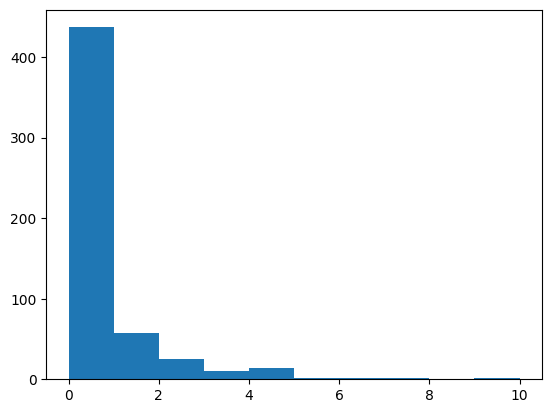

In [ ]:
plt.hist(snr[model_10.labels_==4], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

(array([437.,  58.,  25.,  10.,  14.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

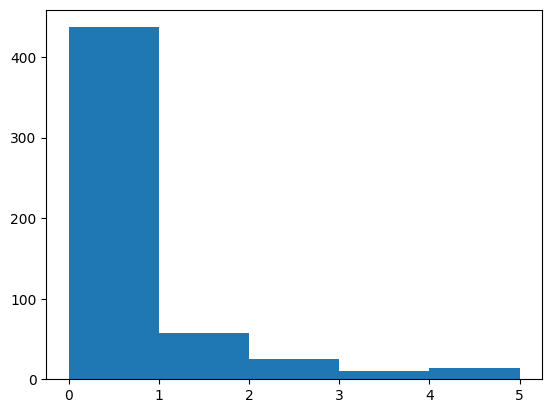

In [ ]:
plt.hist(snr[model_10.labels_==4], bins=[0, 1, 2, 3, 4, 5])

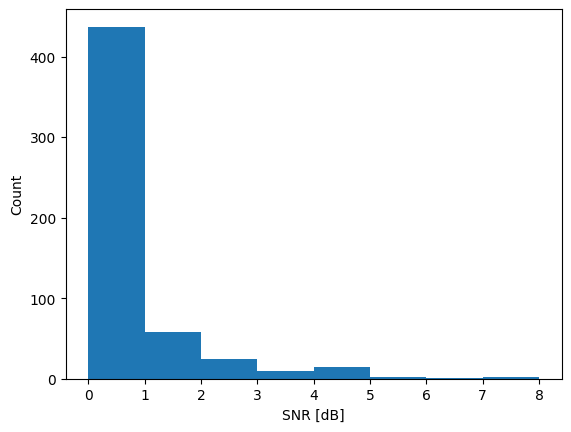

In [ ]:
plt.hist(snr[model_10.labels_==4], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8]); plt.xlabel("SNR [dB]"); plt.ylabel("Count"); plt.savefig("results/agglomerative/snr_clsuter4_euclidean_10clusters.pdf")

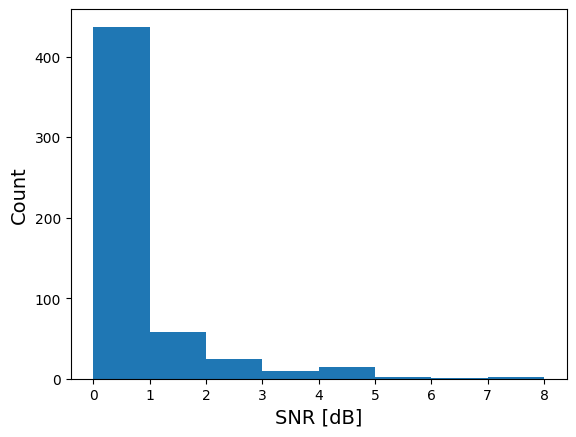

In [ ]:
plt.hist(snr[model_10.labels_==4], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8]); plt.xlabel("SNR [dB]", fontsize=14); plt.ylabel("Count", fontsize=14); plt.savefig("results/agglomerative/snr_clsuter4_euclidean_10clusters.pdf")

In [ ]:
from seaborn import kdeplot    

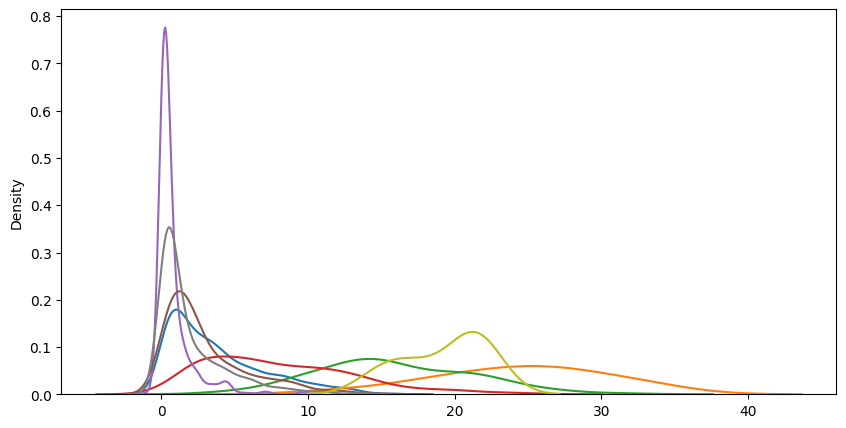

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, label in enumerate(np.unique(model_10.labels_)):
    if sum(model_10.labels_ == label) > 1:
        kdeplot(snr[model_10.labels_ == label], ax=ax, color=colors_10[i])

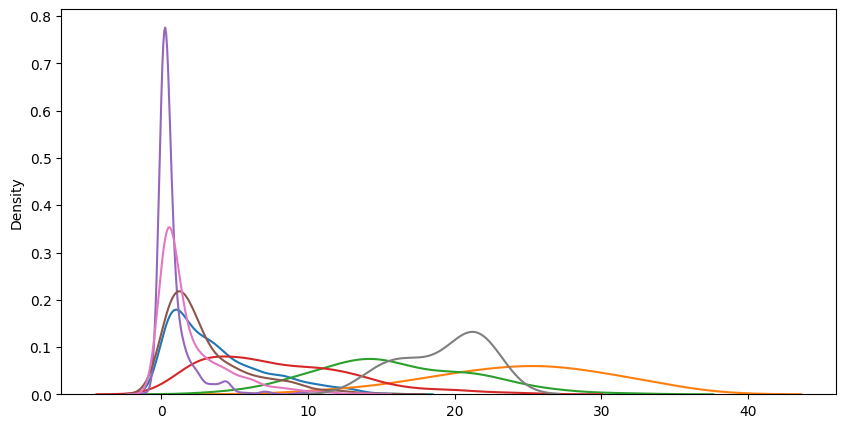

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
n = 0
for label in np.unique(model_10.labels_):
    if sum(model_10.labels_ == label) > 1:
        kdeplot(snr[model_10.labels_ == label], ax=ax, color=colors_10[n])
        n += 1

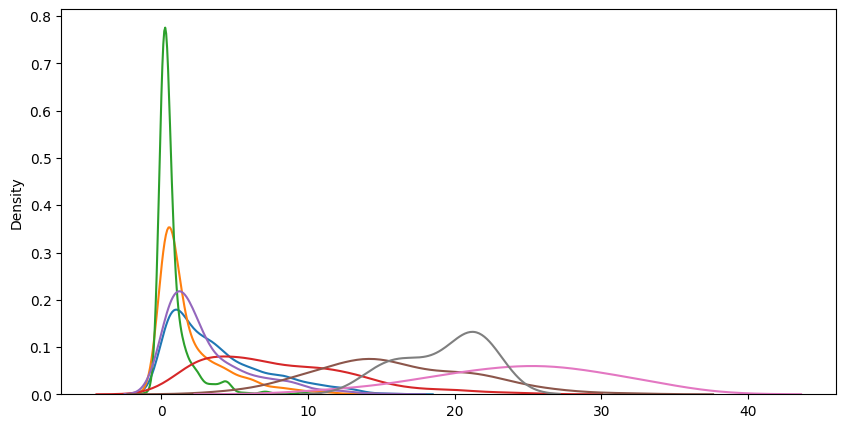

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
n = 0
unique_labels, sizes = np.unique(model_10.labels_, return_counts=True)
for label in unique_labels[np.argsort(sizes)[::-1]][:-2]:
    kdeplot(snr[model_10.labels_ == label], ax=ax, color=colors_10[n])
    n += 1

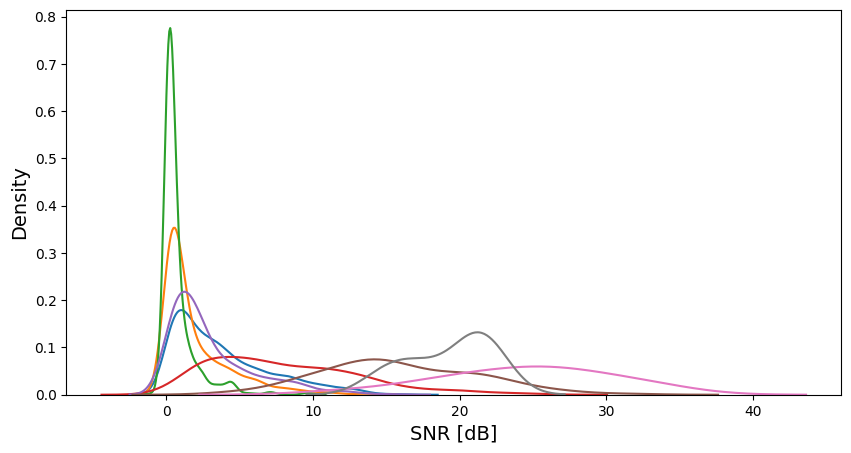

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
n = 0
unique_labels, sizes = np.unique(model_10.labels_, return_counts=True)
for label in unique_labels[np.argsort(sizes)[::-1]][:-2]:
    kdeplot(snr[model_10.labels_ == label], ax=ax, color=colors_10[n])
    n += 1
plt.xlabel("SNR [dB]", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.savefig("results/agglomerative/snr_distribution_euclidean_10clusters.pdf")

In [ ]:
snr4 = snr[model_10.labels_== 4]

In [ ]:
sorted_signals = signals[np.sort(snr)]

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
sorted_signals = signals[np.argsort(snr4)]

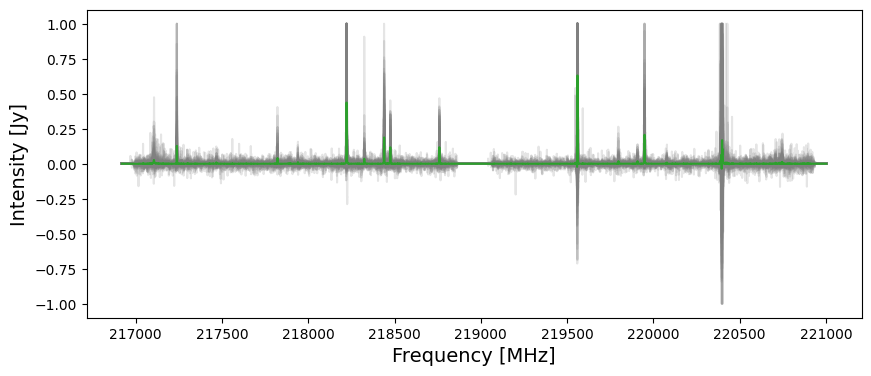

In [ ]:
plt.figure(figsize=(10, 4)); plt.plot(freq, signals[snr4 >= 1].T, color="grey", alpha=0.2); plt.plot(freq, signals[snr4 >= 1].mean(axis=0), color="tab:green"); plt.xlabel("Frequency [MHz]", fontsize=14); plt.ylabel("Intensity [Jy]", fontsize=14); plt.show()

In [ ]:
snr_labels = np.array(snr4 >= 1, dtype=int)

In [ ]:
np.unique(snr_labels)

array([0, 1])

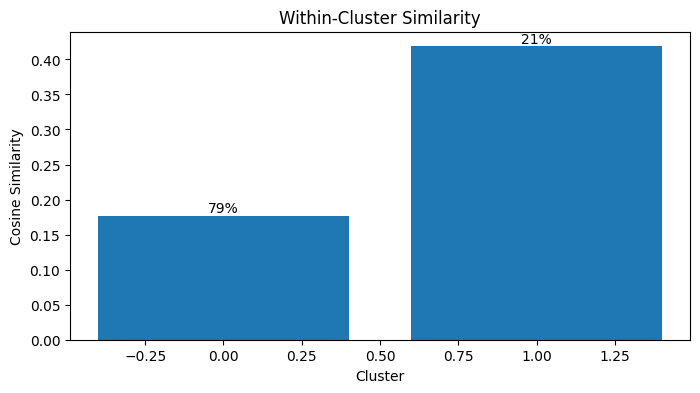

array([0.17686109, 0.41859066])

In [ ]:
within_cluster_similarity(signals, snr_labels, plot=True)

In [ ]:
np.average([0.17686109, 0.41859066], weights=[79, 21])

np.float64(0.2276242997)

In [ ]:
sum(snr >= 1) / len(snr)

np.float64(0.6522443313280889)

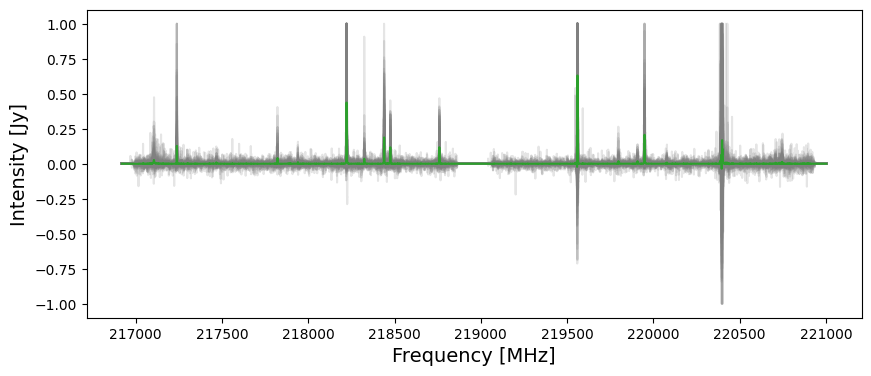

In [ ]:
plt.figure(figsize=(10, 4)); plt.plot(freq, signals[snr4 >= 1].T, color="grey", alpha=0.2); plt.plot(freq, signals[snr4 >= 1].mean(axis=0), color="tab:green"); plt.xlabel("Frequency [MHz]", fontsize=14); plt.ylabel("Intensity [Jy]", fontsize=14); plt.savefig("results/agglomerative/high_snr_cluster4_euclidean_10clusters.pdf")

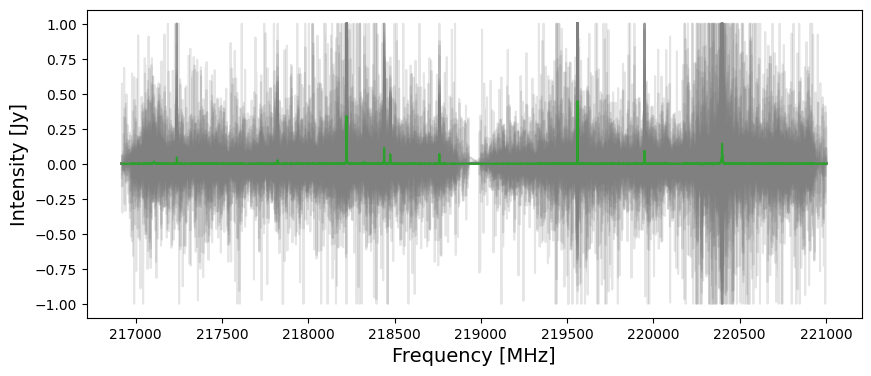

In [ ]:
plt.figure(figsize=(10, 4)); plt.plot(freq, signals.T, color="grey", alpha=0.2); plt.plot(freq, signals.mean(axis=0), color="tab:green"); plt.xlabel("Frequency [MHz]", fontsize=14); plt.ylabel("Intensity [Jy]", fontsize=14); plt.savefig("results/agglomerative/cluster4_euclidean_10clusters.pdf")

In [ ]:
sum(snr4 >= 1) / len(snr4)

np.float64(0.20652173913043478)

In [ ]:
sum(snr4 >= 1)

np.int64(114)

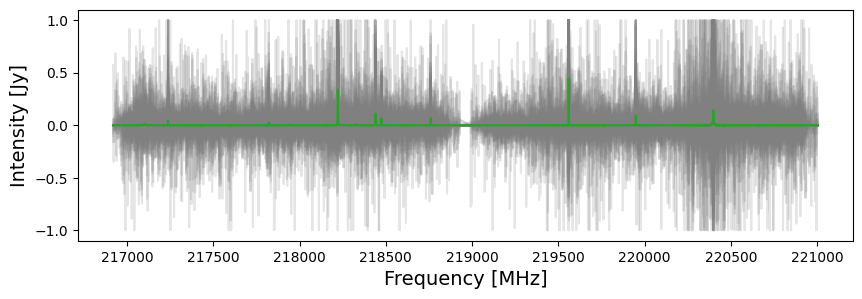

In [ ]:
plt.figure(figsize=(10, 3)); plt.plot(freq, signals.T, color="grey", alpha=0.2); plt.plot(freq, signals.mean(axis=0), color="tab:green"); plt.xlabel("Frequency [MHz]", fontsize=14); plt.ylabel("Intensity [Jy]", fontsize=14); plt.savefig("results/agglomerative/cluster4_euclidean_10clusters.pdf")

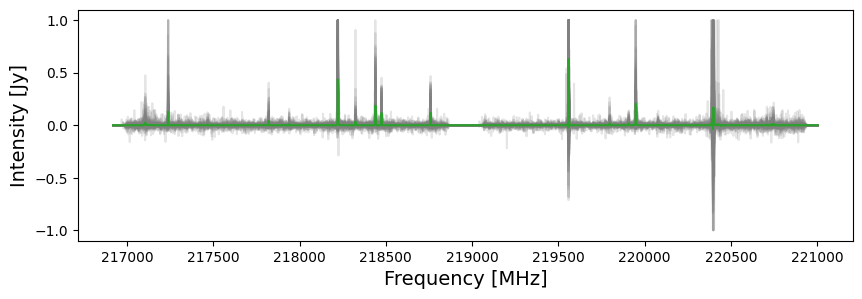

In [ ]:
plt.figure(figsize=(10, 3)); plt.plot(freq, signals[snr4 >= 1].T, color="grey", alpha=0.2); plt.plot(freq, signals[snr4 >= 1].mean(axis=0), color="tab:green"); plt.xlabel("Frequency [MHz]", fontsize=14); plt.ylabel("Intensity [Jy]", fontsize=14); plt.savefig("results/agglomerative/high_snr_cluster4_euclidean_10clusters.pdf")

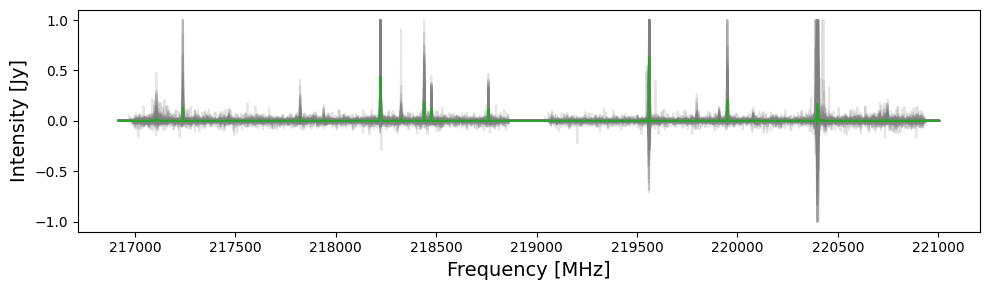

In [ ]:
plt.figure(figsize=(10, 3)); plt.plot(freq, signals[snr4 >= 1].T, color="grey", alpha=0.2); plt.plot(freq, signals[snr4 >= 1].mean(axis=0), color="tab:green"); plt.xlabel("Frequency [MHz]", fontsize=14); plt.ylabel("Intensity [Jy]", fontsize=14); plt.tight_layout(); plt.savefig("results/agglomerative/high_snr_cluster4_euclidean_10clusters.pdf")

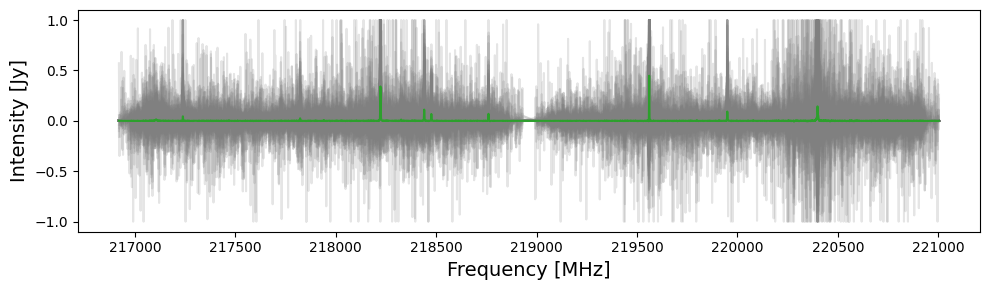

In [ ]:
plt.figure(figsize=(10, 3)); plt.plot(freq, signals.T, color="grey", alpha=0.2); plt.plot(freq, signals.mean(axis=0), color="tab:green"); plt.xlabel("Frequency [MHz]", fontsize=14); plt.ylabel("Intensity [Jy]", fontsize=14); plt.tight_layout(); plt.savefig("results/agglomerative/cluster4_euclidean_10clusters.pdf")

In [ ]:
mask = np.ones(len(subtraction_signals), dtype=bool)

In [ ]:
mask[(model_10.labels_ == 4) * (snr < 1)] = False

In [ ]:
np.unique(model_10.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1796,   15,  103,  427,  552,  363,    1, 1054,   10,    1]))

In [ ]:
mask[(model_10.labels_ == 6) + (model_10.labels_ == 9)] = False

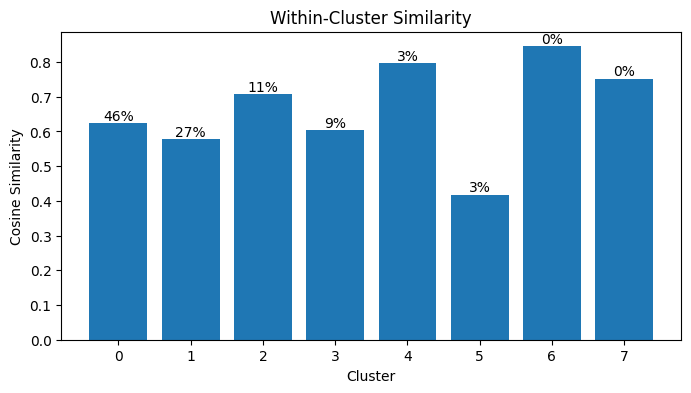

In [ ]:
new_wcs = within_cluster_similarity(subtraction_signals[mask], model_10.labels_[mask], plot=True)

In [ ]:
np.average(new_wcs, weights=np.unique(model_10.labels_[mask], return_counts=True)[1])

np.float64(0.6177307439958414)

In [ ]:
np.unique(model_10.labels_[mask], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 7, 8]),
 array([1796,   15,  103,  427,  114,  363, 1054,   10]))

In [ ]:
new_wcs[2]

np.float64(0.7961747070938959)

In [ ]:
new_wcs

array([0.62307852, 0.75181505, 0.79617471, 0.70712747, 0.4173328 ,
       0.60411697, 0.57726354, 0.84489189])

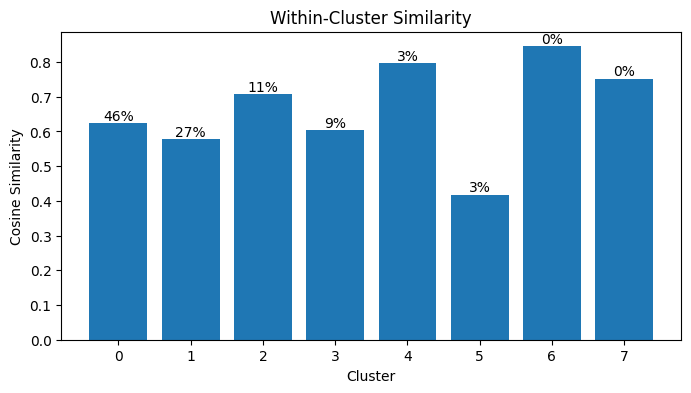

array([0.62307852, 0.75181505, 0.79617471, 0.70712747, 0.4173328 ,
       0.60411697, 0.57726354, 0.84489189])

In [ ]:
within_cluster_similarity(subtraction_signals[mask], model_10.labels_[mask], plot=True)

In [ ]:
np.unique(model_10.labels_[mask], return_counts=True)

(array([0, 1, 2, 3, 4, 5, 7, 8]),
 array([1796,   15,  103,  427,  114,  363, 1054,   10]))

In [ ]:
def within_cluster_similarity(data: np.ndarray, labels: list,
                              std: bool = False,
                              plot: bool = False,
                              title: str = None) -> np.ndarray:
    """
    Evaluate the within-cluster similarity of the data
    :param data: 2D numpy array containing the data for each signal
    :param labels: list containing the cluster labels_ for each signal
    :param batch_size: size of the batches that will be compared within each cluster
    :param std: boolean to calculate or not the standard deviation of the within-cluster similarity
    :param plot: boolean to plot the within-cluster similarity of each cluster in a bar plot
    :param title: string with the title of the plot
    :return: array containing the within-cluster similarity for each signal. If the cluster only contains one signal,
    the value is set to np.nan
    """
    from sklearn.metrics.pairwise import cosine_similarity
    import matplotlib.pyplot as plt
    
    if len(data) != len(labels):
        raise ValueError('Data and labels_ must have the same length')

    # Obtain unique labels and counts
    within_cluster_similarity = np.array([])
    within_cluster_std = np.array([])
    clusters, sizes = np.unique(labels, return_counts=True)

    # Loop over all different clusters
    for i, cluster in enumerate(clusters):
        # Append a similarity of 0 and continue if the cluster has only one element
        if sizes[i] == 1:
            within_cluster_similarity = np.append(within_cluster_similarity, 0)
            within_cluster_std = np.append(within_cluster_std, 0)
            continue

        # Initiate internal evaluation loop
        cluster_data = data[labels == cluster]
        cluster_similarity = cosine_similarity(cluster_data, cluster_data)
        cluster_similarity = cluster_similarity[~np.eye(cluster_similarity.shape[0], dtype=bool)].reshape(cluster_similarity.shape[0],-1)

        # Append the average similarity and its std for the cluster
        within_cluster_similarity = np.append(within_cluster_similarity, np.mean(cluster_similarity))
        within_cluster_std = np.append(within_cluster_std, np.std(cluster_similarity))


    if plot:
        # Calculate cluster size
        total_signals = len(labels)
        percentages = [round((np.sum(labels == cluster) / total_signals) * 100) for cluster in clusters]
        
        # Sort labels by size
        sorted_wcs = within_cluster_similarity[np.argsort(sizes)[::-1]]
        sorted_percentages = percentages[np.argsort(sizes)[::-1]]
        
        # Plot the within-cluster similarity
        width = 0.8
        plt.figure(figsize=(8, 4))
        if std:
            plt.bar(np.arange(len(clusters)), sorted_wcs, width, yerr=within_cluster_std,
                    color='tab:blue')
        else:
            plt.bar(np.arange(len(clusters)), sorted_wcs, width, color='tab:blue')
        plt.xlabel('Cluster')
        plt.ylabel('Cosine Similarity')
        plt.title('Within-Cluster Similarity') if title is None else plt.title(title)

        # Add percentage of signals that belong to each cluster
        for i, percentage in enumerate(sorted_percentages):
            if not std:
                plt.text(i, sorted_wcs[i], f'{percentage}%', ha='center', va='bottom')
            else:
                plt.text(i - width / 4, sorted_wcs[i], f'{percentage}%', ha='center', va='bottom')

        plt.show()

    if std:
        return within_cluster_similarity, within_cluster_std

    return within_cluster_similarity

In [ ]:
within_cluster_similarity(subtraction_signals[mask], model_10.labels_[mask], plot=True)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
def within_cluster_similarity(data: np.ndarray, labels: list,
                              std: bool = False,
                              plot: bool = False,
                              title: str = None) -> np.ndarray:
    """
    Evaluate the within-cluster similarity of the data
    :param data: 2D numpy array containing the data for each signal
    :param labels: list containing the cluster labels_ for each signal
    :param batch_size: size of the batches that will be compared within each cluster
    :param std: boolean to calculate or not the standard deviation of the within-cluster similarity
    :param plot: boolean to plot the within-cluster similarity of each cluster in a bar plot
    :param title: string with the title of the plot
    :return: array containing the within-cluster similarity for each signal. If the cluster only contains one signal,
    the value is set to np.nan
    """
    from sklearn.metrics.pairwise import cosine_similarity
    import matplotlib.pyplot as plt
    
    if len(data) != len(labels):
        raise ValueError('Data and labels_ must have the same length')

    # Obtain unique labels and counts
    within_cluster_similarity = np.array([])
    within_cluster_std = np.array([])
    clusters, sizes = np.unique(labels, return_counts=True)

    # Loop over all different clusters
    for i, cluster in enumerate(clusters):
        # Append a similarity of 0 and continue if the cluster has only one element
        if sizes[i] == 1:
            within_cluster_similarity = np.append(within_cluster_similarity, 0)
            within_cluster_std = np.append(within_cluster_std, 0)
            continue

        # Initiate internal evaluation loop
        cluster_data = data[labels == cluster]
        cluster_similarity = cosine_similarity(cluster_data, cluster_data)
        cluster_similarity = cluster_similarity[~np.eye(cluster_similarity.shape[0], dtype=bool)].reshape(cluster_similarity.shape[0],-1)

        # Append the average similarity and its std for the cluster
        within_cluster_similarity = np.append(within_cluster_similarity, np.mean(cluster_similarity))
        within_cluster_std = np.append(within_cluster_std, np.std(cluster_similarity))


    if plot:
        # Calculate cluster size
        total_signals = len(labels)
        percentages = np.array([round((np.sum(labels == cluster) / total_signals) * 100) for cluster in clusters])
        
        # Sort labels by size
        sorted_wcs = within_cluster_similarity[np.argsort(sizes)[::-1]]
        sorted_percentages = percentages[np.argsort(sizes)[::-1]]
        
        # Plot the within-cluster similarity
        width = 0.8
        plt.figure(figsize=(8, 4))
        if std:
            plt.bar(np.arange(len(clusters)), sorted_wcs, width, yerr=within_cluster_std,
                    color='tab:blue')
        else:
            plt.bar(np.arange(len(clusters)), sorted_wcs, width, color='tab:blue')
        plt.xlabel('Cluster')
        plt.ylabel('Cosine Similarity')
        plt.title('Within-Cluster Similarity') if title is None else plt.title(title)

        # Add percentage of signals that belong to each cluster
        for i, percentage in enumerate(sorted_percentages):
            if not std:
                plt.text(i, sorted_wcs[i], f'{percentage}%', ha='center', va='bottom')
            else:
                plt.text(i - width / 4, sorted_wcs[i], f'{percentage}%', ha='center', va='bottom')

        plt.show()

    if std:
        return within_cluster_similarity, within_cluster_std

    return within_cluster_similarity

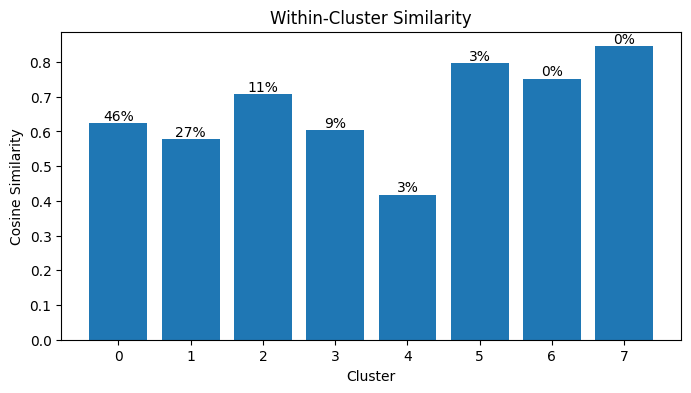

array([0.62307852, 0.75181505, 0.79617471, 0.70712747, 0.4173328 ,
       0.60411697, 0.57726354, 0.84489189])

In [ ]:
within_cluster_similarity(subtraction_signals[mask], model_10.labels_[mask], plot=True)

<Figure size 2400x2400 with 0 Axes>

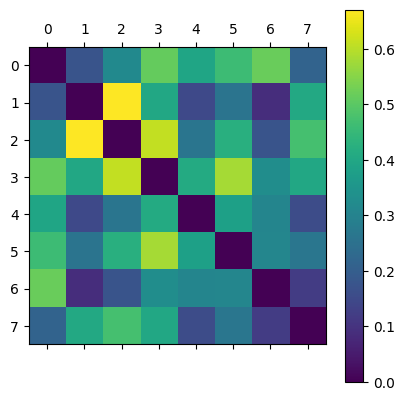

array([[0.        , 0.17517515, 0.31852636, 0.51269294, 0.39379692,
        0.45899903, 0.51669422, 0.21332953],
       [0.17517515, 0.        , 0.67143091, 0.4016138 , 0.14884525,
        0.25761733, 0.0872557 , 0.40430335],
       [0.31852636, 0.67143091, 0.        , 0.60933814, 0.26048055,
        0.42317709, 0.17484406, 0.47239025],
       [0.51269294, 0.4016138 , 0.60933814, 0.        , 0.40941528,
        0.58135877, 0.32851495, 0.40142167],
       [0.39379692, 0.14884525, 0.26048055, 0.40941528, 0.        ,
        0.38095194, 0.30685925, 0.15686996],
       [0.45899903, 0.25761733, 0.42317709, 0.58135877, 0.38095194,
        0.        , 0.3078157 , 0.26379119],
       [0.51669422, 0.0872557 , 0.17484406, 0.32851495, 0.30685925,
        0.3078157 , 0.        , 0.11996879],
       [0.21332953, 0.40430335, 0.47239025, 0.40142167, 0.15686996,
        0.26379119, 0.11996879, 0.        ]])

In [ ]:
between_cluster_similarity(subtraction_signals[mask], model_10.labels_[mask], plot=True)

<Figure size 2400x2400 with 0 Axes>

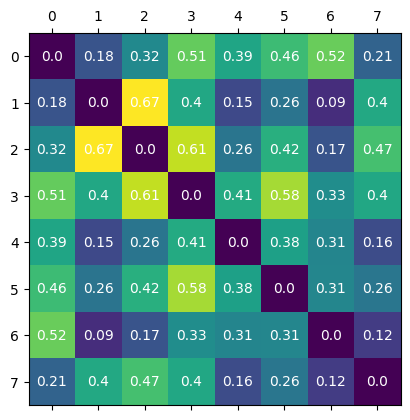

array([[0.        , 0.17517515, 0.31852636, 0.51269294, 0.39379692,
        0.45899903, 0.51669422, 0.21332953],
       [0.17517515, 0.        , 0.67143091, 0.4016138 , 0.14884525,
        0.25761733, 0.0872557 , 0.40430335],
       [0.31852636, 0.67143091, 0.        , 0.60933814, 0.26048055,
        0.42317709, 0.17484406, 0.47239025],
       [0.51269294, 0.4016138 , 0.60933814, 0.        , 0.40941528,
        0.58135877, 0.32851495, 0.40142167],
       [0.39379692, 0.14884525, 0.26048055, 0.40941528, 0.        ,
        0.38095194, 0.30685925, 0.15686996],
       [0.45899903, 0.25761733, 0.42317709, 0.58135877, 0.38095194,
        0.        , 0.3078157 , 0.26379119],
       [0.51669422, 0.0872557 , 0.17484406, 0.32851495, 0.30685925,
        0.3078157 , 0.        , 0.11996879],
       [0.21332953, 0.40430335, 0.47239025, 0.40142167, 0.15686996,
        0.26379119, 0.11996879, 0.        ]])

In [ ]:
between_cluster_similarity(subtraction_signals[mask], model_10.labels_[mask], plot=True, text=True)

In [ ]:
def between_cluster_similarity(signals, labels, plot=False, text=False):
    """

    Args:
        signals (_type_): _description_
        labels (_type_): _description_
        plot (bool, optional): _description_. Defaults to False.
    """
    from sklearn.metrics.pairwise import cosine_similarity
    unique_labels, sizes = np.unique(labels, return_counts=True)
    sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
    bcs = np.zeros((len(unique_labels), len(unique_labels)))
    for i, label_i in enumerate(sorted_labels):
        for j, label_j in enumerate(sorted_labels):
            if i == j:
                continue
            signals_i = signals[labels == label_i]
            signals_j = signals[labels == label_j]
            bcs[i, j] = np.mean(cosine_similarity(signals_i, signals_j))

    if plot:
        plt.figure(figsize=(3*len(bcs), 3*len(bcs)))
        plt.matshow(bcs)
        if text:
            for i in range(len(bcs)):
                for j in range(len(bcs)):
                    plt.text(i, j, np.round(bcs[i, j], 2), ha="center", va="center", color="white")
        else:
            plt.colorbar()
        plt.show()
    return bcs

<Figure size 2400x2400 with 0 Axes>

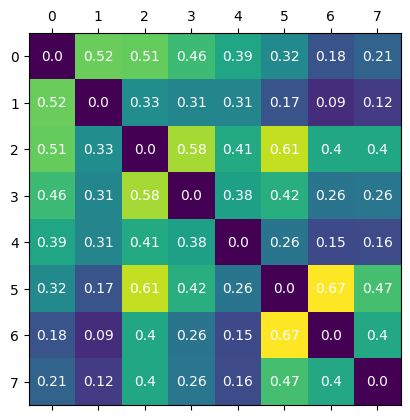

array([[0.        , 0.51669422, 0.51269294, 0.45899903, 0.39379692,
        0.31852636, 0.17517515, 0.21332953],
       [0.51669422, 0.        , 0.32851495, 0.3078157 , 0.30685925,
        0.17484406, 0.0872557 , 0.11996879],
       [0.51269294, 0.32851495, 0.        , 0.58135877, 0.40941528,
        0.60933814, 0.4016138 , 0.40142167],
       [0.45899903, 0.3078157 , 0.58135877, 0.        , 0.38095194,
        0.42317709, 0.25761733, 0.26379119],
       [0.39379692, 0.30685925, 0.40941528, 0.38095194, 0.        ,
        0.26048055, 0.14884525, 0.15686996],
       [0.31852636, 0.17484406, 0.60933814, 0.42317709, 0.26048055,
        0.        , 0.67143091, 0.47239025],
       [0.17517515, 0.0872557 , 0.4016138 , 0.25761733, 0.14884525,
        0.67143091, 0.        , 0.40430335],
       [0.21332953, 0.11996879, 0.40142167, 0.26379119, 0.15686996,
        0.47239025, 0.40430335, 0.        ]])

In [ ]:
between_cluster_similarity(subtraction_signals[mask], model_10.labels_[mask], plot=True, text=True)

<Figure size 3000x3000 with 0 Axes>

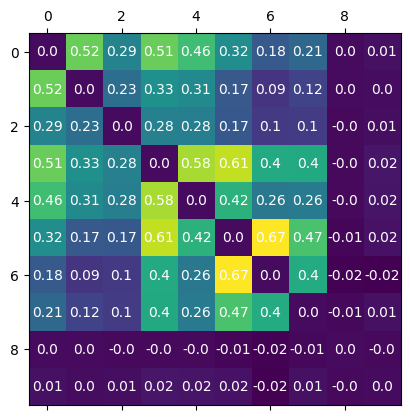

array([[ 0.00000000e+00,  5.16694223e-01,  2.88393456e-01,
         5.12692944e-01,  4.58999030e-01,  3.18526356e-01,
         1.75175147e-01,  2.13329531e-01,  5.95637308e-05,
         1.17656147e-02],
       [ 5.16694223e-01,  0.00000000e+00,  2.30718825e-01,
         3.28514955e-01,  3.07815698e-01,  1.74844062e-01,
         8.72557025e-02,  1.19968792e-01,  4.12945023e-04,
         4.27582785e-03],
       [ 2.88393456e-01,  2.30718825e-01,  0.00000000e+00,
         2.82316739e-01,  2.75089715e-01,  1.71854402e-01,
         9.68702007e-02,  1.00190537e-01, -1.52557457e-03,
         6.25397570e-03],
       [ 5.12692944e-01,  3.28514955e-01,  2.82316739e-01,
         0.00000000e+00,  5.81358772e-01,  6.09338143e-01,
         4.01613797e-01,  4.01421671e-01, -1.95184279e-03,
         2.32490375e-02],
       [ 4.58999030e-01,  3.07815698e-01,  2.75089715e-01,
         5.81358772e-01,  0.00000000e+00,  4.23177087e-01,
         2.57617325e-01,  2.63791193e-01, -1.00022479e-03,
         2.

In [ ]:
between_cluster_similarity(subtraction_signals, model_10.labels_, plot=True, text=True)

<Figure size 2400x2400 with 0 Axes>

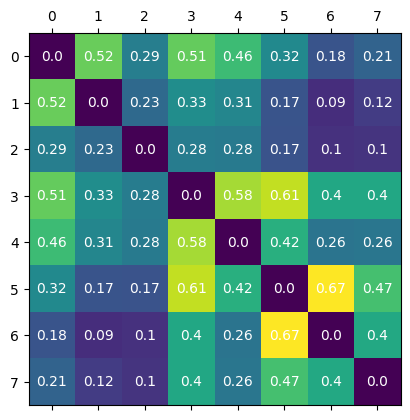

array([[0.        , 0.51669422, 0.28839346, 0.51269294, 0.45899903,
        0.31852636, 0.17517515, 0.21332953],
       [0.51669422, 0.        , 0.23071882, 0.32851495, 0.3078157 ,
        0.17484406, 0.0872557 , 0.11996879],
       [0.28839346, 0.23071882, 0.        , 0.28231674, 0.27508971,
        0.1718544 , 0.0968702 , 0.10019054],
       [0.51269294, 0.32851495, 0.28231674, 0.        , 0.58135877,
        0.60933814, 0.4016138 , 0.40142167],
       [0.45899903, 0.3078157 , 0.27508971, 0.58135877, 0.        ,
        0.42317709, 0.25761733, 0.26379119],
       [0.31852636, 0.17484406, 0.1718544 , 0.60933814, 0.42317709,
        0.        , 0.67143091, 0.47239025],
       [0.17517515, 0.0872557 , 0.0968702 , 0.4016138 , 0.25761733,
        0.67143091, 0.        , 0.40430335],
       [0.21332953, 0.11996879, 0.10019054, 0.40142167, 0.26379119,
        0.47239025, 0.40430335, 0.        ]])

In [ ]:
between_cluster_similarity(subtraction_signals[(model_10.labels_ != 6) * (model_10.labels_ != 9)], model_10.labels_[(model_10.labels_ != 6) * (model_10.labels_ != 9)], plot=True, text=True)

In [ ]:
sum(mask)/len(mask)

np.float64(0.8981952799629801)

IndexError: list index out of range

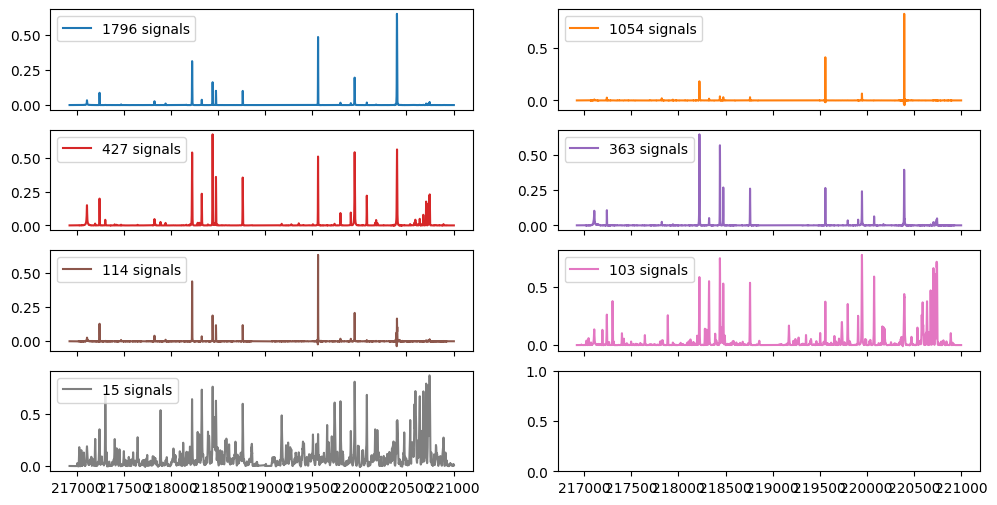

In [ ]:
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(12, 6))
ax = axes.flatten()
colors = ["tab:blue", "tab:orange", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray"]
unique_labels, sizes = np.unique(model_10.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, subtraction_signals[mask][model_10.labels_[mask]==label].mean(axis=0), color=colors[i], label=f'{sum(model_10.labels_[mask]==label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/high_snr_centroids_euclidean_10clusters.pdf')
plt.show()

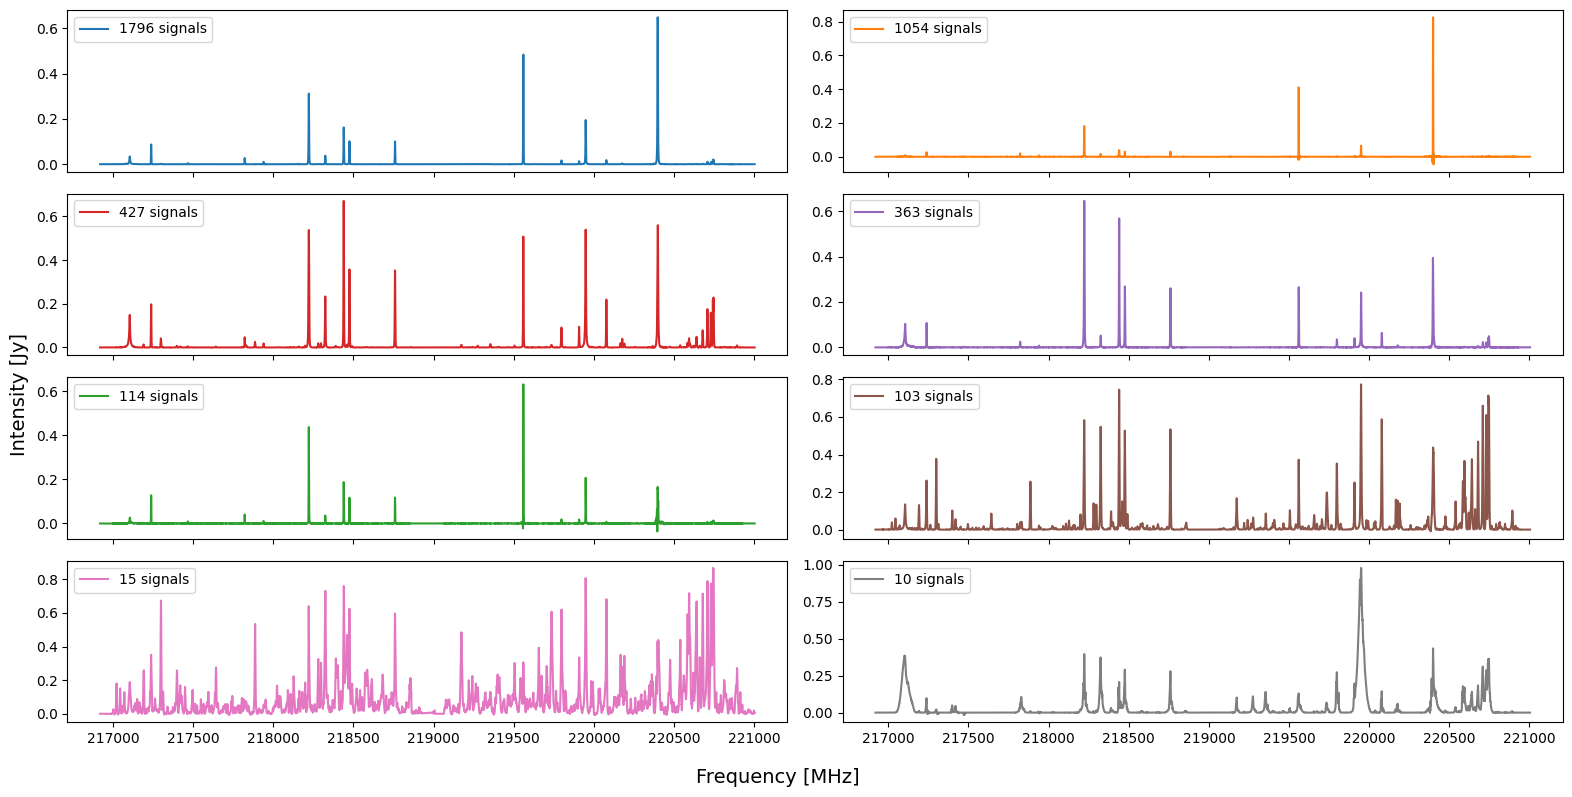

In [ ]:
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(16, 8))
ax = axes.flatten()
colors = ["tab:blue", "tab:orange", "tab:red", "tab:purple",  "tab:green","tab:brown", "tab:pink", "tab:gray"]
unique_labels, sizes = np.unique(model_10.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, subtraction_signals[mask][model_10.labels_[mask]==label].mean(axis=0), color=colors[i], label=f'{sum(model_10.labels_[mask]==label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/high_snr_centroids_euclidean_10clusters.pdf')
plt.show()

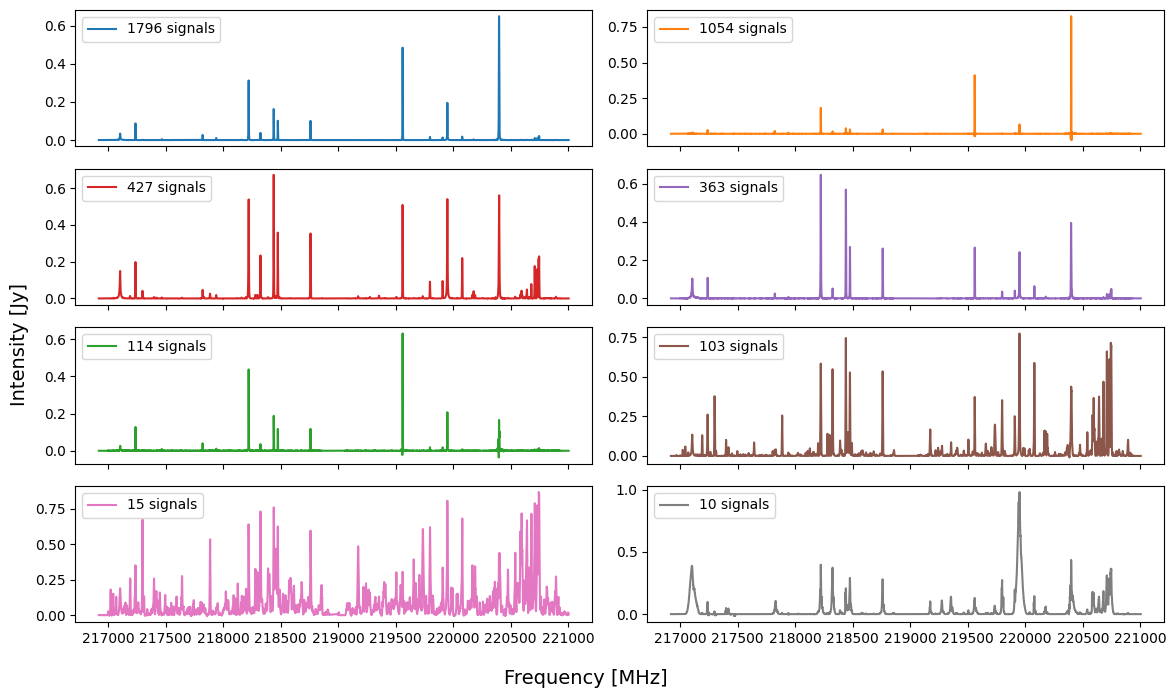

In [ ]:
fig, axes = plt.subplots(4, 2, sharex=True, figsize=(12, 7))
ax = axes.flatten()
colors = ["tab:blue", "tab:orange", "tab:red", "tab:purple",  "tab:green","tab:brown", "tab:pink", "tab:gray"]
unique_labels, sizes = np.unique(model_10.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, subtraction_signals[mask][model_10.labels_[mask]==label].mean(axis=0), color=colors[i], label=f'{sum(model_10.labels_[mask]==label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/high_snr_centroids_euclidean_10clusters.pdf')
plt.show()

In [ ]:
np.unique(model_23.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 array([469,  30, 311, 844,  34,  11, 316, 124,  10,  41, 189,   3,  75,
          1,   1,  69, 891, 239, 174,   1, 189, 167, 133]))

In [ ]:
mask = (model_23.labels_ != 19) * (model_23.labels_ != 13) * (model_23.labels_ != 14)

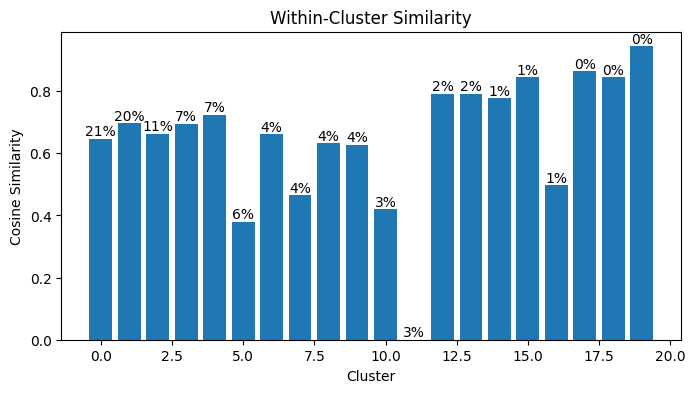

In [ ]:
wcs_23 = within_cluster_similarity(subtraction_signals[mask], model_23.labels_[mask], plot=True)

In [ ]:
sizes = np.sort(np.unique(model_23.labels_, return_counts=True)[1])[::-1]

In [ ]:
np.average(wcs_23, weights=sizes)

TypeError: Axis must be specified when shapes of a and weights differ.

In [ ]:
wcs_23.shape

(20,)

In [ ]:
sizes.shape

(23,)

In [ ]:
sizes = np.sort(np.unique(model_23.labels_[mask], return_counts=True)[1])[::-1]

In [ ]:
np.average(wcs_23, weights=sizes)

np.float64(0.656997260305846)

In [ ]:
wcs[11]

np.float64(0.6871347331050165)

In [ ]:
wcs_23[11]

np.float64(0.9440802725257468)

In [ ]:
min(wcs_23)

np.float64(0.0006344440715971958)

<Figure size 6000x6000 with 0 Axes>

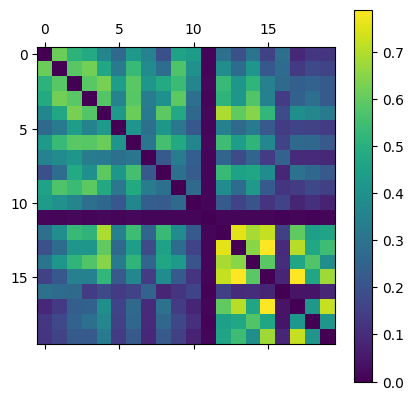

In [ ]:
bcs_23 = between_cluster_similarity(subtraction_signals[mask], model_23.labels_[mask], plot=True)

In [ ]:
max(bcs_23)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
np.max(bcs_23)

np.float64(0.7914612833325277)

Text(0, 0.5, 'Density')

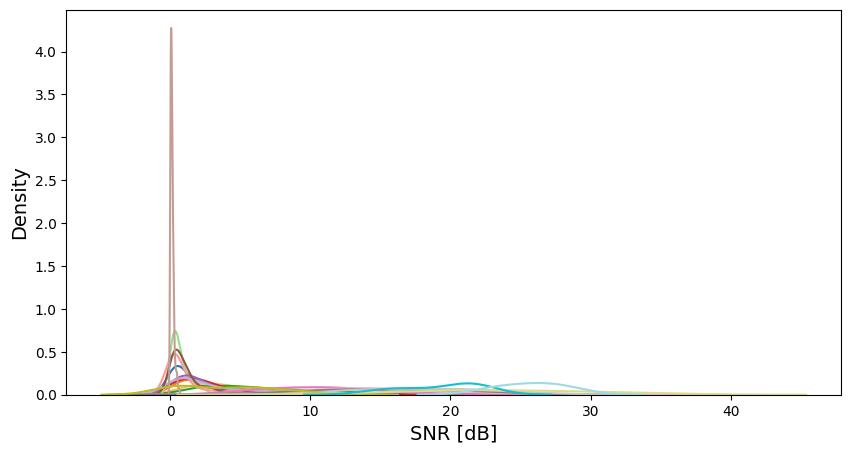

In [ ]:
unique_labels, sizes = np.unique(model_23.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors = plt.get_cmap("tab20").colors
fig, ax = plt.subplots(figsize=(10, 5))
for i, label in enumerate(sorted_labels):
    kdeplot(snr[mask][model_23.labels_[mask] == label], color=colors[i], ax=ax)
plt.xlabel("SNR [dB]", fontsize=14)
plt.ylabel("Density", fontsize=14)

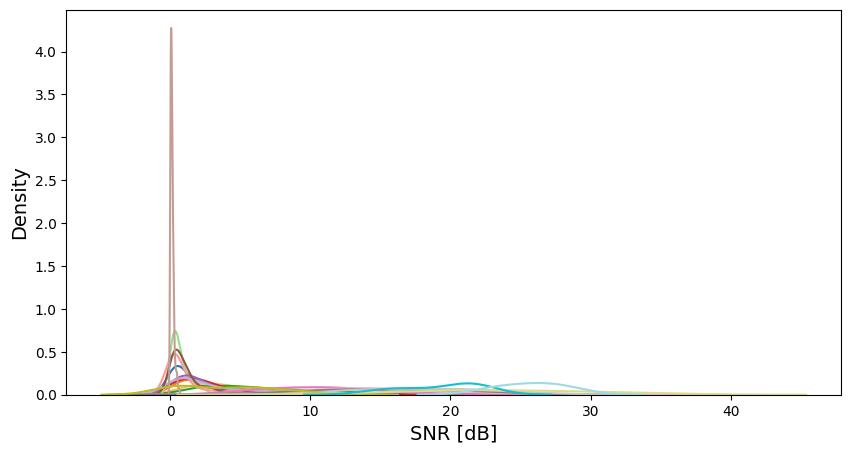

In [ ]:
unique_labels, sizes = np.unique(model_23.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors = plt.get_cmap("tab20").colors
fig, ax = plt.subplots(figsize=(10, 5))
for i, label in enumerate(sorted_labels):
    kdeplot(snr[mask][model_23.labels_[mask] == label], color=colors[i], ax=ax)
plt.xlabel("SNR [dB]", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.savefig("results/agglomerative/snr_euclidean_23clusters.pdf")

In [ ]:
np.unique(model_23.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 array([469,  30, 311, 844,  34,  11, 316, 124,  10,  41, 189,   3,  75,
          1,   1,  69, 891, 239, 174,   1, 189, 167, 133]))

In [ ]:
np.max(snr[model_23.labels_ == 7])

np.float64(0.6288860930205541)

In [ ]:
mask *= (model_23.labels_ != 7)

Text(0, 0.5, 'Density')

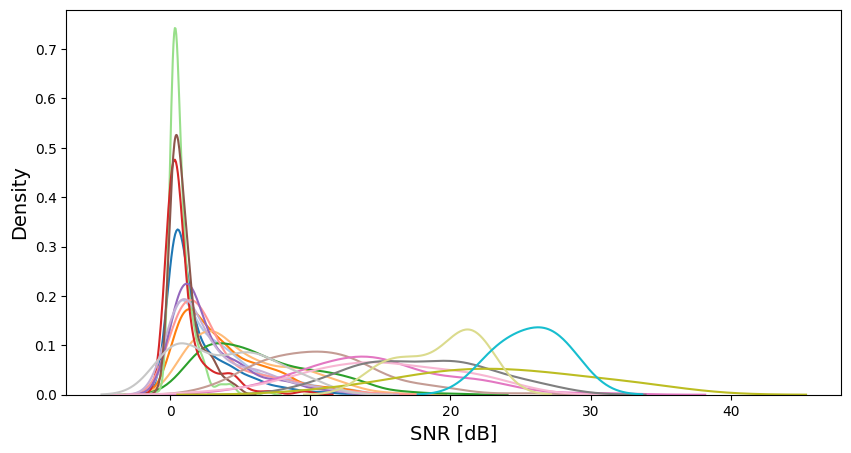

In [ ]:
unique_labels, sizes = np.unique(model_23.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors = plt.get_cmap("tab20").colors
fig, ax = plt.subplots(figsize=(10, 5))
for i, label in enumerate(sorted_labels):
    kdeplot(snr[mask][model_23.labels_[mask] == label], color=colors[i], ax=ax)
plt.xlabel("SNR [dB]", fontsize=14)
plt.ylabel("Density", fontsize=14)

In [ ]:
mask[model_23.labels_ != 7] = True

<ipython-input-330-a10b7fafc13f>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(snr[mask][model_23.labels_[mask] == label], color=colors[i], ax=ax)


IndexError: tuple index out of range

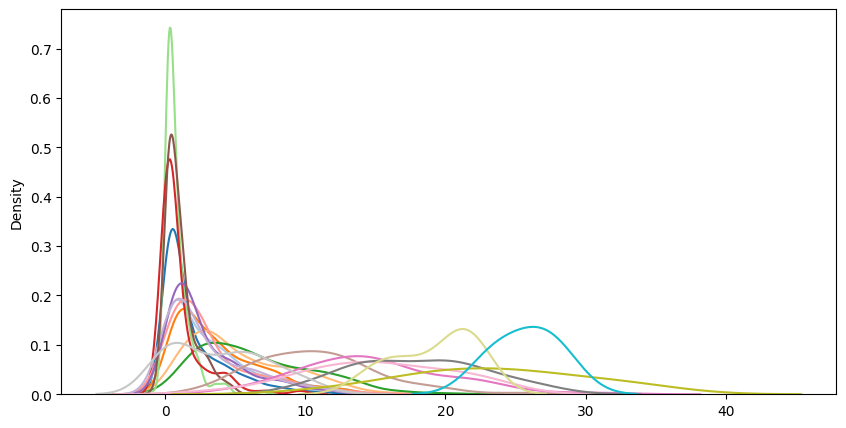

In [ ]:
unique_labels, sizes = np.unique(model_23.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors = plt.get_cmap("tab20").colors
fig, ax = plt.subplots(figsize=(10, 5))
for i, label in enumerate(sorted_labels):
    if label == 7:
        continue
    kdeplot(snr[mask][model_23.labels_[mask] == label], color=colors[i], ax=ax)
plt.xlabel("SNR [dB]", fontsize=14)
plt.ylabel("Density", fontsize=14)

<ipython-input-331-f359fbc2bc78>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(snr[mask][model_23.labels_[mask] == label], color=colors[i], ax=ax)


Text(0, 0.5, 'Density')

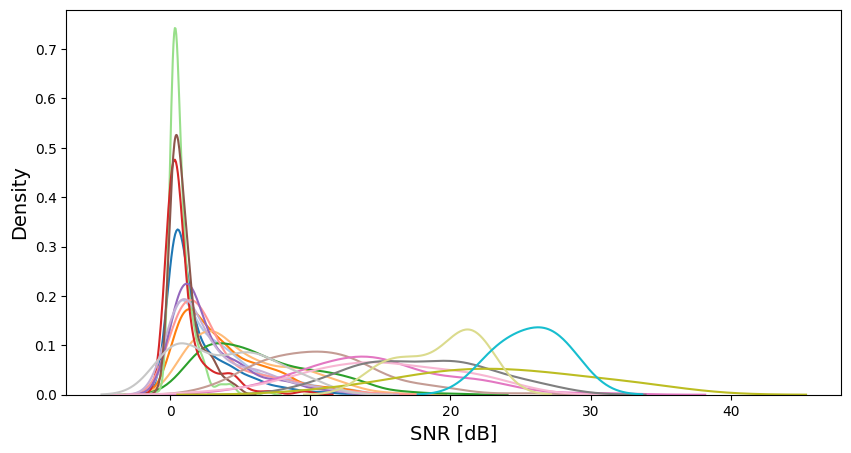

In [ ]:
unique_labels, sizes = np.unique(model_23.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors = plt.get_cmap("tab20").colors
fig, ax = plt.subplots(figsize=(10, 5))
for i, label in enumerate(sorted_labels):
    if label != 7 and i < 20:
        kdeplot(snr[mask][model_23.labels_[mask] == label], color=colors[i], ax=ax)
plt.xlabel("SNR [dB]", fontsize=14)
plt.ylabel("Density", fontsize=14)

<ipython-input-332-6996d02852ff>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(snr[mask][model_23.labels_[mask] == label], color=colors[i], ax=ax)


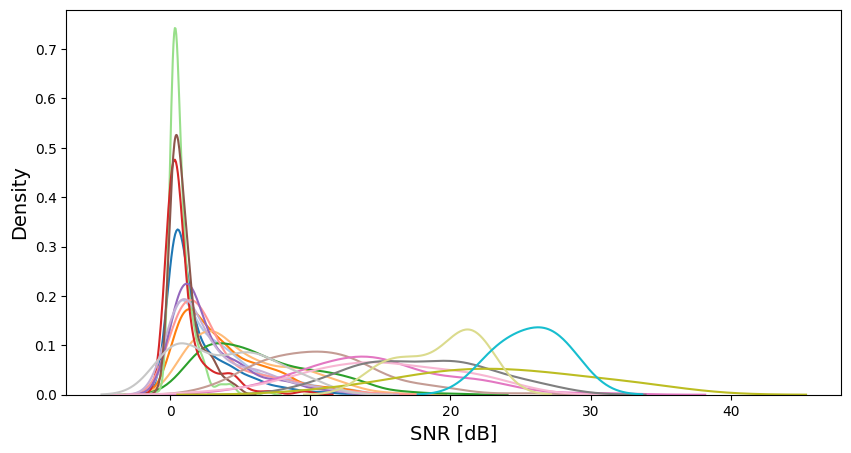

In [ ]:
unique_labels, sizes = np.unique(model_23.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
colors = plt.get_cmap("tab20").colors
fig, ax = plt.subplots(figsize=(10, 5))
for i, label in enumerate(sorted_labels):
    if label != 7 and i < 20:
        kdeplot(snr[mask][model_23.labels_[mask] == label], color=colors[i], ax=ax)
plt.xlabel("SNR [dB]", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.savefig("results/agglomerative/snr_euclidean_23clusters.pdf")

In [ ]:
np.unique(model_23.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 array([469,  30, 311, 844,  34,  11, 316, 124,  10,  41, 189,   3,  75,
          1,   1,  69, 891, 239, 174,   1, 189, 167, 133]))

In [ ]:
mask17 = model_23.labels_ == 17

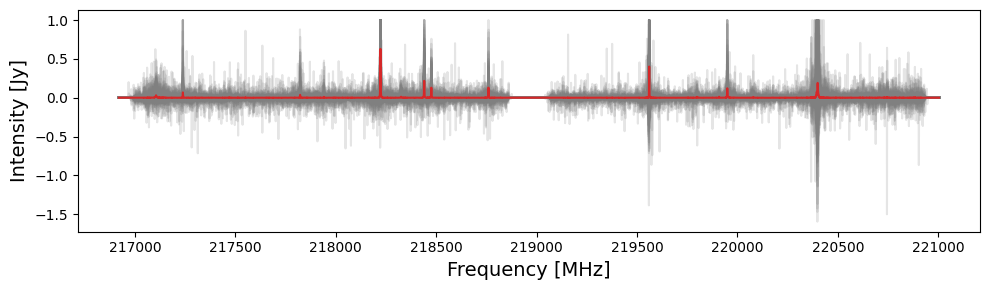

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask17].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask17].mean(axis=0), color=colors[6])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()
plt.savefig("results/agglomerative/euclidean_23clusters_cluster5_analysis.pdf")



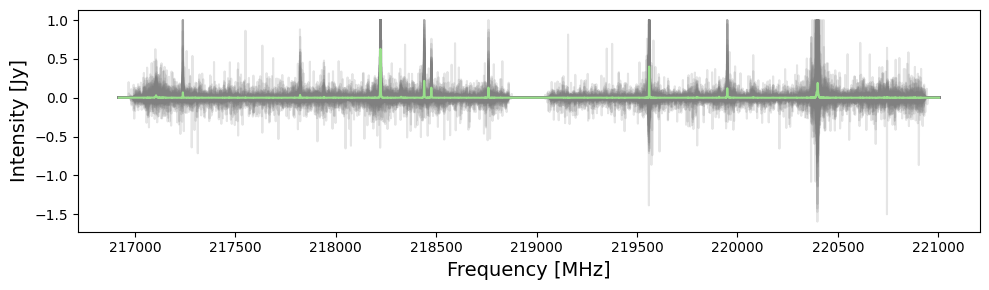

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask17].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask17].mean(axis=0), color=colors[5])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()
plt.savefig("results/agglomerative/euclidean_23clusters_cluster5_analysis.pdf")

(array([  1., 130.,  63.,  24.,  12.,   4.,   4.,   0.,   0.,   1.]),
 array([-1.04724788, -0.24797468,  0.55129852,  1.35057173,  2.14984493,
         2.94911813,  3.74839134,  4.54766454,  5.34693774,  6.14621095,
         6.94548415]),
 <BarContainer object of 10 artists>)

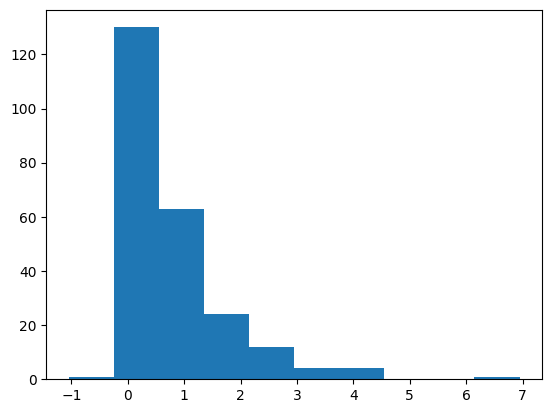

In [ ]:
plt.hist(snr[mask17])

(array([175.,  41.,  13.,   4.,   4.,   0.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

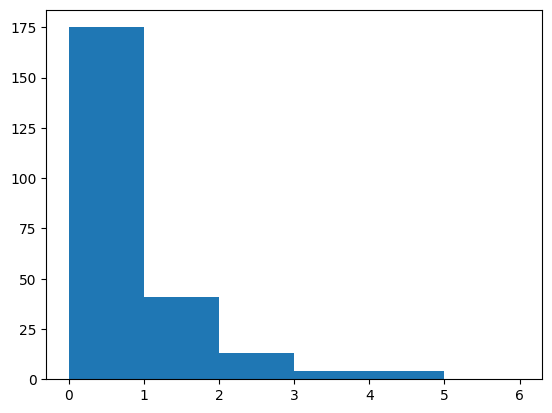

In [ ]:
plt.hist(snr[mask17], bins=[0, 1, 2, 3, 4, 5, 6])

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask17][snr[mask17 > 1]].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask17][snr[mask17 > 1]].mean(axis=0), color=colors[5])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()

IndexError: arrays used as indices must be of integer (or boolean) type

<Figure size 1000x300 with 0 Axes>

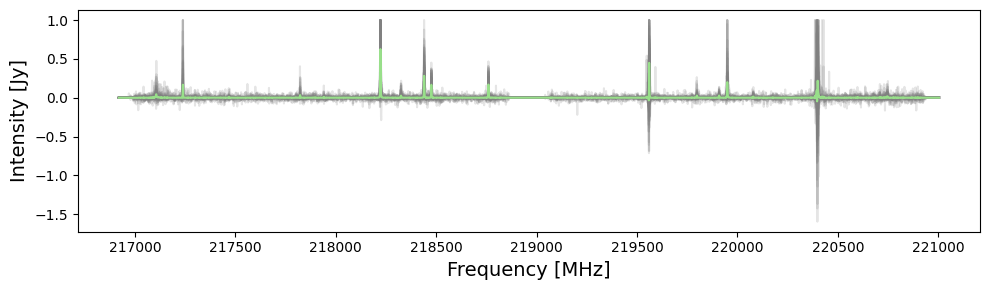

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask17][snr[mask17] > 1].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask17][snr[mask17] > 1].mean(axis=0), color=colors[5])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()

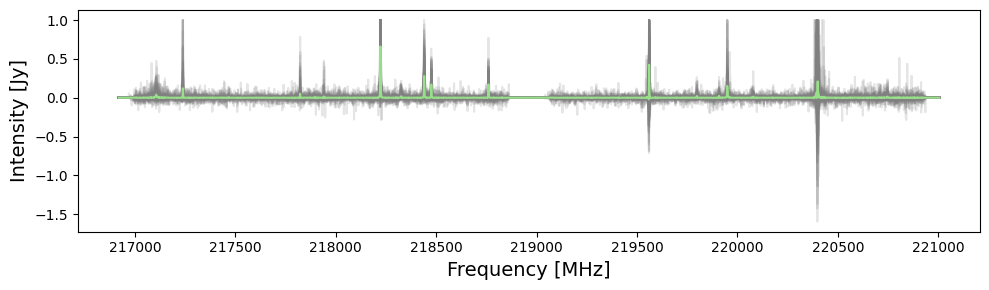

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask17][snr[mask17] > 0.5].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask17][snr[mask17] > 0.5].mean(axis=0), color=colors[5])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()

In [ ]:
sum(snr[mask17] > 1)

np.int64(63)

In [ ]:
len(snr[mask17])

239

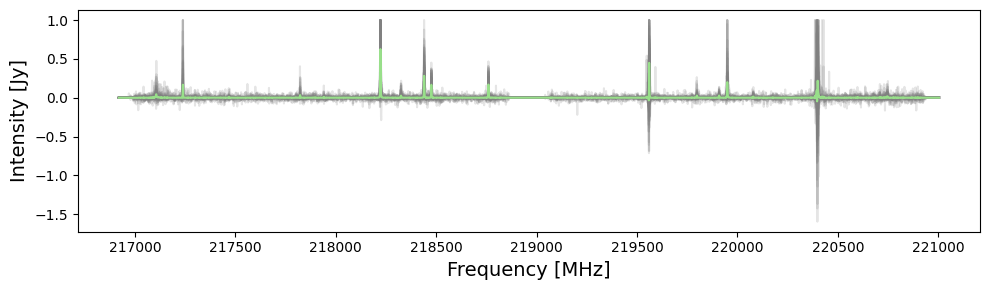

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask17][snr[mask17] > 1].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask17][snr[mask17] > 1].mean(axis=0), color=colors[5])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()
plt.savefig("results/agglomerative/euclidean_23clusters_cluster5_high_snr_analysis.pdf")

In [ ]:
np.unique(model_23.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 array([469,  30, 311, 844,  34,  11, 316, 124,  10,  41, 189,   3,  75,
          1,   1,  69, 891, 239, 174,   1, 189, 167, 133]))

In [ ]:
mask22 = model_23.labels_ == 22

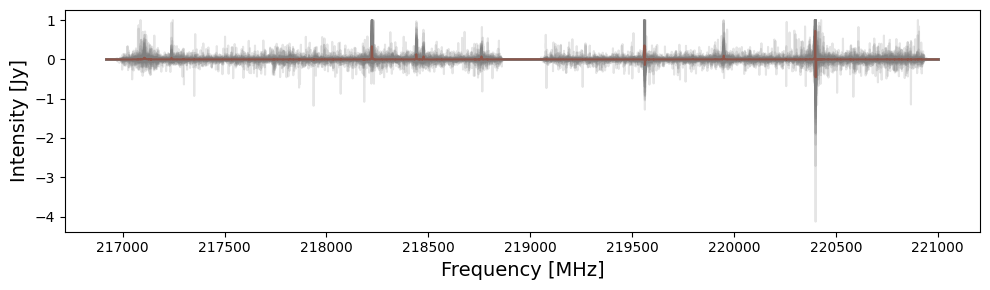

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask22].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask22].mean(axis=0), color=colors[10])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()

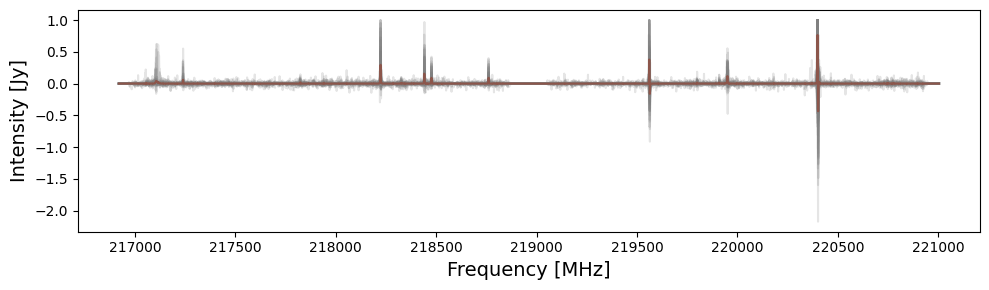

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask22][snr[mask22] >= 1].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask22][snr[mask22] >= 1].mean(axis=0), color=colors[10])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()

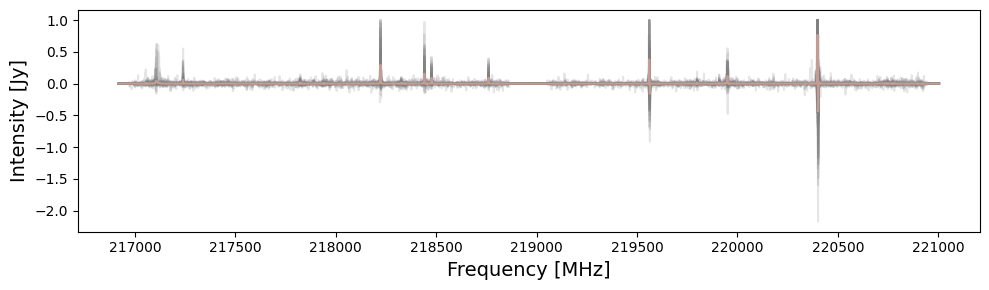

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask22][snr[mask22] >= 1].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask22][snr[mask22] >= 1].mean(axis=0), color=colors[11])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()

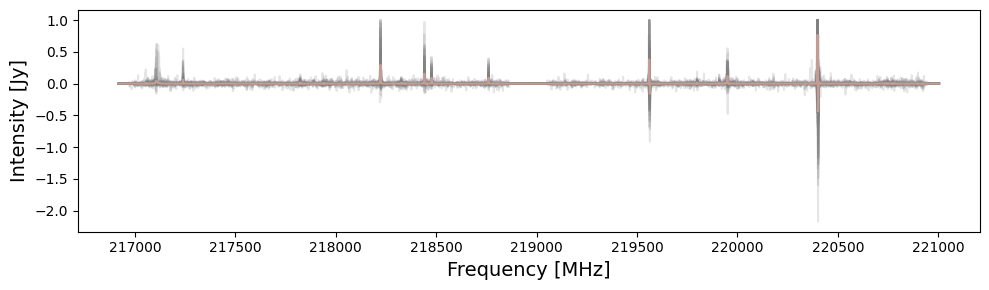

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask22][snr[mask22] >= 1].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask22][snr[mask22] >= 1].mean(axis=0), color=colors[11])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()
plt.savefig("results/agglomerative/euclidean_23clusters_cluster10_high_snr_analysis.pdf")

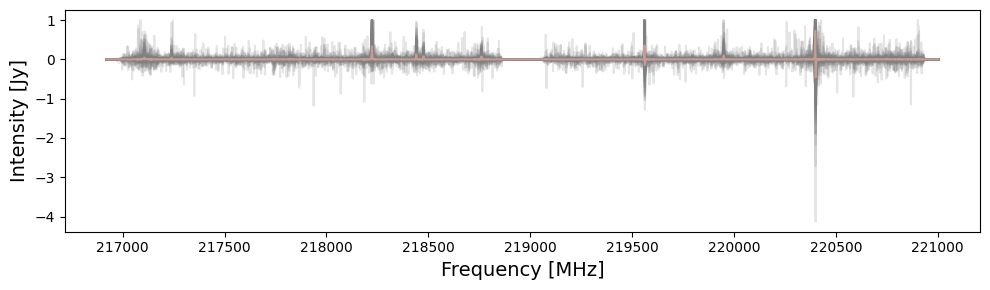

In [ ]:
plt.figure(figsize=(10, 3))
plt.plot(freq, subtraction_signals[mask22].T, color="grey", alpha=0.2)
plt.plot(freq, subtraction_signals[mask22].mean(axis=0), color=colors[11])
plt.xlabel("Frequency [MHz]", fontsize=14)
plt.ylabel("Intensity [Jy]", fontsize=14)
plt.tight_layout()
plt.savefig("results/agglomerative/euclidean_23clusters_cluster10_analysis.pdf")

In [ ]:
sum(mask22)

np.int64(133)

In [ ]:
sum(snr[mask22] > 1)

np.int64(52)

In [ ]:
np.unique(model_23.labels_[mask], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22]),
 array([469,  30, 311, 844,  34,  11, 316,  10,  41, 189,   3,  75,   1,
          1,  69, 891, 239, 174,   1, 189, 167, 133]))

In [ ]:
mask = (model_23.labels_ != 19) * (model_23.labels_ != 14) * (model_23.labels_ != 13)

In [ ]:
mask[mask17] *= snr[mask17] >= 1

In [ ]:
mask[mask22] *= snr[mask22] >= 1

In [ ]:
sum(mask)

np.int64(4062)

In [ ]:
sum(~mask)

np.int64(260)

In [ ]:
np.unique(model_23.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 array([469,  30, 311, 844,  34,  11, 316, 124,  10,  41, 189,   3,  75,
          1,   1,  69, 891, 239, 174,   1, 189, 167, 133]))

In [ ]:
mask[model_23.labels_ == 7] = False

In [ ]:
sum(~mask)

np.int64(384)

In [ ]:
124+3+176+81

384

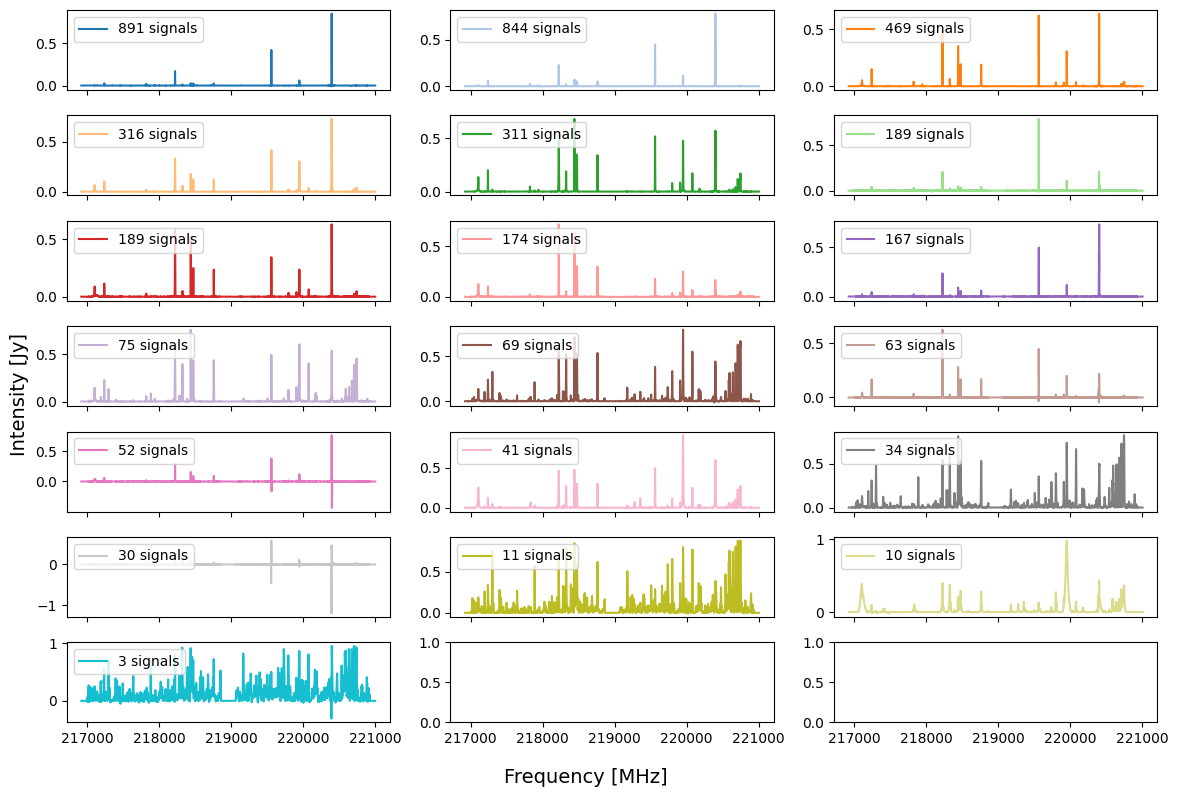

In [ ]:
fig, axes = plt.subplots(7, 3, sharex=True, figsize=(12, 8))
ax = axes.flatten()
colors = plt.get_cmap("tab20").colors
unique_labels, sizes = np.unique(model_23.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, subtraction_signals[mask][model_23.labels_[mask]==label].mean(axis=0), color=colors[i], label=f'{sum(model_23.labels_[mask]==label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/high_snr_centroids_euclidean_23clusters.pdf')
plt.show()

In [ ]:
colors = colors[[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 5, 10, 14, 15, 16, 17, 19, 20]]

TypeError: tuple indices must be integers or slices, not list

In [ ]:
colors = colors[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 5, 10, 14, 15, 16, 17, 19, 20]

TypeError: tuple indices must be integers or slices, not tuple

In [ ]:
color_arg = [0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 5, 10, 14, 15, 16, 17, 19, 20]

IndexError: tuple index out of range

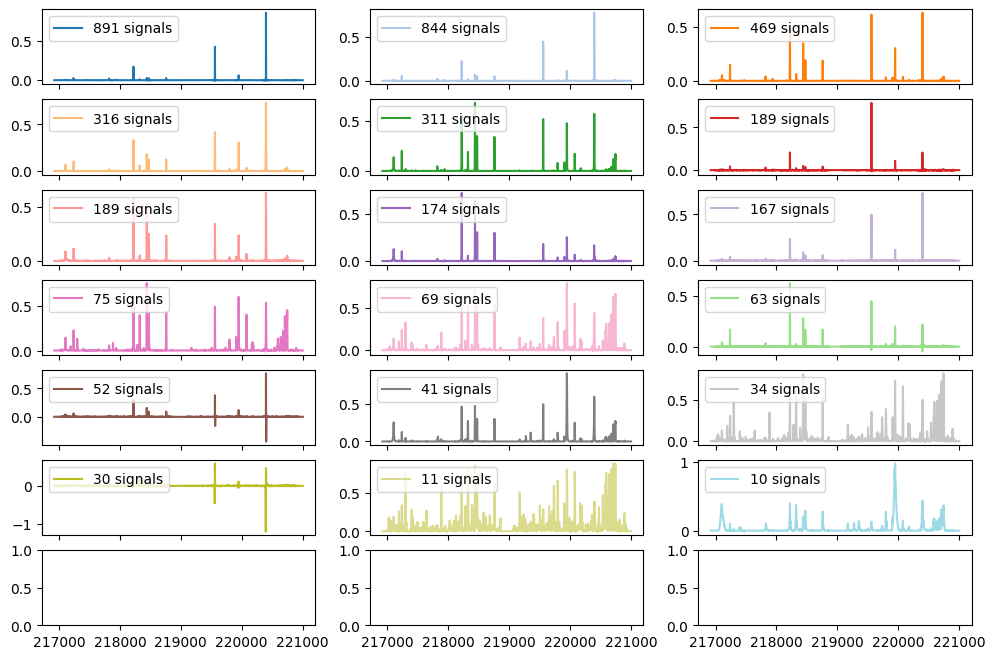

In [ ]:
fig, axes = plt.subplots(7, 3, sharex=True, figsize=(12, 8))
ax = axes.flatten()
colors = plt.get_cmap("tab20").colors
unique_labels, sizes = np.unique(model_23.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, subtraction_signals[mask][model_23.labels_[mask]==label].mean(axis=0), color=colors[color_arg[i]], label=f'{sum(model_23.labels_[mask]==label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/high_snr_centroids_euclidean_23clusters.pdf')
plt.show()

In [ ]:
color_arg = [0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 5, 10, 14, 15, 16, 17, 18, 19, 20]

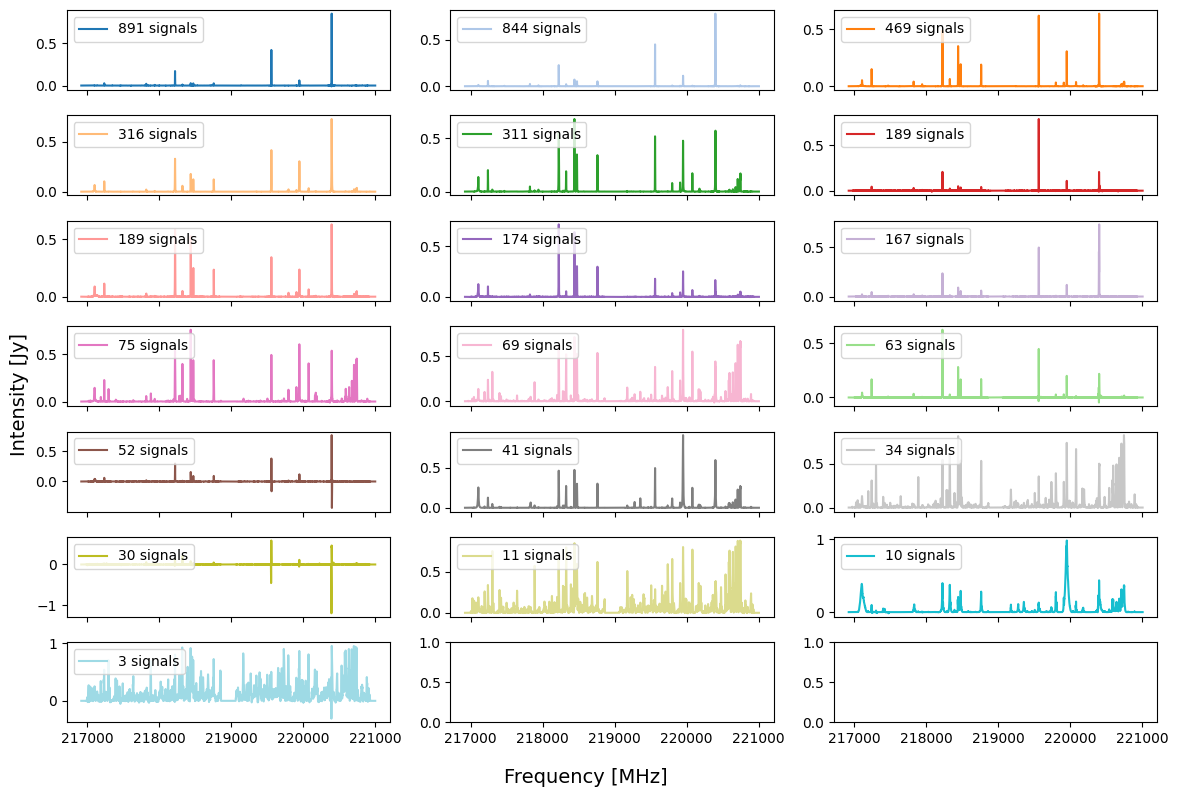

In [ ]:
fig, axes = plt.subplots(7, 3, sharex=True, figsize=(12, 8))
ax = axes.flatten()
colors = plt.get_cmap("tab20").colors
unique_labels, sizes = np.unique(model_23.labels_[mask], return_counts=True)
sorted_labels = unique_labels[np.argsort(sizes)[::-1]]
for i, label in enumerate(sorted_labels):
    ax[i].plot(freq, subtraction_signals[mask][model_23.labels_[mask]==label].mean(axis=0), color=colors[color_arg[i]], label=f'{sum(model_23.labels_[mask]==label)} signals')
    ax[i].legend(loc='upper left')
fig.supxlabel('Frequency [MHz]', fontsize=14)
fig.supylabel('Intensity [Jy]', fontsize=14)
fig.tight_layout()
fig.savefig('results/agglomerative/high_snr_centroids_euclidean_23clusters.pdf')
plt.show()

In [ ]:
sum(mask) / len(mask)

np.float64(0.9111522443313281)

In [ ]:
sum(mask)

np.int64(3938)

In [ ]:
len(mask)

4322

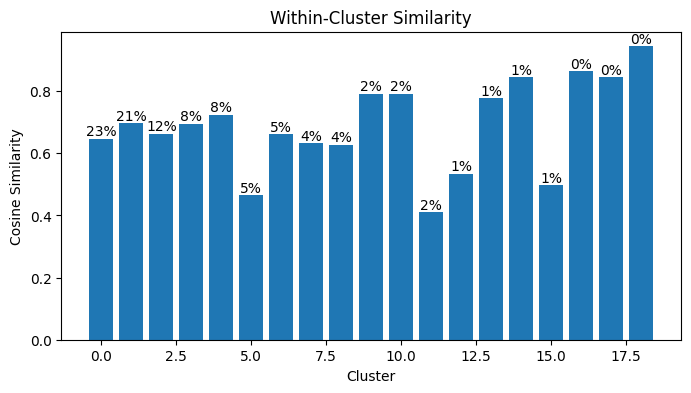

In [ ]:
wcs_23 = within_cluster_similarity(subtraction_signals[mask], model_23.labels_[mask], plot=True)

In [ ]:
sizes = np.sort(np.unique(model_23.labels_[mask], return_counts=True)[1])[::-1]

In [ ]:
np.average(wcs_23, weights=sizes)

np.float64(0.681131511314494)

<Figure size 5700x5700 with 0 Axes>

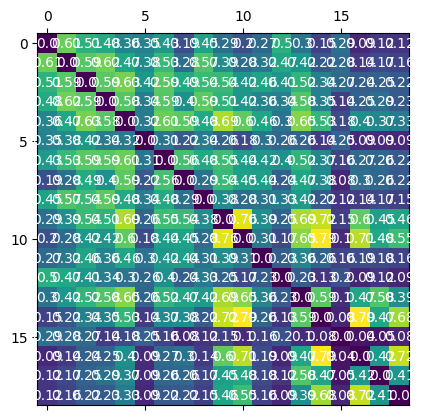

In [ ]:
bcs_23 = between_cluster_similarity(subtraction_signals[mask], model_23.labels_[mask], plot=True, text=True)

<Figure size 5700x5700 with 0 Axes>

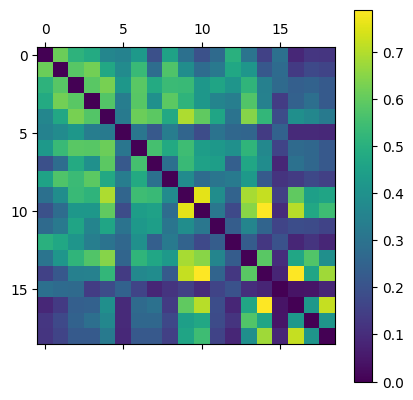

In [ ]:
bcs_23 = between_cluster_similarity(subtraction_signals[mask], model_23.labels_[mask], plot=True, text=False)

In [ ]:
labels23 = model_23.labels_

In [ ]:
labels23 = model_23.labels_.copy()

In [ ]:
labels_23[~mask] = -1

NameError: name 'labels_23' is not defined

In [ ]:
labels23[~mask] = -1

In [ ]:
np.save("Data/Processed/labels23.npy", labels23)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [ ]:
np.unique(model_10, return_counts=True)

(array([AgglomerativeClustering(n_clusters=10)], dtype=object), array([1]))

In [ ]:
np.unique(model_10.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1796,   15,  103,  427,  552,  363,    1, 1054,   10,    1]))

In [ ]:
mask = (model_10.labels_ != 9) * (model_10.labels_ != 6)

In [ ]:
mask[model_10.labels_ == 2] = snr[model_10.labels_ == 2] >= 1

In [ ]:
np.sort(np.unique(model_10.labels_[mask], return_counts=True)[1])[::-1]

array([1796, 1054,  552,  427,  363,  103,   15,   10])

In [ ]:
sum(snr[model_10.labels_ == 2] >= 1)

np.int64(103)

In [ ]:
mask = (model_10.labels_ != 9) * (model_10.labels_ != 6)

In [ ]:
np.unique(model_10.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1796,   15,  103,  427,  552,  363,    1, 1054,   10,    1]))

In [ ]:
mask[model_10.labels_ == 4] = snr[model_10.labels_ == 4] >= 1

In [ ]:
np.sort(np.unique(model_10.labels_[mask], return_counts=True)[1])[::-1]

array([1796, 1054,  427,  363,  114,  103,   15,   10])

In [ ]:
np.save("Data/Processed/labels10.npy", model_10.labels_[mask])